# === 1. Load cleaned data ===

In [2]:
import pandas as pd
import os
import numpy as np
! pip install scikit_posthocs
!pip install seaborn

In [3]:
target_dir = r"C:\Users\Diak\Documents\thesis\thesis-science-dissemination"
os.chdir(target_dir)

In [4]:
# 1.1 Load publication‐level metrics
df_data_2019 = pd.read_csv(
    "cleaned_data/data_2019_clean.csv",
    sep="|",
    parse_dates=["pubdate"],
    low_memory=False
)

In [7]:
df_data_2019.head()

,altmetric_id,doi,pubdate,code,blogs,book_reviews,f1000,facebook,googleplus,linkedin,...,top1_share_field,top1_cit_field,prop_female_jb_stand,ethnicity_blau_jb_stand,num_authors_jb_stand,stot_log_jb_stand,i_factor_jb_stand,unknown_ratio,cit_log,stot_cit_jb_stand
0,124094.0,10.1016/j.geomphys.2019.103478,2019-11-01 00:00:00+00:00,B1,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,-1.011166,-1.096911,-1.499879,-0.959494,NaN,0.0,0.000000,-1.503672
1,429163.0,10.1017/s0960129518000051,2019-03-01 00:00:00+00:00,unknown,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,-0.177532,-1.096911,-0.158620,-0.959494,-0.694633,0.0,1.386294,0.063194
2,493479.0,10.1017/nmj.2017.39,2019-09-01 00:00:00+00:00,B14,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,-1.011166,-1.096911,-0.605707,-0.098748,NaN,0.0,0.000000,-1.503672
3,894706.0,10.1017/nmj.2018.3,2019-09-01 00:00:00+00:00,B14,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2.323370,-1.096911,-1.499879,-0.959494,-0.768882,0.0,0.693147,-0.720239
4,940901.0,10.1007/s00220-019-03454-z,2019-06-01 00:00:00+00:00,B1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,-1.011166,0.531408,-0.605707,0.342764,-0.394890,0.0,1.386294,0.063194


In [8]:
# 1.2 Load author–institution ranking data
df_ranked = pd.read_csv(
    "cleaned_data/ranked_institution_2019.csv",
    sep="|",
    low_memory=False
)

In [9]:
df_ranked.head()

,parent_id,doi,author,author_position,institutions,ror,display_name_original,display_name_clean,country_code,type,homepage_url,final_rank,rank_flag
0,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5023720557,first,https://openalex.org/I44260953,https://ror.org/024z2rq82,Heinrich Heine University Düsseldorf,heinrich heine university dusseldorf,DE,funder,http://www.uni-duesseldorf.de/home/en/home.html,NaN,0
1,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5112426872,middle,https://openalex.org/I74788687,https://ror.org/0587ef340,Comenius University Bratislava,comenius university bratislava,SK,funder,https://uniba.sk/,801–1000,1
2,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5090280025,middle,https://openalex.org/I193662353,https://ror.org/04pp8hn57,Utrecht University,utrecht university,NL,funder,https://www.uu.nl,=74,1
3,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5090280025,middle,https://openalex.org/I2801952686,https://ror.org/018906e22,Erasmus MC,erasmus mc,NL,healthcare,https://www.erasmusmc.nl,NaN,0
4,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5016571082,last,https://openalex.org/I44260953,https://ror.org/024z2rq82,Heinrich Heine University Düsseldorf,heinrich heine university dusseldorf,DE,funder,http://www.uni-duesseldorf.de/home/en/home.html,NaN,0


In [10]:
# 1.3 Load author‐level aggregates
df_author = pd.read_csv(
    "cleaned_data/author_clean.csv",
    sep="|",
    low_memory=False
)

In [11]:
df_author.head()

,author,orcid,display_name,works_count,cited_by_count
0,https://openalex.org/A5027216268,NaN,Meghan E. Warren,2,2964
1,https://openalex.org/A5086173331,NaN,Justin Couture,1,446
2,https://openalex.org/A5014105264,NaN,Huei-Lin Chao,1,396
3,https://openalex.org/A5028894315,NaN,Wong Jiunn Yi,1,327
4,https://openalex.org/A5090917723,NaN,Nicolas Brooklier,1,250


# === 2. Merge publication and ranking data ===

In [13]:
df_merged_public_ranking = pd.merge(
    df_ranked,
    df_data_2019,
    how="left",
    on="doi",
    validate="many_to_many"   # many ranked rows per one publication is expected
)

In [14]:
# Append author-level aggregates
df_merged_all = pd.merge(
    df_merged_public_ranking,
    df_author[['author', 'works_count', 'cited_by_count']],
    how='left',
    on='author'
)

In [15]:
### Quick validation
print("Merged shape:", df_merged_all.shape)
print("Missing publication:", df_merged_all['pubdate'].isnull().sum(), "row")
print("Duplicated doi-author pairs:", df_merged_all.duplicated(subset=['doi','author']).sum())

Merged shape: (1864474, 170)
Missing publication: 0 row
Duplicated doi-author pairs: 485671


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df_merged_all.head()

,parent_id,doi,author,author_position,institutions,ror,display_name_original,display_name_clean,country_code,type,homepage_url,final_rank,rank_flag,altmetric_id,pubdate,code,blogs,book_reviews,f1000,facebook,googleplus,linkedin,misc,news,patent,peer_reviews,pinterest,policy,qa,reddit,syllabi,twitter,video,weibo,wikipedia,stot,stot_log,stot_log_stand,h_index,sjr_best_quartile,i_factor,i_factor_stand,female,male,unisex,no_data,african,britishorigin,caribbean,chinese,eastern_european,indian,middle_eastern,polynesian,southern_european_and_hispanic,unknown,western__northern_european,nonchinese_east_asian,female_african,female_britishorigin,female_caribbean,female_chinese,female_eastern_european,female_indian,female_middle_eastern,female_polynesian,female_southern_european_and_hispanic,female_unknown,female_western__northern_european,female_nonchinese_east_asian,male_african,male_britishorigin,male_caribbean,male_chinese,male_eastern_european,male_indian,male_middle_eastern,male_polynesian,male_southern_european_and_hispanic,male_unknown,male_western__northern_european,male_nonchinese_east_asian,unisex_african,unisex_britishorigin,unisex_chinese,unisex_eastern_european,unisex_indian,unisex_middle_eastern,unisex_southern_european_and_hispanic,unisex_unknown,unisex_western__northern_european,unisex_nonchinese_east_asian,no_data_african,no_data_britishorigin,no_data_caribbean,no_data_chinese,no_data_eastern_european,no_data_indian,no_data_middle_eastern,no_data_polynesian,no_data_southern_european_and_hispanic,no_data_unknown,no_data_western__northern_european,no_data_nonchinese_east_asian,num_authors,pub_year,journal,prop_female,ethnicity_blau,subject_category,broad_area_category,all_citaitons,num_citations_1,num_citations_2,num_citations_3,num_citations_4,num_citations_5,relevant,broad_research_area,code2,ratio_british_origin,ratio_indian,ratio_western_northern,ratio_hispanic,ratio_chinese,ratio_middle_east,ratio_non_chinese_east_asian,ratio_eastern_european,ratio_african,ratio_unknown,ratio_caribbean,ratio_polynesian,ratio_other,ethnicity_majority,ethnicity_max_value,ratio_british_origin_stand,ratio_indian_stand,ratio_western_northern_stand,ratio_hispanic_stand,ratio_chinese_stand,ratio_middle_east_stand,ratio_non_chinese_east_asian_stand,ratio_eastern_european_stand,ratio_african_stand,ratio_unknown_stand,ratio_caribbean_stand,ratio_polynesian_stand,ratio_other_stand,top15_share_fieldna_droppped_all,top5_share_fieldna_droppped_all,top1_share_fieldna_droppped_all,top15_cit_fieldna_droppped_all,top5_cit_fieldna_droppped_all,top1_cit_fieldna_droppped_all,top15_share_field,top15_cit_field,top5_share_field,top5_cit_field,top1_share_field,top1_cit_field,prop_female_jb_stand,ethnicity_blau_jb_stand,num_authors_jb_stand,stot_log_jb_stand,i_factor_jb_stand,unknown_ratio,cit_log,stot_cit_jb_stand,works_count,cited_by_count
0,https://openalex.org/W2930129155,10.1016/j.freeradbiomed.2019.03.030,https://openalex.org/A5023720557,first,https://openalex.org/I44260953,https://ror.org/024z2rq82,Heinrich Heine University Düsseldorf,heinrich heine university dusseldorf,DE,funder,http://www.uni-duesseldorf.de/home/en/home.html,NaN,0,58329953.0,2019-08-01 00:00:00+00:00,B6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,13.0,2.639057,0.881034,NaN,NaN,NaN,NaN,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2019.0,Free Radical Biology & Medicine,0.25,0.625,27.0,B6,15.0,9.0,15.0,15.0,15.0,15.0,1.0,Biological sciences,B6,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,ratio_western_northern,0.5,-0.008816,-0.312783,1.028935,-0.518401,-0.490559,-0.359371,-0.289189,1.27417,-0.14277,-0.123204,-0.016562,-0.00208,-0.186865,0,0,0,1,0,0,0,1,0,0,0,0,-0.177532,1.192912,-0.15862,0.868456,NaN,0.0,2.302585,1.098835,27.0,1638.0
1,https:

# === 3. Analysis on Overall Dataset (df_merged_all) ===

In this section I use all available data to examine the impact of different factors (gender, ethnicity, author position, etc.) on scientific visibility. Initial analyses are run on the whole sample to get a comprehensive picture before filtering by ranking.

In [204]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# === helper: automatikus mentés számozva ===
def save_current_figure(folder="results/plots", prefix="plot", ext="png"):
    os.makedirs(folder, exist_ok=True)
    existing = sorted(Path(folder).glob(f"{prefix}_*.{ext}"))
    next_id = len(existing) + 1
    filename = f"{prefix}_{next_id:03d}.{ext}"
    full_path = Path(folder) / filename
    plt.gcf().savefig(full_path, dpi=300, bbox_inches="tight")

# Set general seaborn style
sns.set_style("whitegrid")

# Apply consistent font and layout settings
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.edgecolor": "gray",
    "axes.linewidth": 1.0,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "legend.fontsize": 10,
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica"]
})

# === 1. Histogram Plot ===
def plot_hist(data, column, bins=40, title=None, xlabel=None, color=None):
    hist_color = color or sns.color_palette("Dark2")[0]
    plt.figure()
    sns.histplot(
        data[column].dropna(),
        bins=bins,
        kde=False,
        color=hist_color
    )
    plt.title(title or f"Distribution of {column}")
    plt.xlabel(xlabel or column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    save_current_figure()
    plt.show()

# === 2. Count Plot ===
def plot_countplot(data, column, title=None, xlabel=None):
    plt.figure()
    sns.countplot(data=data, x=column, hue=column, palette='Dark2', legend=False)
    plt.title(title or f"Distribution of {column}")
    plt.xlabel(xlabel or column)
    plt.ylabel("Count")
    plt.tight_layout()
    ax = plt.gca()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    save_current_figure()
    plt.show()

# === 3. Box Plot ===
def plot_boxplot(data, column_x, column_y, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=column_x, y=column_y, hue=column_x, palette='Dark2')
    plt.title(title or f"{column_y} by {column_x}")
    plt.xlabel(xlabel or column_x)
    plt.ylabel(ylabel or column_y)
    plt.tight_layout()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    save_current_figure()
    plt.show()

# === 4. Bar Plot ===
def plot_barplot(data,
                 x_col,
                 y_col,
                 hue_col=None,
                 title=None,
                 xlabel=None,
                 ylabel=None,
                 palette="Dark2",
                 rot=45,
                 distinct_colors=True,
                 format_yaxis=True):

    plt.figure(figsize=(10, 8))

    if hue_col:
        sns.barplot(
            data=data, x=x_col, y=y_col, hue=hue_col,
            palette=palette, legend=True,
            errorbar=None
        )
    else:
        if distinct_colors:
            sns.barplot(
                data=data, x=x_col, y=y_col, hue=x_col,
                palette=palette, legend=False,
                errorbar=None
            )
        else:
            single_color = sns.color_palette(palette)[0]
            sns.barplot(
                data=data, x=x_col, y=y_col, color=single_color,
                errorbar=None
            )

    plt.xticks(rotation=rot, ha="right")
    plt.title(title or f"{y_col} by {x_col}")
    plt.xlabel(xlabel or x_col)
    plt.ylabel(ylabel or y_col)

    if format_yaxis:
        ax = plt.gca()
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))

    plt.tight_layout()
    save_current_figure()
    plt.show()

# === 5. Combined bar + line plot ===
def combined_bar_line_plot(
    data,
    x_col,
    bar_y_col,
    line_y_col,
    title="Combined Bar and Line Plot",
    xlabel=None,
    bar_ylabel="Bar Value",
    line_ylabel="Line Value",
    palette="Dark2",
    line_color="orange"
):
    fig, ax1 = plt.subplots(figsize=(8, 5))
    sns.barplot(data=data, x=x_col, y=bar_y_col, hue=x_col, palette=palette, ax=ax1)
    ax1.set_ylabel(bar_ylabel, fontsize=12)
    ax1.set_xlabel(xlabel or x_col, fontsize=12)
    ax1.tick_params(axis='y')
    ax1.grid(axis='y', linestyle='--', linewidth=0.5, color='lightgray')
    ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    ax2 = ax1.twinx()
    ax2.plot(data[x_col], data[line_y_col], color=line_color, marker="o", linewidth=2)
    ax2.set_ylabel(line_ylabel, fontsize=12)
    ax2.tick_params(axis='y')
    ax2.grid(False)
    ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
    plt.title(title, fontsize=14)
    fig.tight_layout()
    save_current_figure()
    plt.show()

# === 6. Scatter + Regression line (single- vagy multi-hue) ===
def plot_regplot(data,
                 x_col,
                 y_col,
                 hue_col=None,
                 title=None,
                 xlabel=None,
                 ylabel=None,
                 palette="Dark2",
                 scatter_alpha=0.1,
                 scatter_size=10,
                 line_color=None):
    sns.set_style("whitegrid")
    if hue_col:
        sns.lmplot(
            data=data,
            x=x_col,
            y=y_col,
            hue=hue_col,
            palette=palette,
            scatter_kws={"alpha": scatter_alpha, "s": scatter_size},
            height=6,
            aspect=1.5,
            markers='o',
            ci=None
        )
        plt.title(title or f"{y_col} vs. {x_col} by {hue_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        save_current_figure()
        plt.show()
    else:
        pal = sns.color_palette(palette)
        scat_col = pal[0]
        reg_col  = line_color or pal[1]
        plt.figure(figsize=(8, 5))
        sns.regplot(
            data=data,
            x=x_col,
            y=y_col,
            scatter_kws={"s": scatter_size, "alpha": scatter_alpha, "color": scat_col},
            line_kws={"color": reg_col},
            ci=None
        )
        plt.title(title or f"{y_col} vs. {x_col}")
        plt.xlabel(xlabel or x_col)
        plt.ylabel(ylabel or y_col)
        plt.tight_layout()
        ax = plt.gca()
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:,.0f}"))
        save_current_figure()
        plt.show()

## 3.1. Key Distribution Metrics and Correlations

In [26]:
df_merged_all.columns.to_list()

['parent_id',
 'doi',
 'author',
 'author_position',
 'institutions',
 'ror',
 'display_name_original',
 'display_name_clean',
 'country_code',
 'type',
 'homepage_url',
 'final_rank',
 'rank_flag',
 'altmetric_id',
 'pubdate',
 'code',
 'blogs',
 'book_reviews',
 'f1000',
 'facebook',
 'googleplus',
 'linkedin',
 'misc',
 'news',
 'patent',
 'peer_reviews',
 'pinterest',
 'policy',
 'qa',
 'reddit',
 'syllabi',
 'twitter',
 'video',
 'weibo',
 'wikipedia',
 'stot',
 'stot_log',
 'stot_log_stand',
 'h_index',
 'sjr_best_quartile',
 'i_factor',
 'i_factor_stand',
 'female',
 'male',
 'unisex',
 'no_data',
 'african',
 'britishorigin',
 'caribbean',
 'chinese',
 'eastern_european',
 'indian',
 'middle_eastern',
 'polynesian',
 'southern_european_and_hispanic',
 'unknown',
 'western__northern_european',
 'nonchinese_east_asian',
 'female_african',
 'female_britishorigin',
 'female_caribbean',
 'female_chinese',
 'female_eastern_european',
 'female_indian',
 'female_middle_eastern',
 'fema

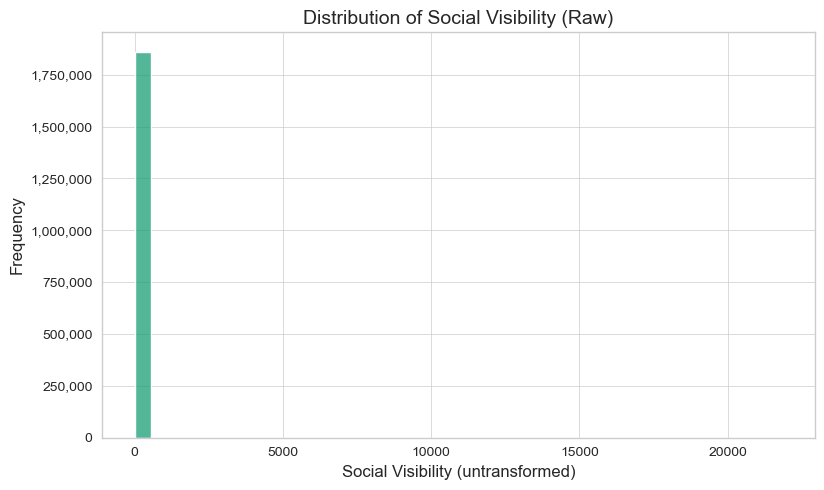

In [330]:
# Plotting the distribution of social visibility scores (raw Altmetric values)
plot_hist(
    df_merged_all,
    column="stot",
    title="Distribution of Social Visibility (Raw)",
    xlabel="Social Visibility (untransformed)"
)

Since the distribution of stot is highly skewed or full of outliers, a logarithmic transformation is justified to normalize the data.

In [332]:
df_merged_all['stot_log1p'] = (df_merged_all['stot'] + 1).apply(np.log)

In [391]:
# === Basic descriptive stats for stot ===
print("=== Social Visibility descriptive statistics ===")
print(df_merged_all['stot'].describe())

=== Social Visibility descriptive statistics ===
count    1.864474e+06
mean     1.399060e+01
std      7.875129e+01
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      2.184500e+04
Name: stot, dtype: float64


In [393]:
# === Basic descriptive stats for stot_log1p ===
print("=== Log-Transformed Social Visibility descriptive statistics ===")
print(df_merged_all['stot_log1p'].describe())

=== Log-Transformed Social Visibility descriptive statistics ===
count    1.864474e+06
mean     1.668076e+00
std      1.204170e+00
min      0.000000e+00
25%      6.931472e-01
50%      1.386294e+00
75%      2.397895e+00
max      9.991773e+00
Name: stot_log1p, dtype: float64


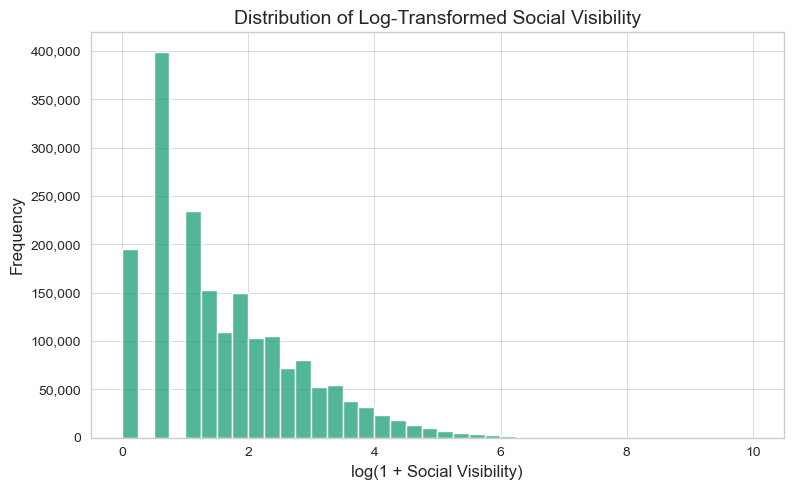

In [339]:
# Plotting the distribution of social visibility scores after log(1 + x) transformation to reduce skewness
plot_hist(
    df_merged_all,
    column="stot_log1p",
    title="Distribution of Log-Transformed Social Visibility",
    xlabel="log(1 + Social Visibility)"
)

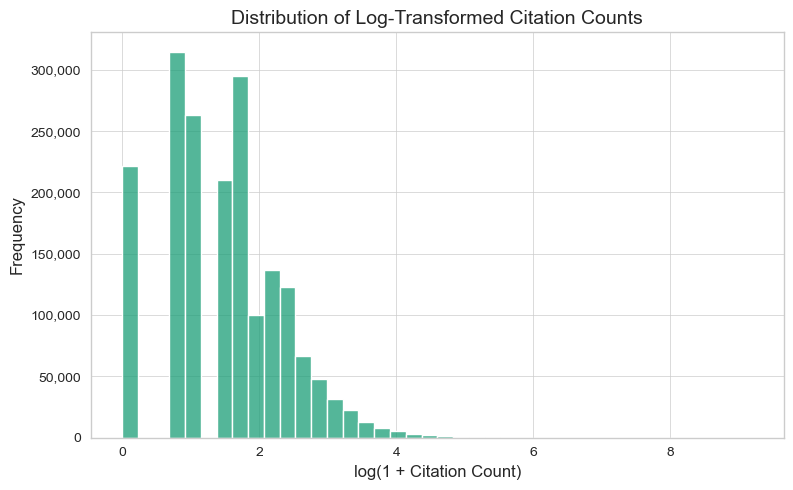

In [341]:
# Plotting the distribution of citation counts after log(1 + x) transformation
plot_hist(
    df_merged_all,
    column="cit_log",
    title="Distribution of Log-Transformed Citation Counts",
    xlabel="log(1 + Citation Count)"
)

In [342]:
# === Basic descriptive stats for cited_by_count, author level ===
print(df_merged_all['cited_by_count'].describe())

count    1.864470e+06
mean     6.746034e+03
std      1.751589e+04
min      0.000000e+00
25%      4.340000e+02
50%      1.743000e+03
75%      5.982000e+03
max      7.261400e+05
Name: cited_by_count, dtype: float64


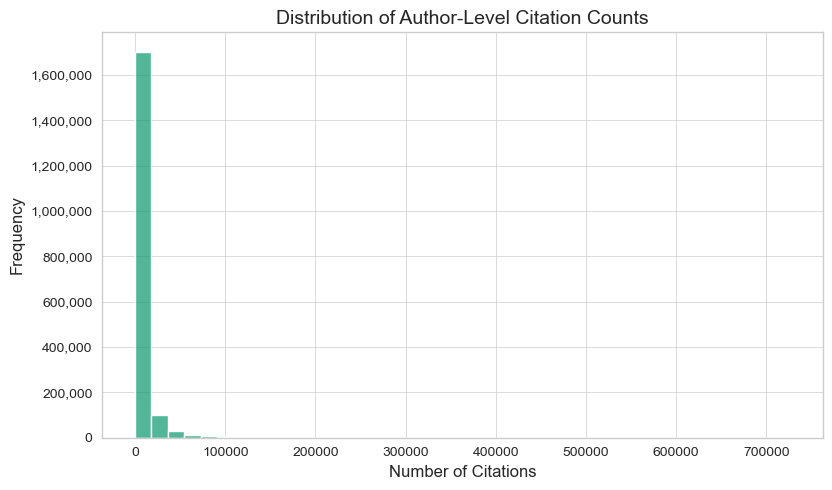

In [345]:
# Plotting the distribution of author-level citation counts (raw values, not transformed)
plot_hist(
    data=df_merged_all,
    column='cited_by_count',
    title='Distribution of Author-Level Citation Counts',
    xlabel='Number of Citations'
)

In [346]:
df_merged_all['cited_by_log1p'] = np.log1p(df_merged_all['cited_by_count'])

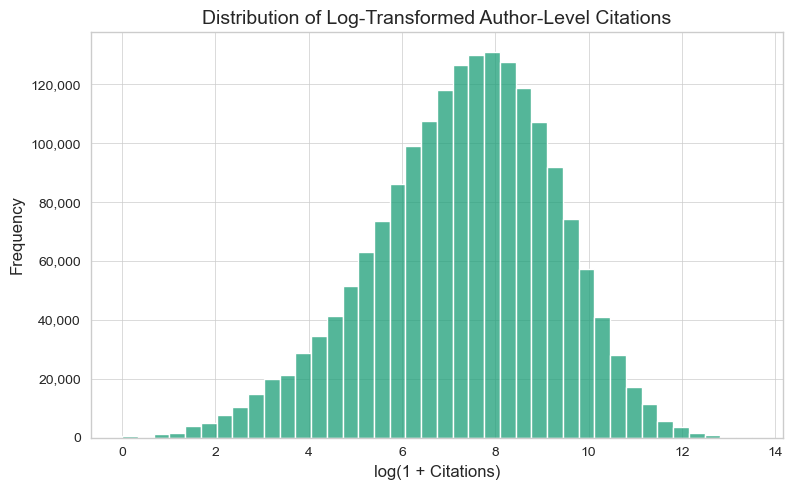

In [349]:
# Plotting the distribution of author-level citation counts after log(1 + x) transformation
plot_hist(
    data=df_merged_all,
    column='cited_by_log1p',
    title='Distribution of Log-Transformed Author-Level Citations',
    xlabel='log(1 + Citations)'
)

### Scatter plot to examine the relationship between social visibility and scientific impact

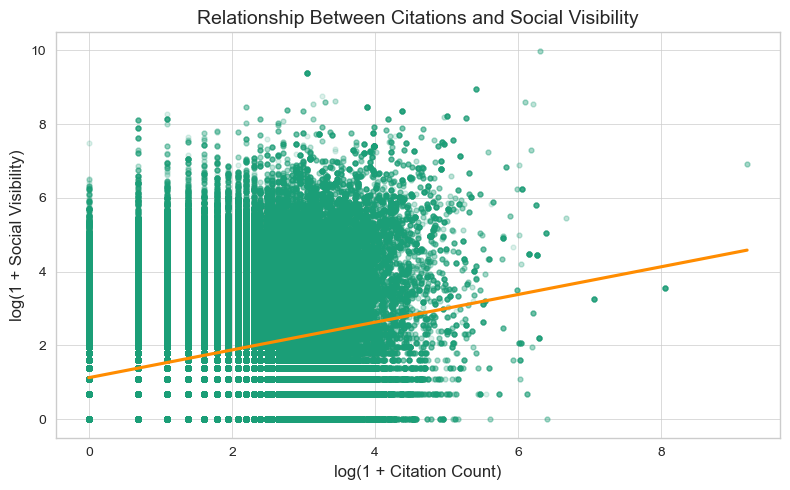

In [352]:
# Visualizing the relationship between log-transformed citation counts and social visibility
plot_regplot(
    data=df_merged_all,
    x_col="cit_log",
    y_col="stot_log1p",
    title="Relationship Between Citations and Social Visibility",
    xlabel="log(1 + Citation Count)",
    ylabel="log(1 + Social Visibility)",
    scatter_alpha=0.15,
    scatter_size=12,
    line_color="darkorange"
)

### Calculate correlation to assess the strength and direction of the relationship between citations and visibility

In [354]:
# Pearson (linear correlation)
pearson = df_merged_all[['cit_log', 'stot_log1p']].corr(method='pearson')

# Spearman (rank-correlation)
spearman = df_merged_all[['cit_log', 'stot_log1p']].corr(method='spearman')

print("Pearson correlation:\n", pearson)
print("\nSpearman correlation:\n", spearman)

Pearson correlation:
             cit_log  stot_log1p
cit_log     1.00000     0.27501
stot_log1p  0.27501     1.00000

Spearman correlation:
              cit_log  stot_log1p
cit_log     1.000000    0.231041
stot_log1p  0.231041    1.000000


In [355]:
display(pearson)
display(spearman)

,cit_log,stot_log1p
cit_log,1.00000,0.27501
stot_log1p,0.27501,1.00000


,cit_log,stot_log1p
cit_log,1.000000,0.231041
stot_log1p,0.231041,1.000000


## 3.2. Gender and Ethnicity Analysis

### Gender

In [360]:
print(df_merged_all['parent_id'].nunique())

332971


In [362]:
# Group by parent_id and sum female/male/unisex counts
gender_counts = df_merged_all.groupby('parent_id')[['female', 'male', 'unisex']].sum().copy()

# Find max value between female and male only
max_vals = gender_counts[['female', 'male']].max(axis=1)
is_female = gender_counts['female'] == max_vals
is_male = gender_counts['male'] == max_vals

# Where only one of them is max -> assign that majority
gender_majority = pd.Series('gender_undetermined_majority', index=gender_counts.index)
gender_majority[is_female & ~is_male] = 'gender_female_majority'
gender_majority[is_male & ~is_female] = 'gender_male_majority'

# Merge back to original df
gender_counts['gender_majority'] = gender_majority
df_merged_all = df_merged_all.merge(
    gender_counts[['gender_majority']].reset_index(),
    on='parent_id',
    how='left'
)

In [364]:
print(df_merged_all[['parent_id', 'gender_majority']].head())

                          parent_id       gender_majority
0  https://openalex.org/W2930129155  gender_male_majority
1  https://openalex.org/W2930129155  gender_male_majority
2  https://openalex.org/W2930129155  gender_male_majority
3  https://openalex.org/W2930129155  gender_male_majority
4  https://openalex.org/W2930129155  gender_male_majority


In [395]:
# Absolute counts of gender majority categories across articles
gender_counts = df_merged_all['gender_majority'].value_counts(dropna=False)

# Relative proportions of each category
gender_props = df_merged_all['gender_majority'].value_counts(normalize=True, dropna=False)

# Combine both into a summary DataFrame
gender_summary = pd.DataFrame({
    'count': gender_counts,
    'proportion': gender_props
}).sort_values(by='count', ascending=False)

print("=== Gender Majority Summary: Counts and Proportions ===")
print(gender_summary)

=== Gender Majority Summary: Counts and Proportions ===
                                count  proportion
gender_majority                                  
gender_male_majority          1086824    0.582912
gender_female_majority         534206    0.286518
gender_undetermined_majority   243444    0.130570


In [368]:
df_gender_filtered = df_merged_all[df_merged_all['gender_majority'].isin(['gender_male_majority', 'gender_female_majority'])]

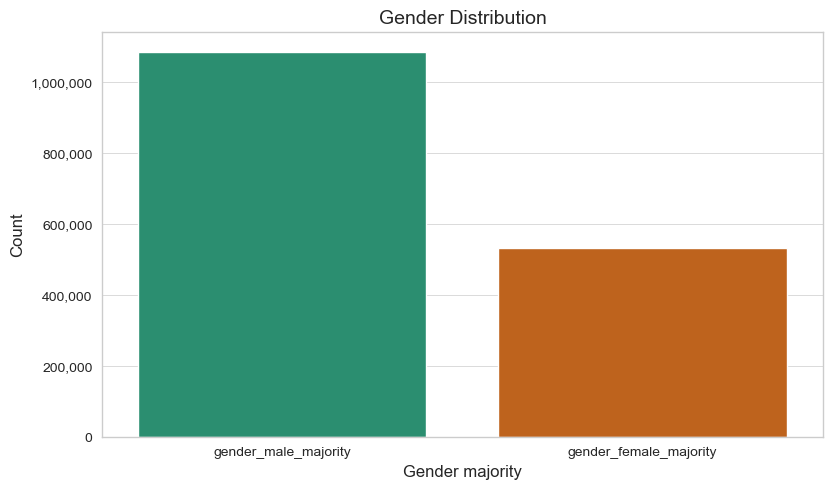

In [431]:
# Plotting the distribution of gender-majority classification (filtered to only male/female majority)
plot_countplot(
    df_gender_filtered,
    'gender_majority',
    title="Gender Distribution",
    xlabel="Gender majority"
)

In [432]:
# Get descriptive statistics (e.g., mean, std, min, max) for stot_log1p grouped by gender
gender_stats = df_gender_filtered.groupby('gender_majority')['stot_log1p'].describe()

# Print the descriptive statistics
print("=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority ===")
display(gender_stats)

=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority ===


,count,mean,std,min,25%,50%,75%,max
gender_majority,,,,,,,,
gender_female_majority,534206.0,1.683479,1.161205,0.0,0.693147,1.386294,2.397895,8.767641
gender_male_majority,1086824.0,1.663392,1.227389,0.0,0.693147,1.386294,2.397895,9.991773


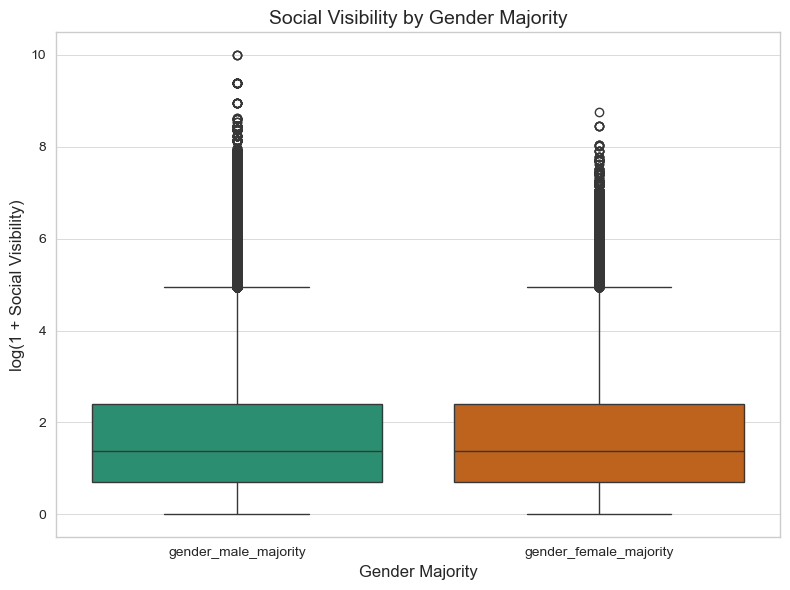

In [435]:
# Comparing log-transformed social visibility across gender-majority groups
plot_boxplot(
    df_gender_filtered,
    column_x='gender_majority',
    column_y='stot_log1p',
    title="Social Visibility by Gender Majority",
    xlabel="Gender Majority",
    ylabel="log(1 + Social Visibility)"
)

In [437]:
# === ANOVA test: stot_log1p by gender majority ===

import scipy.stats as stats

groups = [
    df_gender_filtered[df_gender_filtered['gender_majority'] == cat]['stot_log1p'].dropna()
    for cat in ['gender_male_majority', 'gender_female_majority']
]

f_stat, p_val = stats.f_oneway(*groups)

print("=== ANOVA: Social Visibility by Gender Majority ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value:    {p_val:.4g}")

=== ANOVA: Social Visibility by Gender Majority ===
F-statistic: 99.3580
P-value:    2.111e-23


In [438]:
# === Kruskal–Wallis Test: stot_log1p by gender majority ===

from scipy.stats import kruskal

female_group = df_gender_filtered[df_gender_filtered['gender_majority'] == 'gender_female_majority']['stot_log1p'].dropna()
male_group = df_gender_filtered[df_gender_filtered['gender_majority'] == 'gender_male_majority']['stot_log1p'].dropna()

kw_stat, kw_p = kruskal(female_group, male_group)

print("=== Kruskal–Wallis Test: Social Visibility by Gender Majority ===")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value:     {kw_p:.5f}")

=== Kruskal–Wallis Test: Social Visibility by Gender Majority ===
H-statistic: 418.4172
P-value:     0.00000


In [439]:
# === Dunn's post-hoc test with Bonferroni correction by gender majority ===

import scikit_posthocs as sp

dunn_results = sp.posthoc_dunn(
    df_gender_filtered,
    val_col='stot_log1p',
    group_col='gender_majority',
    p_adjust='bonferroni'
)

print("=== Dunn's Test Social Visbility by Gender Majority ===")
print(dunn_results)

=== Dunn's Test Social Visbility by Gender Majority ===
                        gender_female_majority  gender_male_majority
gender_female_majority            1.000000e+00          5.394538e-93
gender_male_majority              5.394538e-93          1.000000e+00


In [440]:
# === Linear regression model: stot_log1p ~ gender_label ===

import statsmodels.formula.api as smf

model = smf.ols('stot_log1p ~ C(gender_majority)', data=df_gender_filtered).fit()

print("=== Linear Regression: log(1 + Social Visibility) ~ Gender Majority ===")
print(model.summary())

=== Linear Regression: log(1 + Social Visibility) ~ Gender Majority ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     99.36
Date:                Wed, 14 May 2025   Prob (F-statistic):           2.11e-23
Time:                        18:34:11   Log-Likelihood:            -2.6037e+06
No. Observations:             1621030   AIC:                         5.207e+06
Df Residuals:                 1621028   BIC:                         5.208e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

### Ethnicity

In [442]:
ethnicity_counts = df_merged_all['ethnicity_majority'].value_counts()

print("=== Ethnicity categories and their frequencies ===")
print(ethnicity_counts)

=== Ethnicity categories and their frequencies ===
ethnicity_majority
ratio_british_origin            785151
ratio_western_northern          430018
ratio_hispanic                  243559
ratio_chinese                   151632
ratio_middle_east                95995
ratio_indian                     54595
ratio_eastern_European           50346
ratio_non_chinese_east_Asian     47413
ratio_other                       5765
Name: count, dtype: int64


In [444]:
ethnicity_props = df_merged_all['ethnicity_majority'].value_counts(normalize=True) * 100

ethnicity_percent = ethnicity_props.round(2).reset_index()
ethnicity_percent.columns = ['ethnicity_majority', 'percentage']

print("=== Ethnicity Majority Group Percentages ===")
print(ethnicity_percent)

=== Ethnicity Majority Group Percentages ===
             ethnicity_majority  percentage
0          ratio_british_origin       42.11
1        ratio_western_northern       23.06
2                ratio_hispanic       13.06
3                 ratio_chinese        8.13
4             ratio_middle_east        5.15
5                  ratio_indian        2.93
6        ratio_eastern_European        2.70
7  ratio_non_chinese_east_Asian        2.54
8                   ratio_other        0.31


In [861]:
# Get descriptive statistics (e.g., mean, std, min, max) for stot_log1p grouped by gender
ethnicity_visibility = df_merged_all.groupby('ethnicity_majority')['stot_log1p'].agg(['count', 'mean', 'std']).round(3)

# Print the descriptive statistics
print("=== Descriptive Statistics: log(1 + Social Visibility) by Ethnicity Majority Group ===")
display(ethnicity_visibility.sort_values(by='mean', ascending=False))

=== Descriptive Statistics: log(1 + Social Visibility) by Ethnicity Majority Group ===


,count,mean,std
ethnicity_majority,,,
ratio_british_origin,785151,1.937,1.291
ratio_western_northern,430018,1.681,1.183
ratio_hispanic,243559,1.519,1.073
ratio_other,5765,1.373,0.955
ratio_indian,54595,1.365,1.091
ratio_non_chinese_east_Asian,47413,1.347,0.926
ratio_middle_east,95995,1.223,0.979
ratio_eastern_European,50346,1.208,0.933
ratio_chinese,151632,1.134,0.887


In [447]:
# === ANOVA test: stot_log1p by ethnicity majority ===
eth_groups = [
    df_merged_all[df_merged_all['ethnicity_majority'] == cat]['stot_log1p'].dropna() 
    for cat in df_merged_all['ethnicity_majority'].unique()
]

f_stat_eth, p_val_eth = stats.f_oneway(*eth_groups)

print("=== ANOVA: Social Visibility by Ethnicity ===")
print(f"F-statistic: {f_stat_eth:.4f}")
print(f"P-value:    {p_val_eth:.4g}")

=== ANOVA: Social Visibility by Ethnicity ===
F-statistic: 13268.5823
P-value:    0


In [448]:
# === Kruskal–Wallis Test: stot_log1p by ethnicity majority ===
ethnicity_groups = [
    df_merged_all[df_merged_all['ethnicity_majority'] == eth]['stot_log1p'].dropna()
    for eth in df_merged_all['ethnicity_majority'].unique()
]

# Kruskal–Wallis
kw_stat, kw_pval = kruskal(*ethnicity_groups)

print("=== Kruskal–Wallis Test: Social Visibility by Ethnicity ===")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value:     {kw_pval:.5f}")

=== Kruskal–Wallis Test: Social Visibility by Ethnicity ===
H-statistic: 106033.9070
P-value:     0.00000


In [867]:
# === Dunn's post-hoc test with Bonferroni correction by ethnicity majority ===
dunn_ethnicity = sp.posthoc_dunn(
    df_merged_all,
    val_col='stot_log1p',
    group_col='ethnicity_majority',
    p_adjust='bonferroni'
)

# Display the p-value matrix
print("=== Dunn's Test: Social Visibility by Ethnicit ===")
print(dunn_ethnicity.round(5))

=== Dunn's Test: Social Visibility by Ethnicit ===
                              ratio_british_origin  ratio_chinese  \
ratio_british_origin                           1.0            0.0   
ratio_chinese                                  0.0            1.0   
ratio_eastern_European                         0.0            0.0   
ratio_hispanic                                 0.0            0.0   
ratio_indian                                   0.0            0.0   
ratio_middle_east                              0.0            0.0   
ratio_non_chinese_east_Asian                   0.0            0.0   
ratio_other                                    0.0            0.0   
ratio_western_northern                         0.0            0.0   

                              ratio_eastern_European  ratio_hispanic  \
ratio_british_origin                             0.0             0.0   
ratio_chinese                                    0.0             0.0   
ratio_eastern_European                    

In [457]:
# === Linear regression model: stot_log1p ~ ethnicity_majority ===
print("=== Linear Regression: log(1 + Social Visibility) ~ Ethnicity Majority ===")

# Run OLS regression with categorical predictor
ethnicity_model = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=df_merged_all).fit()

# Display summary
print(ethnicity_model.summary())

=== Linear Regression: log(1 + Social Visibility) ~ Ethnicity Majority ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                 1.327e+04
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        18:35:22   Log-Likelihood:            -2.9404e+06
No. Observations:             1864474   AIC:                         5.881e+06
Df Residuals:                 1864465   BIC:                         5.881e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------

## 3.3. Platform usage across publications

In [460]:
# Define all Altmetric platform columns
altmetric_cols = [
    'blogs', 'book_reviews', 'f1000', 'facebook', 'googleplus', 'linkedin',
    'misc', 'news', 'patent', 'peer_reviews', 'pinterest', 'policy',
    'qa', 'reddit', 'syllabi', 'twitter', 'video', 'weibo', 'wikipedia'
]

# Compute overall descriptive statistics for each platform
platform_stats = df_merged_all[altmetric_cols].agg(['count', 'mean', 'std', 'median', 'max']).T
platform_stats['pct_mentioned'] = (df_merged_all[altmetric_cols] > 0).sum() / len(df_merged_all) * 100
platform_stats = platform_stats.rename(columns={'median': '50%'}).round({'mean':2, 'std':2, '50%':0, 'max':0, 'pct_mentioned':2})

print("Overall statistics for all Altmetric platforms:")
display(platform_stats)

Overall statistics for all Altmetric platforms:


,count,mean,std,50%,max,pct_mentioned
blogs,1864474.0,0.11,0.59,0.0,79.0,6.77
book_reviews,1864474.0,0.00,0.00,0.0,2.0,0.00
f1000,1864474.0,0.01,0.10,0.0,9.0,0.68
facebook,1864474.0,0.26,0.95,0.0,127.0,16.01
googleplus,1864474.0,0.01,0.32,0.0,84.0,0.96
linkedin,1864474.0,0.00,0.00,0.0,0.0,0.00
misc,1864474.0,0.01,0.75,0.0,278.0,0.17
news,1864474.0,0.65,5.84,0.0,515.0,8.79
patent,1864474.0,0.00,0.04,0.0,19.0,0.01
peer_reviews,1864474.0,0.00,0.08,0.0,10.0,0.11


In [461]:
# Select key platforms with more than 1% of papers mentioned
key_platforms = platform_stats.index[platform_stats['pct_mentioned'] > 1].tolist()
print("\nKey platforms (>1% mentioned):", key_platforms)


Key platforms (>1% mentioned): ['blogs', 'facebook', 'news', 'reddit', 'twitter']


In [462]:
# Create binary indicators for all key platforms on the full dataset
for platform in key_platforms:
    df_merged_all[f'{platform}_binary'] = (df_merged_all[platform] > 0).astype(int)

# Show overall usage again for all key platforms (on the full df_merged_all)
for platform in key_platforms:
    counts = df_merged_all[f'{platform}_binary'].value_counts().sort_index()
    pct    = df_merged_all[f'{platform}_binary'].value_counts(normalize=True).sort_index() * 100
    print(f"\n{platform.capitalize()} overall usage:")
    print(f"  Not mentioned (0): {counts[0]} ({pct[0]:.2f}%)")
    print(f"  Mentioned     (1): {counts[1]} ({pct[1]:.2f}%)")


Blogs overall usage:
  Not mentioned (0): 1738227 (93.23%)
  Mentioned     (1): 126247 (6.77%)

Facebook overall usage:
  Not mentioned (0): 1566016 (83.99%)
  Mentioned     (1): 298458 (16.01%)

News overall usage:
  Not mentioned (0): 1700656 (91.21%)
  Mentioned     (1): 163818 (8.79%)

Reddit overall usage:
  Not mentioned (0): 1839692 (98.67%)
  Mentioned     (1): 24782 (1.33%)

Twitter overall usage:
  Not mentioned (0): 260956 (14.00%)
  Mentioned     (1): 1603518 (86.00%)


In [467]:
# Create a list to store actual mention counts
usage_data = []

# Loop through key platforms and get counts
for platform in key_platforms:
    binary_col = f"{platform}_binary"
    mentioned = df_merged_all[binary_col].sum()
    usage_data.append((platform.capitalize(), mentioned))

# Create DataFrame with counts
usage_df = (
    pd.DataFrame(usage_data, columns=['Platform', 'Mentioned (count)'])
    .sort_values('Mentioned (count)', ascending=False)
    .reset_index(drop=True)
)

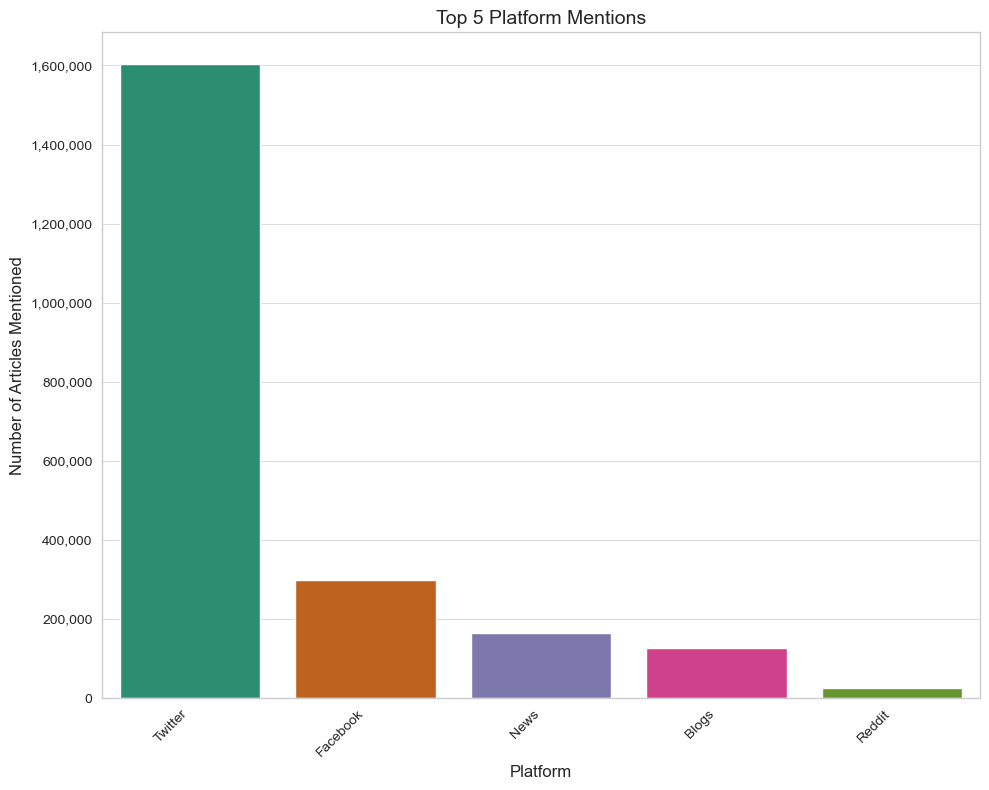

In [469]:
# Plotting the number of article mentions across the top 5 online platforms (aggregated across all institutions)
plot_barplot(
    data=usage_df,
    x_col='Platform',
    y_col='Mentioned (count)',
    title='Top 5 Platform Mentions',
    xlabel='Platform',
    ylabel='Number of Articles Mentioned'
)

In [471]:
usage_data = []

for platform in key_platforms:
    pct = df_merged_all[f"{platform}_binary"].mean() * 100
    usage_data.append((platform.capitalize(), pct))

usage_df = (
    pd.DataFrame(usage_data, columns=['Platform', 'Mentioned (%)'])
    .sort_values('Mentioned (%)', ascending=False)
    .reset_index(drop=True)  # optional: reset index nicely
)

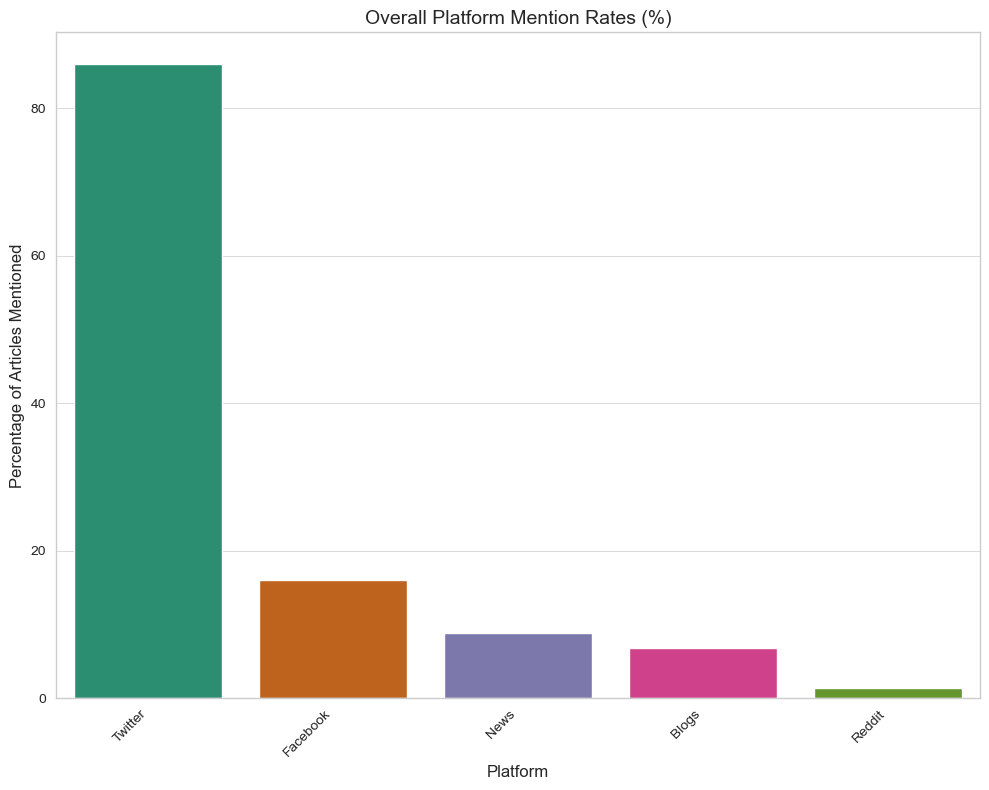

In [473]:
# Collect usage data for each platform
plot_barplot(
    data=usage_df,
    x_col='Platform',
    y_col='Mentioned (%)',
    title='Overall Platform Mention Rates (%)',
    xlabel='Platform',
    ylabel='Percentage of Articles Mentioned'
)

In [475]:
# Crosstab platform overlap on the full dataset
pairs = [('twitter','facebook'), ('twitter','news'), ('twitter','blogs'),
         ('facebook','news'), ('facebook','blogs'), ('news','blogs')]

for p1, p2 in pairs:
    ct = pd.crosstab(
        df_merged_all[f'{p1}_binary'],
        df_merged_all[f'{p2}_binary'],
        normalize='index'
    ) * 100
    print(f"\nOverlap: {p1.capitalize()} vs {p2.capitalize()} (%)")
    print(ct.round(2))


Overlap: Twitter vs Facebook (%)
facebook_binary      0      1
twitter_binary               
0                91.36   8.64
1                82.79  17.21

Overlap: Twitter vs News (%)
news_binary         0     1
twitter_binary             
0               91.48  8.52
1               91.17  8.83

Overlap: Twitter vs Blogs (%)
blogs_binary        0     1
twitter_binary             
0               94.97  5.03
1               92.95  7.05

Overlap: Facebook vs News (%)
news_binary          0      1
facebook_binary              
0                93.12   6.88
1                81.21  18.79

Overlap: Facebook vs Blogs (%)
blogs_binary         0      1
facebook_binary              
0                94.74   5.26
1                85.31  14.69

Overlap: News vs Blogs (%)
blogs_binary      0      1
news_binary               
0             95.51   4.49
1             69.60  30.40


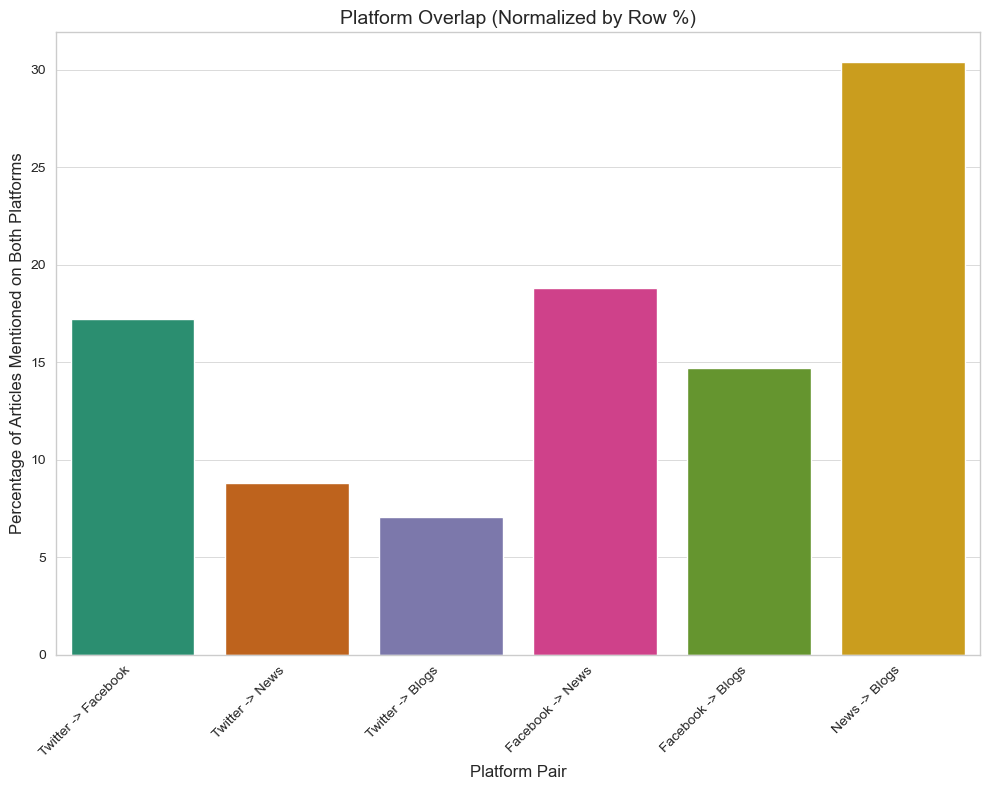

In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the platform pairs
pairs = [('twitter', 'facebook'), ('twitter', 'news'), ('twitter', 'blogs'),
         ('facebook', 'news'), ('facebook', 'blogs'), ('news', 'blogs')]

# Create a dataframe to store the overlap data
overlap_data = []

# Calculate normalized crosstab (row-wise %) for each pair
for p1, p2 in pairs:
    ct = pd.crosstab(
        df_merged_all[f'{p1}_binary'],
        df_merged_all[f'{p2}_binary'],
        normalize='index'
    ) * 100

    # Append both directions (0 -> 1 and 1 -> 1)
    overlap_data.append({
        'Platform Pair': f'{p1.capitalize()} -> {p2.capitalize()}',
        'Overlap (%)': ct.loc[1, 1] if 1 in ct.index and 1 in ct.columns else 0
    })

# Convert to DataFrame
overlap_df = pd.DataFrame(overlap_data)

# Plot the platform overlap using the custom function
plot_barplot(
    data=overlap_df,
    x_col='Platform Pair',
    y_col='Overlap (%)',
    title='Platform Overlap (Normalized by Row %)',
    xlabel='Platform Pair',
    ylabel='Percentage of Articles Mentioned on Both Platforms'
)

In [478]:
df_merged_all['twitter_binary'] = (df_merged_all['twitter'] > 0).astype(int)
df_merged_all['wikipedia_binary'] = (df_merged_all['wikipedia'] > 0).astype(int)

In [481]:
# Twitter statisztika
twitter_citlog_stats = df_merged_all.groupby('twitter_binary')['cit_log'].describe()

# Wikipedia statisztika
wiki_citlog_stats = df_merged_all.groupby('wikipedia_binary')['cit_log'].describe()

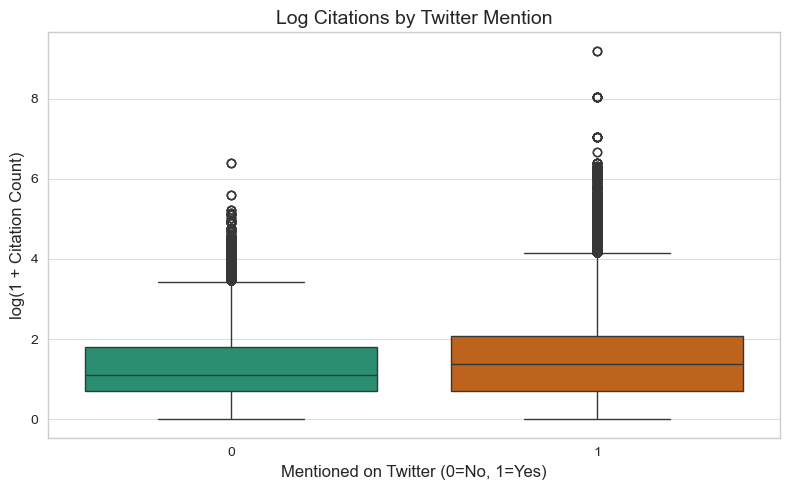

In [483]:
# Visualizing the effect of Twitter mentions on log-transformed citation counts
sns.boxplot(
    data=df_merged_all,
    x='twitter_binary',
    y='cit_log',
    hue='twitter_binary',
    palette="Dark2",
    legend=False
)
plt.title('Log Citations by Twitter Mention')
plt.xlabel('Mentioned on Twitter (0=No, 1=Yes)')
plt.ylabel('log(1 + Citation Count)')
plt.tight_layout()
plt.show()

In [484]:
# Linear regression model of the number of Twitter mentions on log-transformed citations
print("=== Linear Regression: log(1 + Citations) ~ Twitter Mentions ===")

import statsmodels.api as sm

# Regress cit_log on number of Twitter mentions
X = df_merged_all['twitter']
y = df_merged_all['cit_log']

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()

print(model.summary())

=== Linear Regression: log(1 + Citations) ~ Twitter Mentions ===
                            OLS Regression Results                            
Dep. Variable:                cit_log   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 3.685e+04
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        18:37:18   Log-Likelihood:            -2.3901e+06
No. Observations:             1864474   AIC:                         4.780e+06
Df Residuals:                 1864472   BIC:                         4.780e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [487]:
# Create binary column for Wikipedia mentions
df_merged_all['wikipedia_binary'] = (df_merged_all['wikipedia'] > 0).astype(int)

In [489]:
# Linear regression model the effect of Wikipedia mentions on log-transformed citations
print("=== Linear Regression: log(1 + Citations) ~ Wikipedia Mentions ===")

# Define independent and dependent variables
X = df_merged_all['wikipedia']
y = df_merged_all['cit_log']

# Add constant (intercept) to the model
X = sm.add_constant(X)

# Fit linear regression model
model_wiki = sm.OLS(y, X).fit()

# Print summary
print(model_wiki.summary())

=== Linear Regression: log(1 + Citations) ~ Wikipedia Mentions ===
                            OLS Regression Results                            
Dep. Variable:                cit_log   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3449.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        18:37:29   Log-Likelihood:            -2.4066e+06
No. Observations:             1864474   AIC:                         4.813e+06
Df Residuals:                 1864472   BIC:                         4.813e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [491]:
# Count of total and mentioned articles for Twitter and Wikipedia
total_articles = len(df_merged_all)

mention_summary = pd.DataFrame({
    'Platform': ['Twitter', 'Wikipedia'],
    'Mentioned': [
        df_merged_all['twitter_binary'].sum(),
        df_merged_all['wikipedia_binary'].sum()
    ]
})

# Calculate proportion (percentage)
mention_summary['Mentioned (%)'] = (
    mention_summary['Mentioned'] / total_articles * 100
).round(2)

# Display the result
print("=== Number and percentage of articles mentioned per platform ===")
print(mention_summary.to_string(index=False))

=== Number and percentage of articles mentioned per platform ===
 Platform  Mentioned  Mentioned (%)
  Twitter    1603518          86.00
Wikipedia      17374           0.93


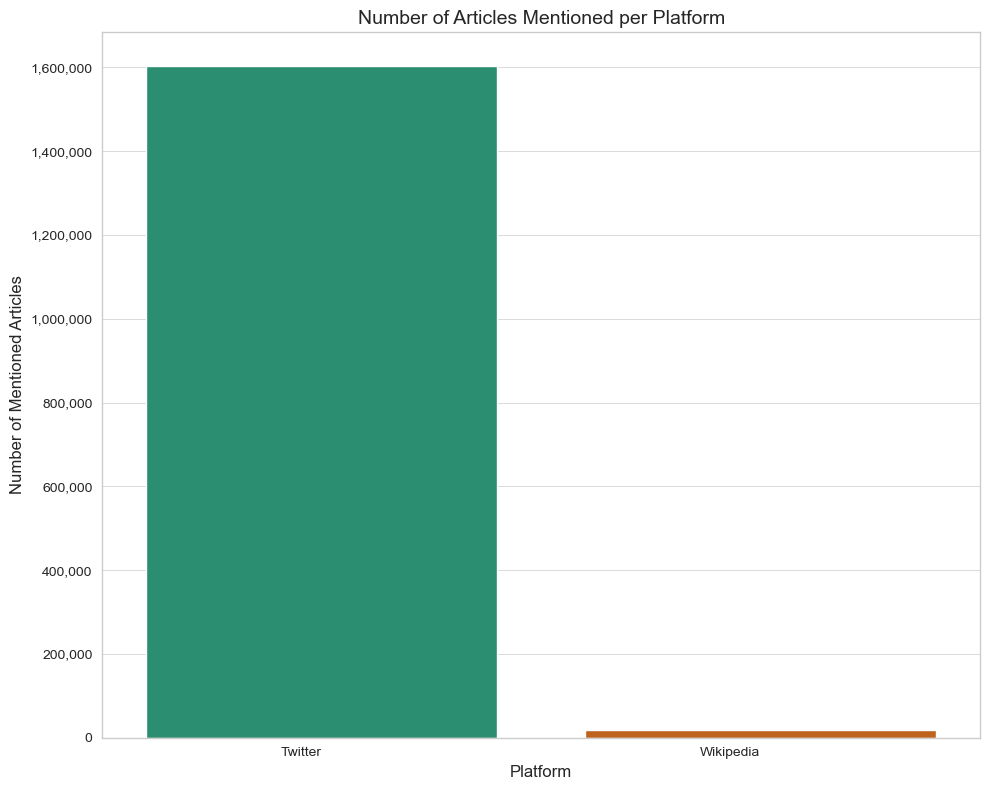

In [493]:
# Plotting the number of articles mentioned on each platform (Twitter and Wikipedia)
mention_counts = [
    ('Twitter', df_merged_all['twitter_binary'].sum()),
    ('Wikipedia', df_merged_all['wikipedia_binary'].sum())
]

mention_df = pd.DataFrame(mention_counts, columns=['Platform', 'Mentioned Articles'])

plot_barplot(
    data=mention_df,
    x_col='Platform',
    y_col='Mentioned Articles',
    title='Number of Articles Mentioned per Platform',
    xlabel='Platform',
    ylabel='Number of Mentioned Articles',
    palette='Dark2',
    rot=0,
    distinct_colors=True
)

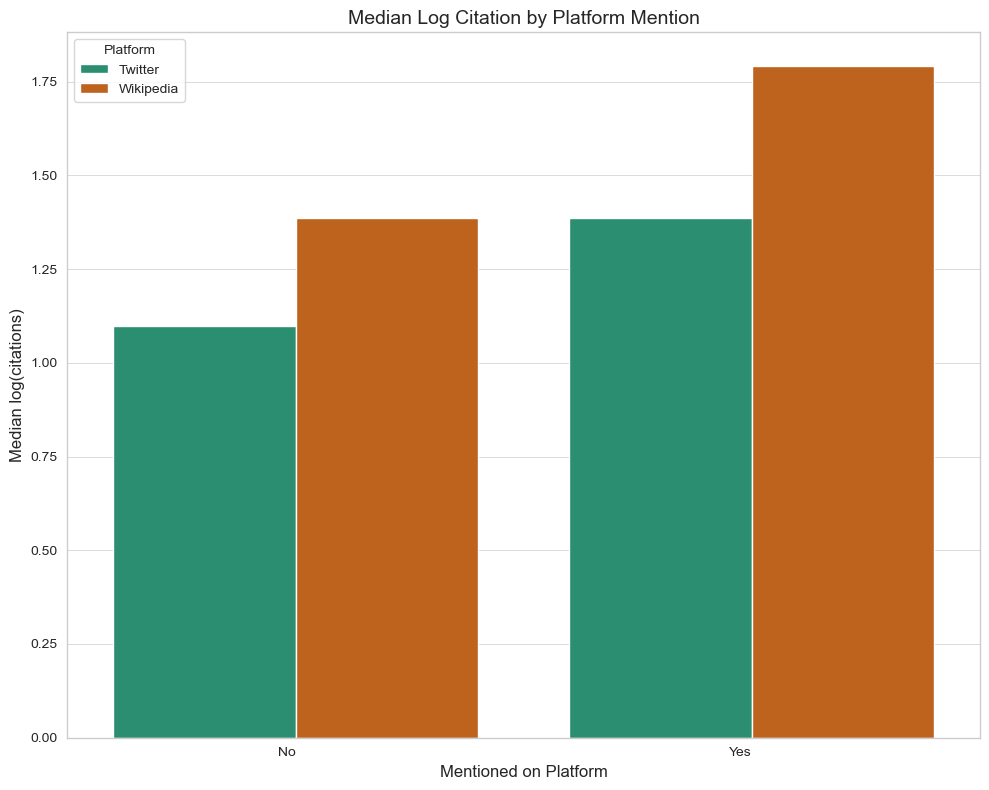

In [495]:
# Median log citation per Twitter group
twitter_stats = (
    df_merged_all.groupby('twitter_binary')['cit_log']
    .median()
    .reset_index()
    .rename(columns={'twitter_binary': 'Mentioned', 'cit_log': 'Median Log Citations'})
)
twitter_stats['Platform'] = 'Twitter'

# Median log citation per Wikipedia group
wiki_stats = (
    df_merged_all.groupby('wikipedia_binary')['cit_log']
    .median()
    .reset_index()
    .rename(columns={'wikipedia_binary': 'Mentioned', 'cit_log': 'Median Log Citations'})
)
wiki_stats['Platform'] = 'Wikipedia'

# Combine both into one dataframe
combined = pd.concat([twitter_stats, wiki_stats], ignore_index=True)

# Optional: make "Mentioned" more readable
combined['Mentioned'] = combined['Mentioned'].map({0: 'No', 1: 'Yes'})

# Plot the comparison
plot_barplot(
    data=combined,
    x_col='Mentioned',
    y_col='Median Log Citations',
    hue_col='Platform',
    title='Median Log Citation by Platform Mention',
    xlabel='Mentioned on Platform',
    ylabel='Median log(citations)',
    palette='Dark2',
    rot=0,
    format_yaxis=False
)

# === 4. Analysis on Ranked Dataset (df_ranked_only) ===

In [498]:
# Create a copy of rows with rank_flag == 1 (ranked institutions only)
df_ranked_only = df_merged_all[df_merged_all['rank_flag'] == 1].copy()

In [499]:
df_ranked_only.shape

(915065, 181)

## 4.1. Key Distribution Metrics and Correlations (Ranked Institutions)

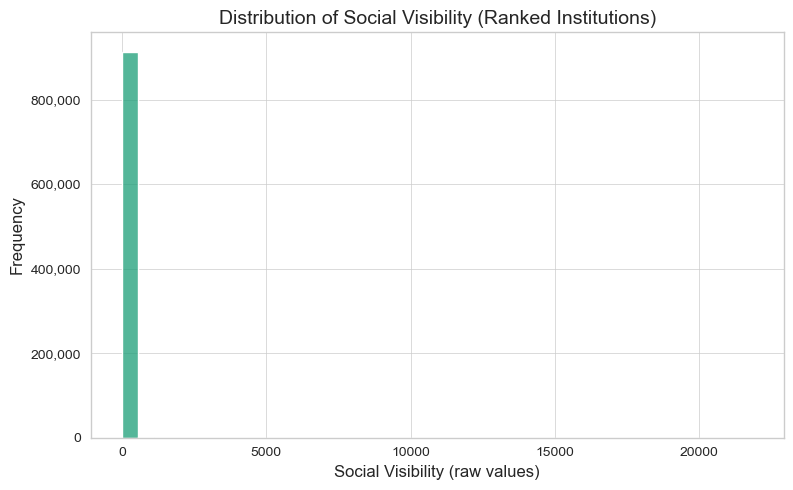

In [503]:
# Plotting the distribution of social visibility scores for ranked institutions
plot_hist(
    df_ranked_only,
    column="stot",
    title="Distribution of Social Visibility (Ranked Institutions)",
    xlabel="Social Visibility (raw values)"
)

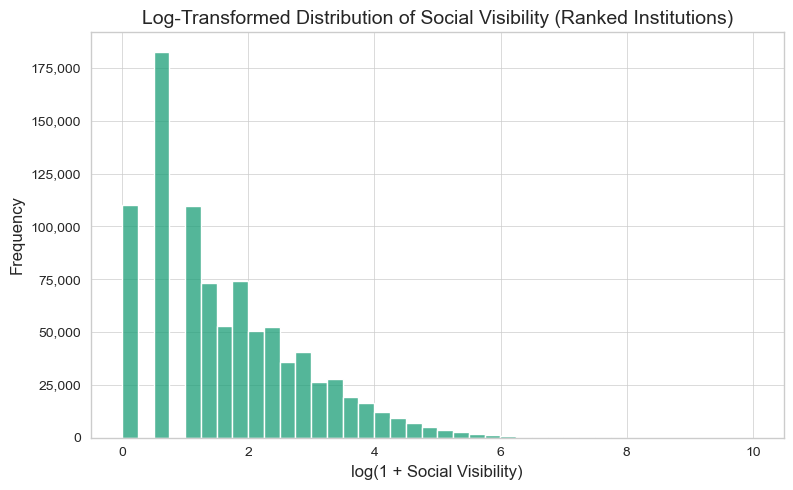

In [505]:
# Plotting the log-transformed distribution of social visibility scores for ranked institutions
plot_hist(
    df_ranked_only,
    column="stot_log1p",
    title="Log-Transformed Distribution of Social Visibility (Ranked Institutions)",
    xlabel="log(1 + Social Visibility)"
)

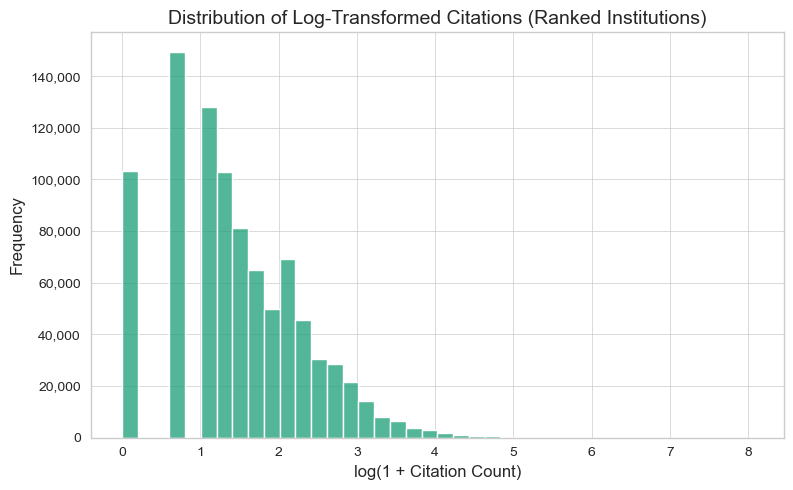

In [507]:
# Plotting the distribution of log-transformed citation counts for ranked institutions
plot_hist(
    df_ranked_only,
    column="cit_log",
    title="Distribution of Log-Transformed Citations (Ranked Institutions)",
    xlabel="log(1 + Citation Count)"
)

In [509]:
# Displaying basic descriptive statistics for raw citation counts author (ranked institutions only)
print("=== Descriptive Statistics: Author level Raw Citation Count (cited_by_count) ===")
print(df_ranked_only['cited_by_count'].describe())

=== Descriptive Statistics: Author level Raw Citation Count (cited_by_count) ===
count    915063.000000
mean       6808.000789
std       16938.533619
min           0.000000
25%         459.000000
50%        1864.000000
75%        6301.000000
max      726140.000000
Name: cited_by_count, dtype: float64


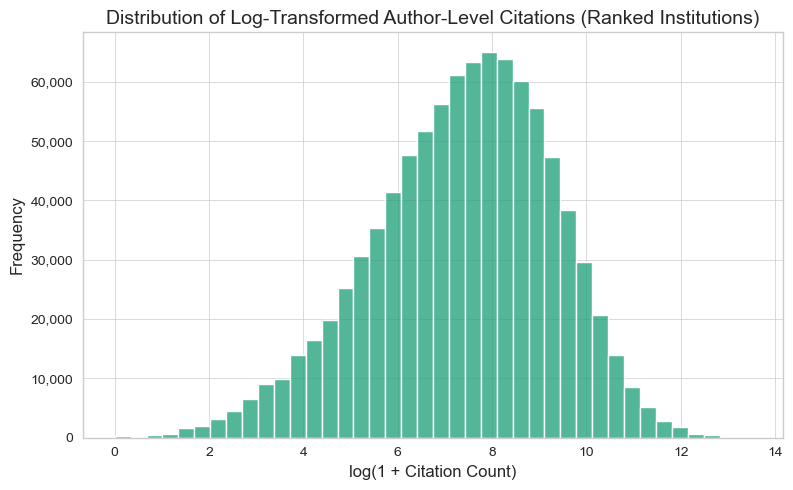

In [511]:
# Plotting the log-transformed distribution of author-level citation counts for ranked institutions
plot_hist(
    data=df_ranked_only,
    column='cited_by_log1p',
    title='Distribution of Log-Transformed Author-Level Citations (Ranked Institutions)',
    xlabel='log(1 + Citation Count)'
)

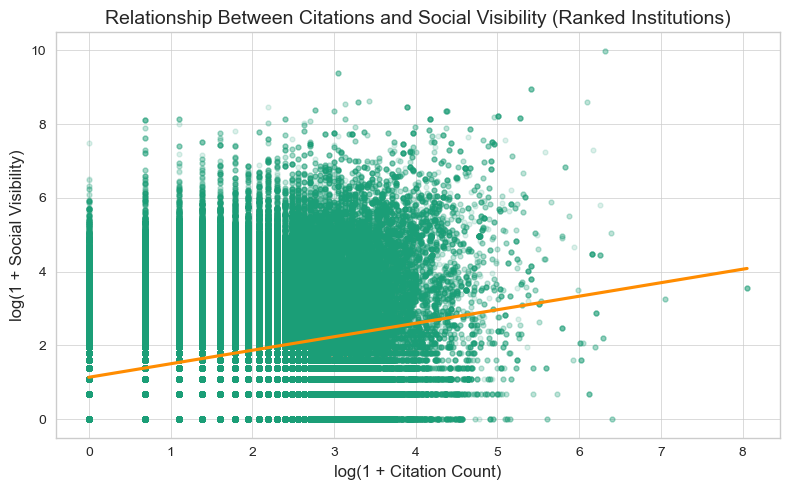

In [513]:
# 'stot_log1p' = social visibility (log-transformed)
# 'cit_log' = citation count (log-transformed)
# Visualizing the relationship between log-transformed citation counts and social visibility among ranked institutions
plot_regplot(
    data=df_ranked_only,
    x_col="cit_log",
    y_col="stot_log1p",
    title="Relationship Between Citations and Social Visibility (Ranked Institutions)",
    xlabel="log(1 + Citation Count)",
    ylabel="log(1 + Social Visibility)",
    scatter_alpha=0.15,
    scatter_size=12,
    line_color="darkorange"
)

### Calculate correlation to assess the strength and direction of the relationship between citations and visibility

In [516]:
# Pearson (linear correlation)
pearson_ranked = df_ranked_only[['cit_log', 'stot_log1p']].corr(method='pearson')

# Spearman (rank-correlation)
spearman_ranked = df_ranked_only[['cit_log', 'stot_log1p']].corr(method='spearman')

# Print Pearson correlation with '_ranked' suffix
print("Pearson correlation (Ranked):\n", pearson_ranked.rename(columns=lambda x: x + '_ranked'))

# Print Spearman correlation with '_ranked' suffix
print("\nSpearman correlation (Ranked):\n", spearman_ranked.rename(columns=lambda x: x + '_ranked'))

Pearson correlation (Ranked):
             cit_log_ranked  stot_log1p_ranked
cit_log            1.00000            0.26313
stot_log1p         0.26313            1.00000

Spearman correlation (Ranked):
             cit_log_ranked  stot_log1p_ranked
cit_log           1.000000           0.222789
stot_log1p        0.222789           1.000000


## 4.2. Gender and Ethnicity Analysis (Ranked Institutions)

### Gender

In [519]:
# Summarizing gender-majority distribution (absolute counts and proportions) among ranked institutions
gender_counts_ranked = df_ranked_only['gender_majority'].value_counts(dropna=False)
gender_props_ranked = df_ranked_only['gender_majority'].value_counts(normalize=True, dropna=False)

gender_summary_ranked = pd.DataFrame({
    'count': gender_counts_ranked,
    'proportion': gender_props_ranked
}).sort_values(by='count', ascending=False)

print("=== Gender Majority Summary: Counts and Proportions (Ranked Institutions) ===")
print(gender_summary_ranked)

=== Gender Majority Summary: Counts and Proportions (Ranked Institutions) ===
                               count  proportion
gender_majority                                 
gender_male_majority          536519    0.586318
gender_female_majority        257576    0.281484
gender_undetermined_majority  120970    0.132198


In [521]:
# Summarizing gender-majority distribution (counts and proportions) among ranked institutions (excluding 'undetermined' category)
df_ranked_gender_filtered = df_ranked_only[df_ranked_only['gender_majority'] != 'gender_undetermined_majority']

# Absolute counts and proportions for ranked gender data
gender_counts_ranked = df_ranked_gender_filtered['gender_majority'].value_counts(dropna=False)
gender_props_ranked = df_ranked_gender_filtered['gender_majority'].value_counts(normalize=True, dropna=False)

# Combine for easier reading
gender_summary_ranked = pd.DataFrame({
    'count': gender_counts_ranked,
    'proportion': gender_props_ranked
}).sort_values(by='count', ascending=False)

print("=== Gender Distribution Summary (Ranked Institutions, Male & Female Only) ===")
print(gender_summary_ranked)

=== Gender Distribution Summary (Ranked Institutions, Male & Female Only) ===
                         count  proportion
gender_majority                           
gender_male_majority    536519    0.675636
gender_female_majority  257576    0.324364


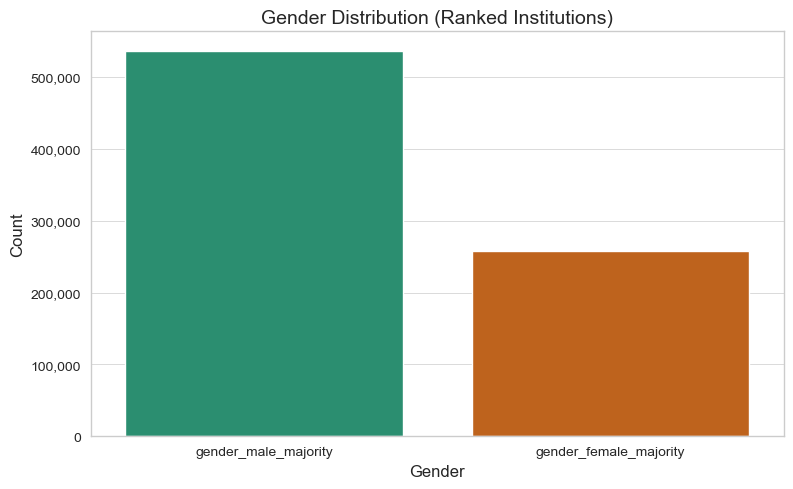

In [523]:
# Plotting the gender-majority distribution among ranked institutions (excluding undetermined category)
plot_countplot(
    df_ranked_gender_filtered,
    'gender_majority',
    title="Gender Distribution (Ranked Institutions)",
    xlabel="Gender"
)

In [525]:
# Displaying descriptive statistics of log-transformed social visibility scores grouped by gender (ranked institutions only)
print("=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority (Ranked Institutions) ===")
gender_stats_ranked = df_ranked_gender_filtered.groupby('gender_majority')['stot_log1p'].describe()
print(gender_stats_ranked)

=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority (Ranked Institutions) ===
                           count      mean       std  min       25%       50%  \
gender_majority                                                                 
gender_female_majority  257576.0  1.722401  1.188365  0.0  0.693147  1.609438   
gender_male_majority    536519.0  1.652873  1.247359  0.0  0.693147  1.386294   

                             75%       max  
gender_majority                             
gender_female_majority  2.484907  8.454253  
gender_male_majority    2.397895  9.991773  


In [527]:
# Get descriptive statistics for log-transformed social visibility grouped by gender (ranked institutions only)
print("=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority (Ranked Institutions) ===")
gender_stats_ranked = df_ranked_gender_filtered.groupby('gender_majority')['stot_log1p'].describe()
display(gender_stats_ranked)

=== Descriptive Statistics: log(1 + Social Visibility) by Gender Majority (Ranked Institutions) ===


,count,mean,std,min,25%,50%,75%,max
gender_majority,,,,,,,,
gender_female_majority,257576.0,1.722401,1.188365,0.0,0.693147,1.609438,2.484907,8.454253
gender_male_majority,536519.0,1.652873,1.247359,0.0,0.693147,1.386294,2.397895,9.991773


In [146]:
# Get descriptive statistics for stot_log1p grouped by gender for non-ranked data
gender_stats = df_gender_filtered.groupby('gender_majority')['stot_log1p'].describe()

# Get descriptive statistics for stot_log1p grouped by gender for ranked data
gender_stats_ranked = df_ranked_gender_filtered.groupby('gender_majority')['stot_log1p'].describe()

# Combine the two sets of descriptive statistics into one DataFrame for comparison
comparison_stats = pd.concat([gender_stats, gender_stats_ranked], keys=['All Institutions', 'Ranked Institutions'], axis=1)

# Print the comparison table
comparison_stats

All Institutions                                     \
                                  count      mean       std  min       25%   
gender_majority                                                              
gender_female_majority         534206.0  1.683479  1.161205  0.0  0.693147   
gender_male_majority          1086824.0  1.663392  1.227389  0.0  0.693147   

                                                     Ranked Institutions  \
                             50%       75%       max               count   
gender_majority                                                            
gender_female_majority  1.386294  2.397895  8.767641            257576.0   
gender_male_majority    1.386294  2.397895  9.991773            536519.0   

                                                                               \
                            mean       std  min       25%       50%       75%   
gender_majority                                                                 
gender_female_majority  1.722401  1.188365  0.0  0.693147  1.609438  2.484907   
gender_male_majority    1.652873  1.247359  0.0  0.693147  1.386294  2.397895   

                                  
                             max  
gender_majority                   
gender_female_majority  8.454253  
gender_male_majority    9.991773

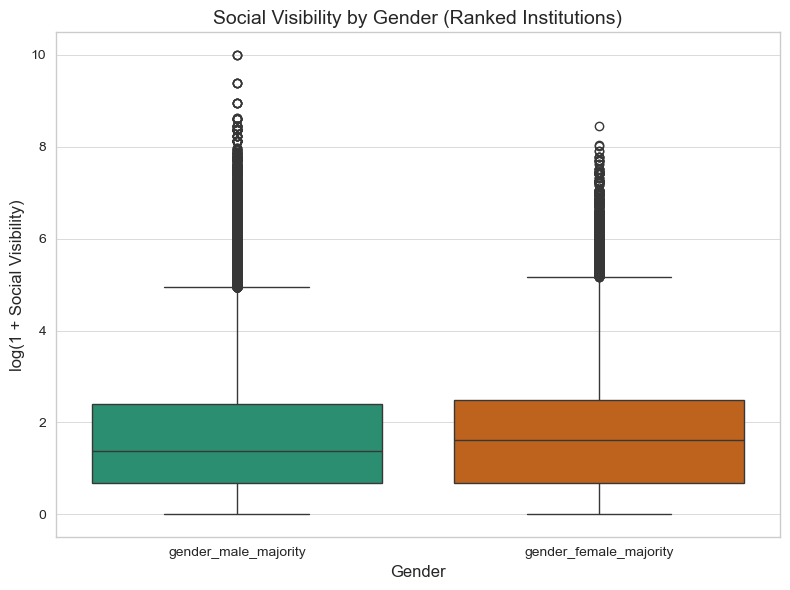

In [529]:
# Comparing log-transformed social visibility across gender-majority groups among ranked institutions
plot_boxplot(
    df_ranked_gender_filtered,
    column_x='gender_majority',
    column_y='stot_log1p',
    title="Social Visibility by Gender (Ranked Institutions)",
    xlabel="Gender",
    ylabel="log(1 + Social Visibility)"
)

In [531]:
# === ANOVA test: stot_log1p by gender majority===

groups_ranked = [
    df_ranked_only[df_ranked_only['gender_majority'] == 'gender_male_majority']['stot_log1p'].dropna(),
    df_ranked_only[df_ranked_only['gender_majority'] == 'gender_female_majority']['stot_log1p'].dropna(),
]

f_stat, p_val = stats.f_oneway(*groups_ranked)

# Display results
print("=== ANOVA: Social Visibility by Gender Majority (Ranked Institutions) ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value:    {p_val:.4g}")

=== ANOVA: Social Visibility by Gender Majority (Ranked Institutions) ===
F-statistic: 557.3860
P-value:    3.435e-123


In [533]:
# === Kruskal–Wallis Test: stot_log1p by gender majority ===

male_group_ranked = df_ranked_only[df_ranked_only['gender_majority'] == 'gender_male_majority']['stot_log1p'].dropna()
female_group_ranked = df_ranked_only[df_ranked_only['gender_majority'] == 'gender_female_majority']['stot_log1p'].dropna()

kw_stat, kw_p = kruskal(female_group_ranked, male_group_ranked)

print("=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Ranked Institutions) ===")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value:     {kw_p:.5f}")

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Ranked Institutions) ===
H-statistic: 1003.5573
P-value:     0.00000


In [863]:
# === Dunn's post-hoc test with Bonferroni correction stot_log1p by gender majority ===

dunn_results = sp.posthoc_dunn(
    df_ranked_gender_filtered,
    val_col='stot_log1p',
    group_col='gender_majority',
    p_adjust='bonferroni'
)

print("=== Dunn's Test by Gender Majority (Ranked Institutions) ===")
print(dunn_results)

=== Dunn's Test by Gender Majority (Ranked Institutions) ===
                        gender_female_majority  gender_male_majority
gender_female_majority            1.000000e+00         3.027200e-220
gender_male_majority             3.027200e-220          1.000000e+00


In [536]:
# === Linear regression model: stot_log1p ~ gender_label ===
print("=== Linear Regression: log(1 + Total Visibility) ~ Gender Majority (Ranked Institutions) ===")

model_ranked = smf.ols('stot_log1p ~ C(gender_majority)', data=df_ranked_gender_filtered).fit()

print(model_ranked.summary())

=== Linear Regression: log(1 + Total Visibility) ~ Gender Majority (Ranked Institutions) ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     557.4
Date:                Wed, 14 May 2025   Prob (F-statistic):          3.43e-123
Time:                        18:47:07   Log-Likelihood:            -1.2902e+06
No. Observations:              794095   AIC:                         2.580e+06
Df Residuals:                  794093   BIC:                         2.580e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
------

### Ethnicity 

In [540]:
ethnicity_counts_ranked = df_ranked_only['ethnicity_majority'].value_counts()

print("=== Ethnicity categories and their frequencies (Ranked Institutions) ===")
print(ethnicity_counts_ranked)

=== Ethnicity categories and their frequencies (Ranked Institutions) ===
ethnicity_majority
ratio_british_origin            404611
ratio_western_northern          205001
ratio_hispanic                  121469
ratio_chinese                    67545
ratio_middle_east                46813
ratio_non_chinese_east_Asian     24875
ratio_indian                     21882
ratio_eastern_European           20382
ratio_other                       2487
Name: count, dtype: int64


In [542]:
ethnicity_props_Ranked = df_ranked_only['ethnicity_majority'].value_counts(normalize=True) * 100

ethnicity_percent_ranked = ethnicity_props_Ranked.round(2).reset_index()
ethnicity_percent_ranked.columns = ['ethnicity_majority', 'percentage']

print("=== Ethnicity Majority Group Percentages (Ranked Institutions) ===")
print(ethnicity_percent_ranked)

=== Ethnicity Majority Group Percentages (Ranked Institutions) ===
             ethnicity_majority  percentage
0          ratio_british_origin       44.22
1        ratio_western_northern       22.40
2                ratio_hispanic       13.27
3                 ratio_chinese        7.38
4             ratio_middle_east        5.12
5  ratio_non_chinese_east_Asian        2.72
6                  ratio_indian        2.39
7        ratio_eastern_European        2.23
8                   ratio_other        0.27


In [544]:
# Sort the full dataset by ethnicity percentage descending
ethnicity_percent = ethnicity_percent.sort_values(by='percentage', ascending=False).reset_index(drop=True)

# Sort the ranked dataset to match the same ethnicity order
ethnicity_percent_ranked = ethnicity_percent_ranked.set_index('ethnicity_majority').reindex(
    ethnicity_percent['ethnicity_majority']
).reset_index()

# Combine the two sets of descriptive statistics into one DataFrame for comparison
comparison_ethnicity = pd.concat(
    [ethnicity_percent, ethnicity_percent_ranked['percentage']],
    axis=1
)

# Rename columns for clarity
comparison_ethnicity.columns = ['ethnicity_majority', 'All Institutions (%)', 'Ranked Institutions (%)']

# Display the table
comparison_ethnicity

,ethnicity_majority,All Institutions (%),Ranked Institutions (%)
0,ratio_british_origin,42.11,44.22
1,ratio_western_northern,23.06,22.40
2,ratio_hispanic,13.06,13.27
3,ratio_chinese,8.13,7.38
4,ratio_middle_east,5.15,5.12
5,ratio_indian,2.93,2.39
6,ratio_eastern_European,2.70,2.23
7,ratio_non_chinese_east_Asian,2.54,2.72
8,ratio_other,0.31,0.27


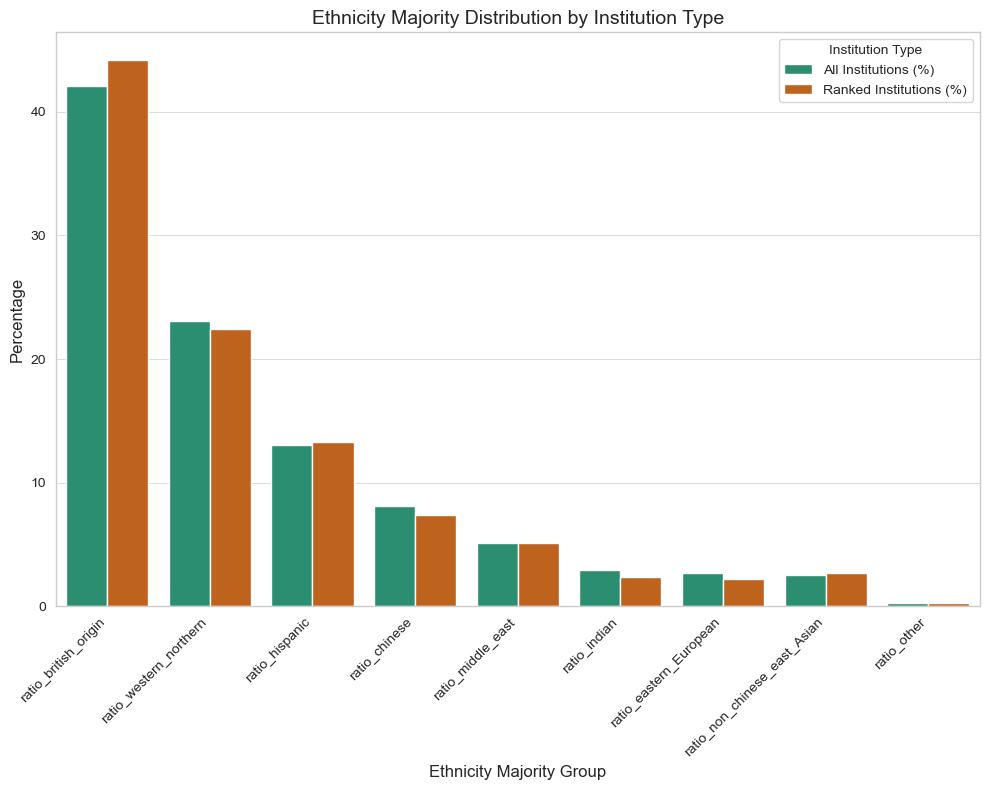

In [546]:
# Reshape the DataFrame for grouped barplot
df_long = comparison_ethnicity.melt(id_vars='ethnicity_majority',
                                     value_vars=['All Institutions (%)', 'Ranked Institutions (%)'],
                                     var_name='Institution Type',
                                     value_name='Percentage')

# Sort by 'All Institutions (%)' descending
sort_order = comparison_ethnicity.sort_values('All Institutions (%)', ascending=False)['ethnicity_majority']
df_long['ethnicity_majority'] = pd.Categorical(df_long['ethnicity_majority'], categories=sort_order, ordered=True)
df_long = df_long.sort_values('ethnicity_majority')

plot_barplot(
    data=df_long,
    x_col='ethnicity_majority',
    y_col='Percentage',
    hue_col='Institution Type',
    title='Ethnicity Majority Distribution by Institution Type',
    xlabel='Ethnicity Majority Group',
    ylabel='Percentage'
)

In [548]:
# List of groups: stot_log1p for each ethnicity_majority category
eth_groups_ranked = [
    df_ranked_only[df_ranked_only['ethnicity_majority'] == cat]['stot_log1p'].dropna() 
    for cat in df_ranked_only['ethnicity_majority'].unique()
]

f_stat_eth, p_val_eth = stats.f_oneway(*eth_groups_ranked)

print("=== ANOVA: Social Visibility by Ethnicity (Ranked Institutions) ===")
print(f"F-statistic: {f_stat_eth:.4f}")
print(f"P-value:    {p_val_eth:.4g}")

=== ANOVA: Social Visibility by Ethnicity (Ranked Institutions) ===
F-statistic: 6741.0644
P-value:    0


In [549]:
# Grouped list for each ethnic category
ethnicity_groups_ranked = [
    df_ranked_only[df_ranked_only['ethnicity_majority'] == eth]['stot_log1p'].dropna()
    for eth in df_ranked_only['ethnicity_majority'].unique()
]

# Kruskal–Wallis
kw_stat, kw_pval = kruskal(*ethnicity_groups_ranked)

print("=== Kruskal–Wallis Test: Social Visibility by Ethnicity (Ranked Institutions) ===")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value:     {kw_pval:.5f}")

=== Kruskal–Wallis Test: Social Visibility by Ethnicity (Ranked Institutions) ===
H-statistic: 53324.2760
P-value:     0.00000


In [552]:
# Perform Dunn's test with Bonferroni correction
dunn_ethnicity_ranked = sp.posthoc_dunn(
    df_ranked_only,
    val_col='stot_log1p',
    group_col='ethnicity_majority',
    p_adjust='bonferroni'
)

# Display the p-value matrix
print("=== Dunn's Test (Ethnicity) (Ranked Institutions) ===")
print(dunn_ethnicity_ranked.round(5))

=== Dunn's Test (Ethnicity) (Ranked Institutions) ===
                              ratio_british_origin  ratio_chinese  \
ratio_british_origin                           1.0            0.0   
ratio_chinese                                  0.0            1.0   
ratio_eastern_European                         0.0            0.0   
ratio_hispanic                                 0.0            0.0   
ratio_indian                                   0.0            0.0   
ratio_middle_east                              0.0            0.0   
ratio_non_chinese_east_Asian                   0.0            0.0   
ratio_other                                    0.0            0.0   
ratio_western_northern                         0.0            0.0   

                              ratio_eastern_European  ratio_hispanic  \
ratio_british_origin                             0.0         0.00000   
ratio_chinese                                    0.0         0.00000   
ratio_eastern_European                 

In [554]:
# === 4.8 Linear regression model: stot_log1p ~ ethnicity_majority ===
print("=== Linear Regression: log(1 + Total Visibility) ~ Ethnicity (Ranked Institutions) ===")

# Run OLS regression with categorical predictor
ethnicity_model_ranked = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=df_ranked_only).fit()

# Display summary
print(ethnicity_model_ranked.summary())

=== Linear Regression: log(1 + Total Visibility) ~ Ethnicity (Ranked Institutions) ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     6741.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        18:48:14   Log-Likelihood:            -1.4597e+06
No. Observations:              915065   AIC:                         2.919e+06
Df Residuals:                  915056   BIC:                         2.920e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-

In [556]:
# === Linear regression model: stot_log1p ~ ethnicity_majority on Ranked Institutions ===

# Run the regression
ethnicity_model_ranked = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=df_ranked_only).fit()

# Extract coefficients and p-values
coef_ethnicity = ethnicity_model_ranked.params
pval_ethnicity = ethnicity_model_ranked.pvalues
r2_ethnicity = ethnicity_model_ranked.rsquared

# Build a clean summary DataFrame
ethnicity_regression_summary_ranked = pd.DataFrame({
    'Variable': coef_ethnicity.index,
    'Coefficient': coef_ethnicity.values,
    'P-Value': pval_ethnicity.values
})

# Add R-squared column
ethnicity_regression_summary_ranked['R-squared'] = r2_ethnicity

# Reset index for nicer view
ethnicity_regression_summary_ranked = ethnicity_regression_summary_ranked.reset_index(drop=True)

# Display nicely
print("=== Ethnicity Regression Summary (Ranked Institutions) ===")
display(ethnicity_regression_summary_ranked)

=== Ethnicity Regression Summary (Ranked Institutions) ===


,Variable,Coefficient,P-Value,R-squared
0,Intercept,1.949721,0.000000e+00,0.055655
1,C(ethnicity_majority)[T.ratio_chinese],-0.831493,0.000000e+00,0.055655
2,C(ethnicity_majority)[T.ratio_eastern_European],-0.714803,0.000000e+00,0.055655
3,C(ethnicity_majority)[T.ratio_hispanic],-0.482817,0.000000e+00,0.055655
4,C(ethnicity_majority)[T.ratio_indian],-0.590019,0.000000e+00,0.055655
5,C(ethnicity_majority)[T.ratio_middle_east],-0.760722,0.000000e+00,0.055655
6,C(ethnicity_majority)[T.ratio_non_chinese_east...,-0.594619,0.000000e+00,0.055655
7,C(ethnicity_majority)[T.ratio_other],-0.592939,8.141967e-135,0.055655
8,C(ethnicity_majority)[T.ratio_western_northern],-0.282043,0.000000e+00,0.055655


## 4.3. Platform usage across publications (Ranked Institutions)

In [558]:
# Compute overall descriptive statistics for each platform
platform_stats_ranked = df_ranked_only[altmetric_cols].agg(['count', 'mean', 'std', 'median', 'max']).T

# Calculate percentage of articles where the platform is mentioned
platform_stats_ranked['pct_mentioned'] = (df_ranked_only[altmetric_cols] > 0).sum() / len(df_ranked_only) * 100

# Rename and round for clarity
platform_stats_ranked = platform_stats_ranked.rename(columns={'median': '50%'}).round({
    'mean': 2, 'std': 2, '50%': 0, 'max': 0, 'pct_mentioned': 2
})

# Display
print("Overall statistics for all Altmetric platforms (Ranked Institutions):")
display(platform_stats_ranked)

Overall statistics for all Altmetric platforms (Ranked Institutions):


,count,mean,std,50%,max,pct_mentioned
blogs,915065.0,0.12,0.63,0.0,79.0,7.27
book_reviews,915065.0,0.00,0.00,0.0,2.0,0.00
f1000,915065.0,0.01,0.10,0.0,9.0,0.65
facebook,915065.0,0.25,0.94,0.0,127.0,15.16
googleplus,915065.0,0.01,0.32,0.0,84.0,0.92
linkedin,915065.0,0.00,0.00,0.0,0.0,0.00
misc,915065.0,0.01,0.78,0.0,278.0,0.18
news,915065.0,0.67,5.77,0.0,515.0,8.63
patent,915065.0,0.00,0.04,0.0,19.0,0.01
peer_reviews,915065.0,0.00,0.08,0.0,10.0,0.10


In [560]:
# Select key platforms with more than 1% of papers mentioned
key_platforms_ranked = platform_stats_ranked.index[platform_stats_ranked['pct_mentioned'] > 1].tolist()
print("\nKey platforms (>1% mentioned):", key_platforms_ranked)


Key platforms (>1% mentioned): ['blogs', 'facebook', 'news', 'reddit', 'twitter']


In [563]:
# Create binary indicators for all key platforms on the full dataset
for platform in key_platforms_ranked:
    df_ranked_only[f'{platform}_binary'] = (df_ranked_only[platform] > 0).astype(int)

# Show overall usage again for all key platforms (on the full df_merged_all)
for platform in key_platforms_ranked:
    counts = df_ranked_only[f'{platform}_binary'].value_counts().sort_index()
    pct    = df_ranked_only[f'{platform}_binary'].value_counts(normalize=True).sort_index() * 100
    print(f"\n{platform.capitalize()} overall usage:")
    print(f"  Not mentioned (0): {counts[0]} ({pct[0]:.2f}%)")
    print(f"  Mentioned     (1): {counts[1]} ({pct[1]:.2f}%)")


Blogs overall usage:
  Not mentioned (0): 848554 (92.73%)
  Mentioned     (1): 66511 (7.27%)

Facebook overall usage:
  Not mentioned (0): 776338 (84.84%)
  Mentioned     (1): 138727 (15.16%)

News overall usage:
  Not mentioned (0): 836092 (91.37%)
  Mentioned     (1): 78973 (8.63%)

Reddit overall usage:
  Not mentioned (0): 902017 (98.57%)
  Mentioned     (1): 13048 (1.43%)

Twitter overall usage:
  Not mentioned (0): 139148 (15.21%)
  Mentioned     (1): 775917 (84.79%)


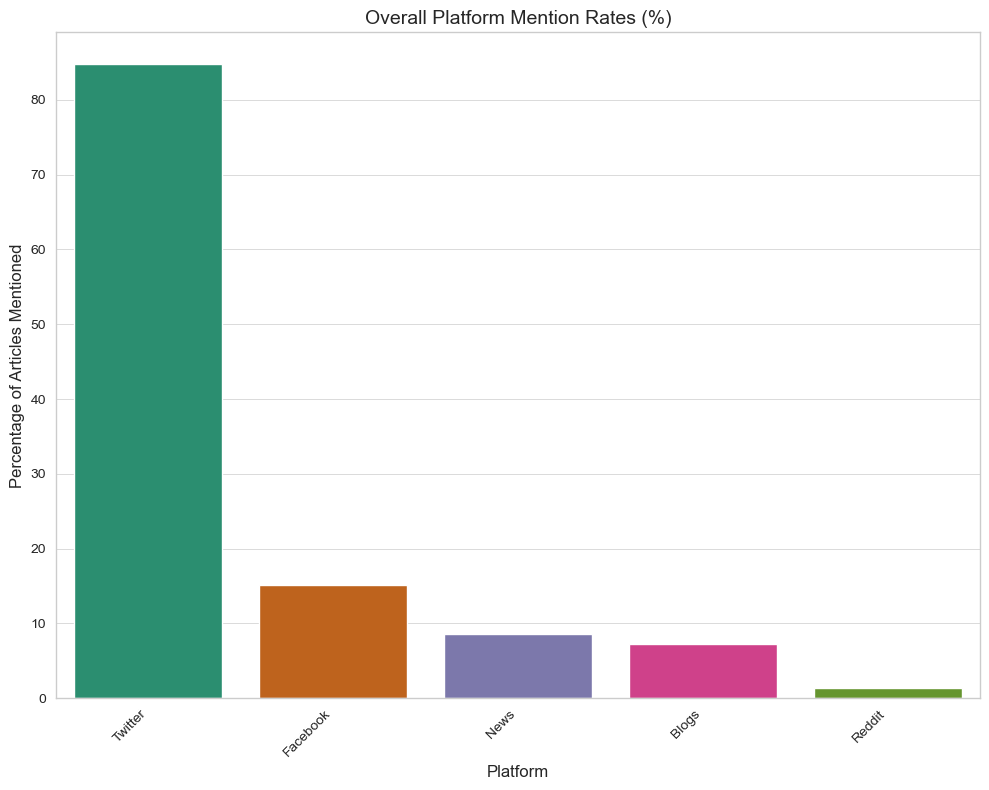

In [565]:
usage_data_ranked = []

for platform in key_platforms_ranked:
    pct = df_ranked_only[f"{platform}_binary"].mean() * 100
    usage_data_ranked.append((platform.capitalize(), pct))

usage_df_ranked = (
    pd.DataFrame(usage_data_ranked, columns=['Platform', 'Mentioned (%)'])
    .sort_values('Mentioned (%)', ascending=False)
    .reset_index(drop=True)  # optional: reset index nicely
)

# Collect usage data for each platform
plot_barplot(
    data=usage_df_ranked,
    x_col='Platform',
    y_col='Mentioned (%)',
    title='Overall Platform Mention Rates (%)',
    xlabel='Platform',
    ylabel='Percentage of Articles Mentioned'
)

In [567]:
# Crosstab platform overlap on the full dataset
for p1, p2 in pairs:
    ct = pd.crosstab(
        df_ranked_only[f'{p1}_binary'],
        df_ranked_only[f'{p2}_binary'],
        normalize='index'
    ) * 100
    print(f"\nOverlap: {p1.capitalize()} vs {p2.capitalize()} (%)")
    print(ct.round(2))


Overlap: Twitter vs Facebook (%)
facebook_binary      0      1
twitter_binary               
0                92.70   7.30
1                83.43  16.57

Overlap: Twitter vs News (%)
news_binary         0     1
twitter_binary             
0               93.24  6.76
1               91.03  8.97

Overlap: Twitter vs Blogs (%)
blogs_binary        0     1
twitter_binary             
0               95.27  4.73
1               92.28  7.72

Overlap: Facebook vs News (%)
news_binary          0      1
facebook_binary              
0                93.38   6.62
1                80.10  19.90

Overlap: Facebook vs Blogs (%)
blogs_binary         0      1
facebook_binary              
0                94.35   5.65
1                83.67  16.33

Overlap: News vs Blogs (%)
blogs_binary      0      1
news_binary               
0             95.27   4.73
1             65.88  34.12


# === 5. Visibility per rank group ===

## Rank group creation

In [571]:
# Convert textual rank values to numeric estimates (e.g. "=74" → 74, "301–400" → 350)
def parse_rank(rank):
    if pd.isna(rank):
        return np.nan
    if isinstance(rank, str):
        if "–" in rank:
            parts = rank.replace('–', '-').split('-')
            try:
                return (int(parts[0]) + int(parts[1])) / 2
            except:
                return np.nan
        if rank.startswith("="):
            try:
                return int(rank[1:])
            except:
                return np.nan
    try:
        return float(rank)
    except:
        return np.nan

df_ranked_only['final_rank_numeric'] = df_ranked_only['final_rank'].apply(parse_rank)

In [573]:
# Create rank_group from numeric values
df_ranked_only['rank_group'] = pd.cut(
    df_ranked_only['final_rank_numeric'],
    bins=[0, 50, 100, 200, 500, df_ranked_only['final_rank_numeric'].max()],
    labels=['top50', '51–100', '101–200', '201–500', '500+'],
    include_lowest=True
)

# Add '>1000' category for '1001+' values
df_ranked_only['rank_group'] = df_ranked_only['rank_group'].cat.add_categories('>1000')
df_ranked_only.loc[df_ranked_only['final_rank'] == '1001+', 'rank_group'] = '>1000'

In [575]:
# Define the desired order of rank groups
rank_order = ['top50', '51–100', '101–200', '201–500', '500+', '>1000']

## 5.1. Key Distribution Metrics and Correlations

In [578]:
# Calculate descriptive statistics for log-transformed social visibility by rank group
rank_group_stats = df_ranked_only.groupby('rank_group', observed=True)['stot_log1p'].describe()

# Display the table
print("=== Social Visibility (log) by Rank Group ===")
rank_group_stats

=== Social Visibility (log) by Rank Group ===


,count,mean,std,min,25%,50%,75%,max
rank_group,,,,,,,,
top50,202562.0,1.957808,1.339888,0.0,0.693147,1.791759,2.833213,9.991773
51–100,171154.0,1.702318,1.233954,0.0,0.693147,1.386294,2.484907,9.390075
101–200,160715.0,1.712291,1.250711,0.0,0.693147,1.609438,2.484907,9.991773
201–500,227799.0,1.598011,1.166418,0.0,0.693147,1.386294,2.302585,8.606119
500+,133708.0,1.367178,1.034170,0.0,0.693147,1.098612,1.945910,8.461258
>1000,19127.0,1.159600,0.865177,0.0,0.693147,1.098612,1.609438,6.383507


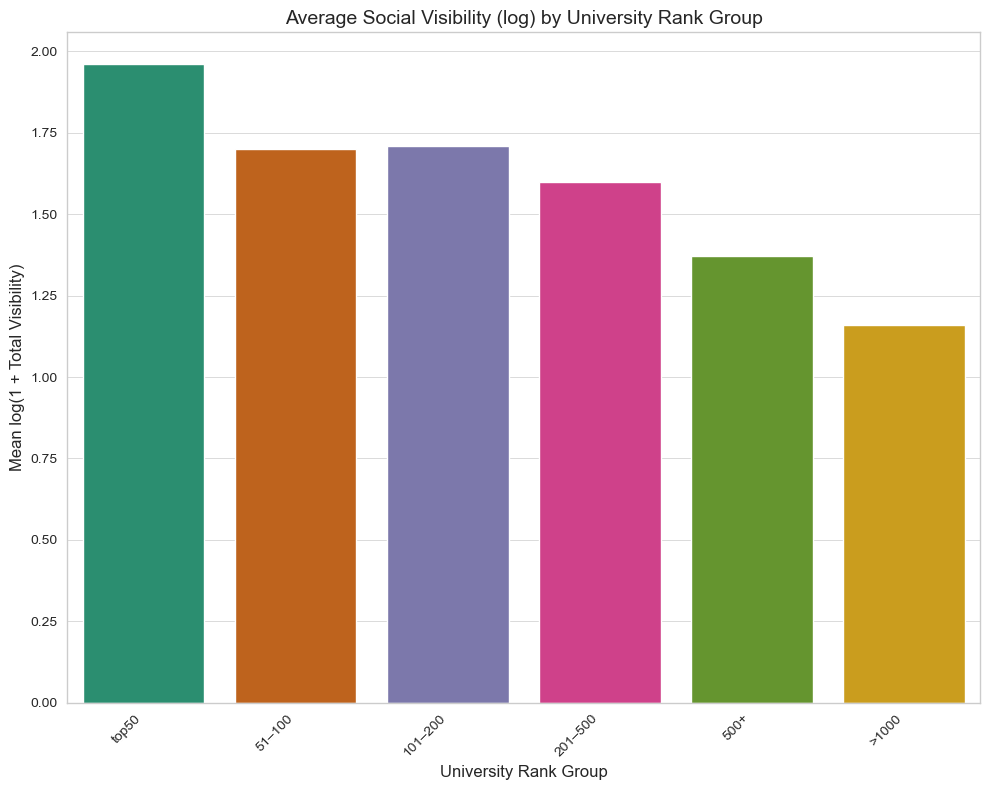

In [736]:
# === Average social visibility (log-transformed) by university rank group ===

# Calculate mean visibility for each rank group
rank_group_means = (
    df_ranked_only.groupby('rank_group', observed=True)['stot_log1p']
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={'stot_log1p': 'Mean_log_Visibility'})
    .sort_values('rank_group')  # Ensure proper rank group ordering
)

# Plot using the custom barplot function
plot_barplot(
    data=rank_group_means,
    x_col='rank_group',
    y_col='Mean_log_Visibility',
    title='Average Social Visibility (log) by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Mean log(1 + Total Visibility)',
    format_yaxis=False
)

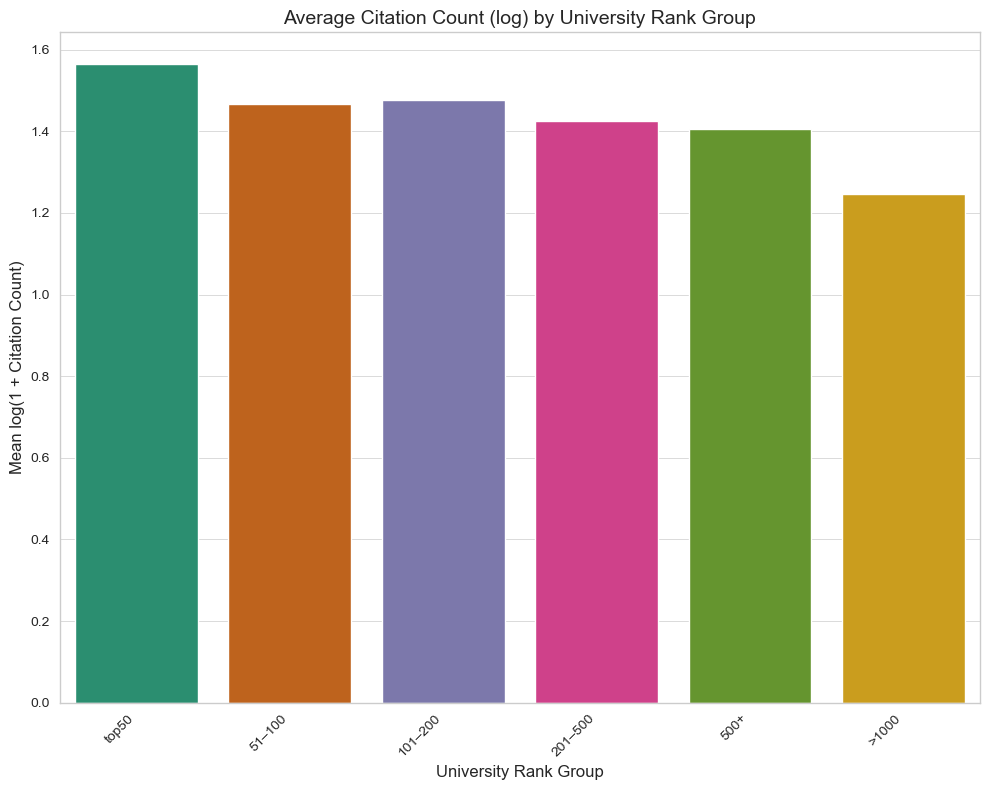

In [738]:
# === Average citation count (log-transformed) by university rank group ===

# Calculate mean log citation count for each rank group
rank_group_cit_means = (
    df_ranked_only
    .groupby('rank_group', observed=True)['cit_log']
    .mean()
    .reset_index()
    .rename(columns={'cit_log': 'Mean_log_Citations'})
    .sort_values('rank_group')  # Ensure proper ordering of rank groups
)

# Plot using the custom barplot function
plot_barplot(
    data=rank_group_cit_means,
    x_col='rank_group',
    y_col='Mean_log_Citations',
    title='Average Citation Count (log) by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Mean log(1 + Citation Count)',
    format_yaxis=False
)

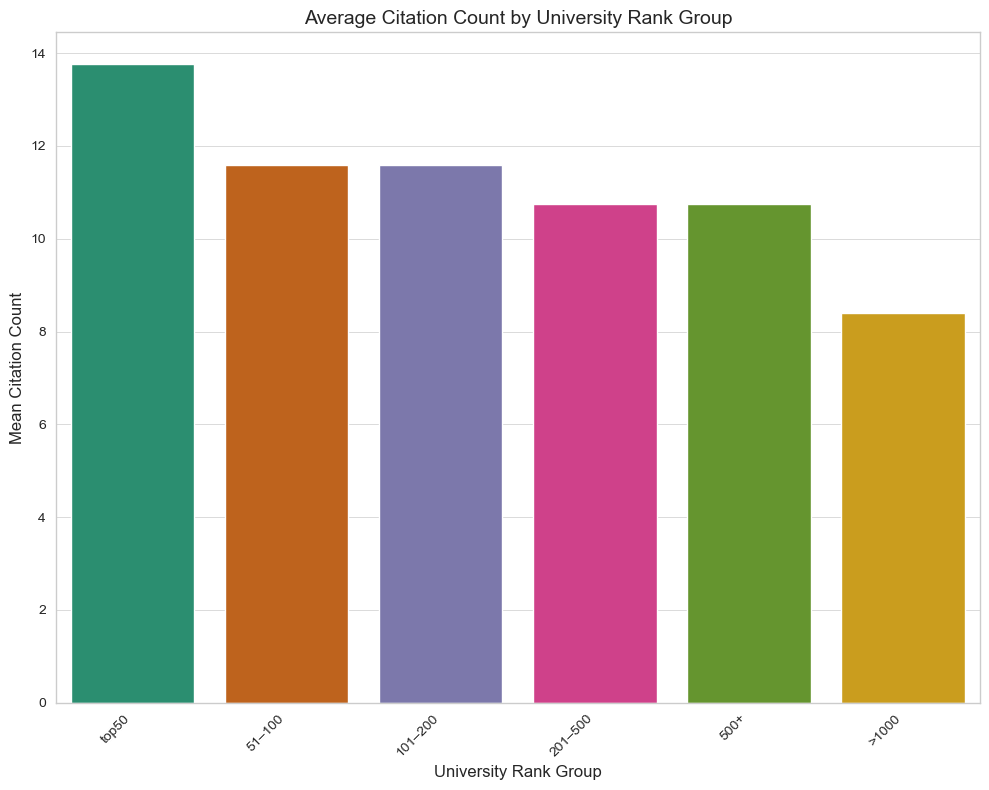

In [240]:
# === Average raw citation count by university rank group ===

# Calculate mean raw citation count for each rank group
rank_group_allcit_means = (
    df_ranked_only
    .groupby('rank_group', observed=True)['all_citaitons']
    .mean()
    .reset_index()
    .rename(columns={'all_citaitons': 'Mean_Citations'})
    .sort_values('rank_group')  # Ensure proper ordering of rank groups
)

# Plot using the custom barplot function
plot_barplot(
    data=rank_group_allcit_means,
    x_col='rank_group',
    y_col='Mean_Citations',
    title='Average Citation Count by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Mean Citation Count'
)

In [242]:
# === Descriptive statistics for cited_by_count by rank group (Ranked Institutions) ===

# Calculate descriptive stats for raw citation counts within each rank group
rank_group_cite_stats = (
    df_ranked_only
    .groupby('rank_group', observed=True)['cited_by_count']
    .describe()
)

# Display the table
print("=== Citation Counts by University Rank Group ===")
rank_group_cite_stats

=== Citation Counts by University Rank Group ===


,count,mean,std,min,25%,50%,75%,max
rank_group,,,,,,,,
top50,202561.0,9891.823451,22347.787599,0.0,652.0,2693.0,9657.0,726140.0
51–100,171153.0,7490.956320,18033.867376,0.0,493.0,2093.0,7170.0,496353.0
101–200,160715.0,6974.675531,16897.016409,0.0,477.0,2041.0,6932.0,683831.0
201–500,227799.0,5512.288166,13117.229065,0.0,437.0,1764.0,5449.0,427179.0
500+,133708.0,3911.836405,10910.269804,0.0,319.0,1181.0,3543.0,427179.0
>1000,19127.0,2315.041407,6554.354521,0.0,178.0,683.0,2130.0,418135.0


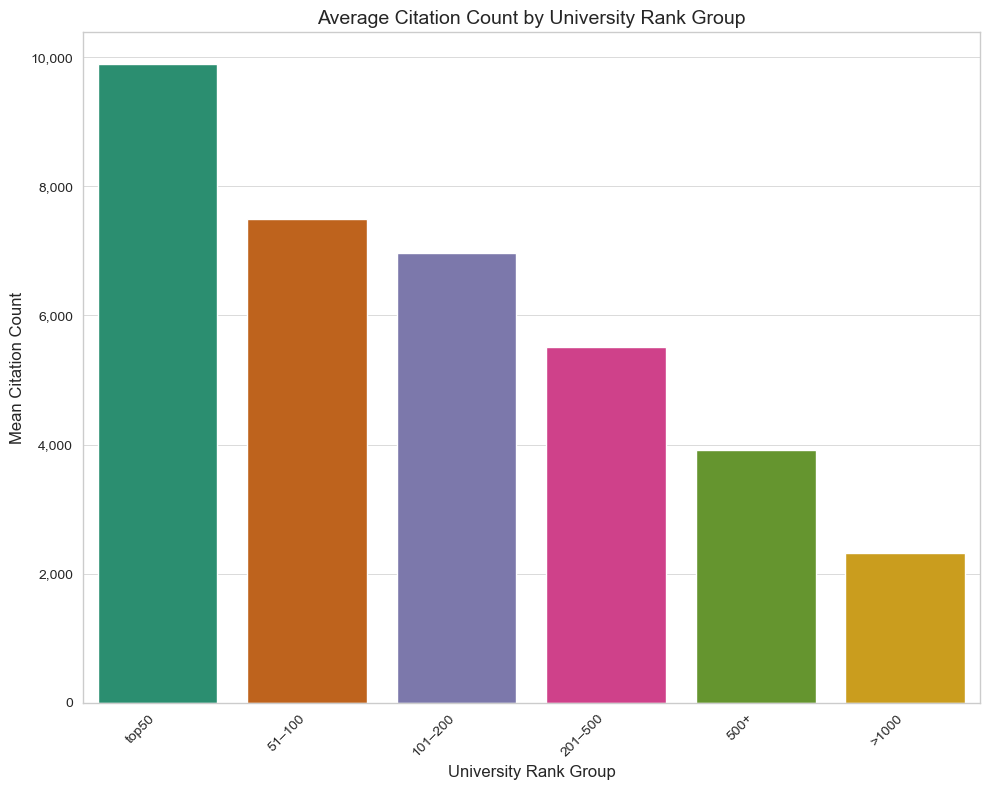

In [740]:
# === Average raw citation count by university rank group ===

# Calculate mean cited_by_count for each rank group
rank_group_cited_means = (
    df_ranked_only
    .groupby('rank_group', observed=True)['cited_by_count']
    .mean()
    .reset_index()
    .rename(columns={'cited_by_count': 'Mean_Citations'})
    .sort_values('rank_group')  # Ensure proper ordering
)

# Plot using the custom barplot function
plot_barplot(
    data=rank_group_cited_means,
    x_col='rank_group',
    y_col='Mean_Citations',
    title='Average Citation Count by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Mean Citation Count'
)

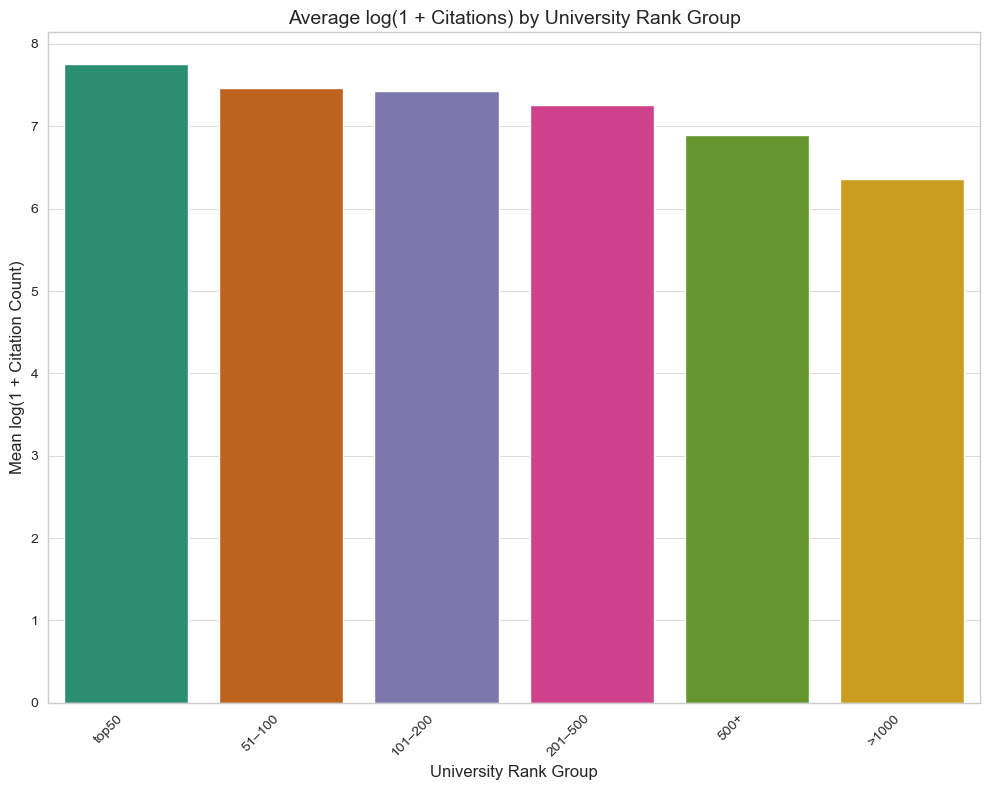

In [742]:
# === 3. (Optional) Barplot: average log-citations by rank group ===
rank_group_citlog_means = (
    df_ranked_only
    .groupby('rank_group', observed=True)['cited_by_log1p']
    .mean()
    .reset_index()
    .rename(columns={'cited_by_log1p': 'Mean_log_Citations'})
    .sort_values('rank_group')
)

plot_barplot(
    data=rank_group_citlog_means,
    x_col='rank_group',
    y_col='Mean_log_Citations',
    title='Average log(1 + Citations) by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Mean log(1 + Citation Count)'
)

### Calculate correlation to assess the strength and direction of the relationship between citations and visibility, by ranking groups

In [585]:
# === Correlations by rank group, silencing the warning ===

def compute_corr(subdf):
    return pd.Series({
        'pearson': subdf['cit_log'].corr(subdf['stot_log1p'], method='pearson'),
        'spearman': subdf['cit_log'].corr(subdf['stot_log1p'], method='spearman')
    })

corr_by_rank = (
    df_ranked_only
    .groupby('rank_group', observed=True)
    .apply(compute_corr, include_groups=False)  # <-- ide tesszük
    .round(3)
)

print("=== Correlations by University Rank Group ===")
corr_by_rank

=== Correlations by University Rank Group ===


,pearson,spearman
rank_group,,
top50,0.330,0.290
51–100,0.272,0.234
101–200,0.255,0.222
201–500,0.224,0.190
500+,0.158,0.134
>1000,0.140,0.128


In [587]:
# Copy the original rank value to preserve it
df_ranked_only['final_rank_numeric'] = pd.to_numeric(
    df_ranked_only['final_rank'], errors='coerce'
)

# Assign 1001 to those explicitly marked as '1001+'
df_ranked_only.loc[df_ranked_only['final_rank'] == '1001+', 'final_rank_numeric'] = 1001

In [589]:
# Keep only rows with valid rank and visibility
rank_numeric_df = df_ranked_only.dropna(subset=['final_rank_numeric', 'stot_log1p']).copy()

# Define threshold: pl. top 1% visibility
threshold = rank_numeric_df['stot_log1p'].quantile(0.99)

# Find outliers with low-ranked institutions but very high visibility
outlier_df = rank_numeric_df[
    (rank_numeric_df['stot_log1p'] >= threshold) &
    (rank_numeric_df['final_rank_numeric'] > 1000)  # low prestige group
]

# Display results
print("=== Outliers: High Visibility from Low-Ranked Institutions ===")
print(outlier_df[['final_rank', 'final_rank_numeric', 'stot_log1p', 'doi']].sort_values(by='stot_log1p', ascending=False))

=== Outliers: High Visibility from Low-Ranked Institutions ===
        final_rank  final_rank_numeric  stot_log1p  \
251529       1001+              1001.0    6.383507   
251530       1001+              1001.0    6.383507   
251535       1001+              1001.0    6.383507   
489219       1001+              1001.0    6.169611   
489220       1001+              1001.0    6.169611   
1754433      1001+              1001.0    6.150603   
1754431      1001+              1001.0    6.150603   
1754435      1001+              1001.0    6.150603   
1454049      1001+              1001.0    6.070738   
1791348      1001+              1001.0    5.811141   
1675647      1001+              1001.0    5.730100   
1675645      1001+              1001.0    5.730100   
1675644      1001+              1001.0    5.730100   
1675641      1001+              1001.0    5.730100   

                                    doi  
251529   10.1016/j.ijnurstu.2019.02.008  
251530   10.1016/j.ijnurstu.2019.02.008  


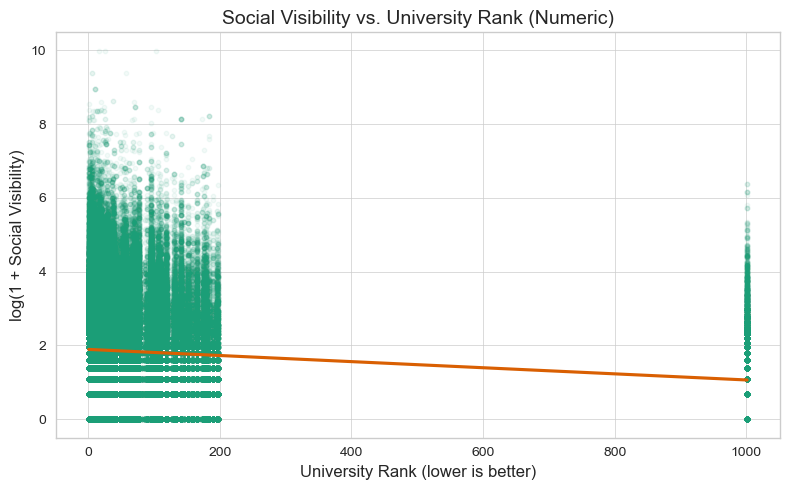

In [744]:
# Visualizing the relationship between university rank and log-transformed social visibility
plot_regplot(
    data=rank_numeric_df,
    x_col='final_rank_numeric',
    y_col='stot_log1p',
    title='Social Visibility vs. University Rank (Numeric)',
    xlabel='University Rank (lower is better)',
    ylabel='log(1 + Social Visibility)',
    scatter_alpha=0.05,
    scatter_size=10
)

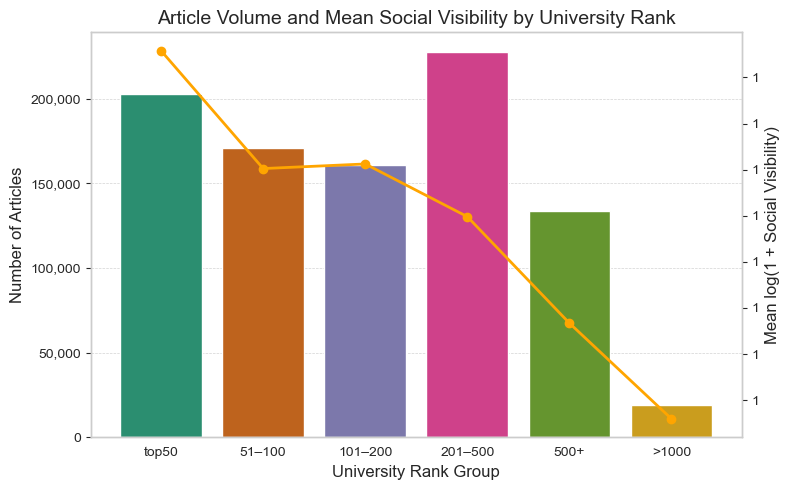

In [745]:
# Visualizing the relationship between university rank groups, article output, and mean social visibility
# (Bar = number of articles, Line = average log-transformed social visibility)
# Step 1: compute group counts and mean social visibility
rank_stats = (
    df_ranked_only
    .groupby('rank_group', observed=True)['stot_log1p']
    .agg(['count', 'mean'])
    .reindex(rank_order)
    .reset_index()
    .rename(columns={'mean': 'Mean_Social_Visibility', 'count': 'Article_Count'})
)

# Step 2: plot combined bar and line chart
combined_bar_line_plot(
    data=rank_stats,
    x_col='rank_group',
    bar_y_col='Article_Count',
    line_y_col='Mean_Social_Visibility',
    title='Article Volume and Mean Social Visibility by University Rank',
    xlabel='University Rank Group',
    bar_ylabel='Number of Articles',
    line_ylabel='Mean log(1 + Social Visibility)',
    palette='Dark2',
    line_color='orange'
)

In [746]:
# === ANOVA: Social visibility by rank group ===
from scipy import stats
# Create list of stot_log1p values for each rank group
groups_by_rank = [
    df_ranked_only[df_ranked_only['rank_group'] == group]['stot_log1p'].dropna()
    for group in rank_order
]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups_by_rank)

# Display results
print("=== ANOVA: Social Visibility by University Rank Group ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value:    {p_val:.4g}")

=== ANOVA: Social Visibility by University Rank Group ===
F-statistic: 4858.7152
P-value:    0


In [747]:
# === Kruskal–Wallis Test: Social visibility by rank group ===

# Extract groups again for clarity
rank_groups_individual = [
    df_ranked_only[df_ranked_only['rank_group'] == group]['stot_log1p'].dropna()
    for group in rank_order
]

# Run the Kruskal–Wallis test
kw_stat, kw_p = kruskal(*rank_groups_individual)

# Display results
print("=== Kruskal–Wallis Test: Social Visibility by University Rank Group ===")
print(f"H-statistic: {kw_stat:.4f}")
print(f"P-value:     {kw_p:.5f}")

=== Kruskal–Wallis Test: Social Visibility by University Rank Group ===
H-statistic: 22889.3331
P-value:     0.00000


In [877]:
# === Dunn's post-hoc test with Bonferroni correction ===

# Perform pairwise comparisons
dunn_results_rank = sp.posthoc_dunn(
    df_ranked_only,
    val_col='stot_log1p',
    group_col='rank_group',
    p_adjust='bonferroni'
)

# Display Dunn test result matrix
print("=== Dunn's Test: Social Visibility by University Rank Group ===")
display(dunn_results_rank)

=== Dunn's Test: Social Visibility by University Rank Group ===


,top50,51–100,101–200,201–500,500+,>1000
top50,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
51–100,0.0,1.000000e+00,6.008561e-01,2.127490e-138,0.000000e+00,0.000000e+00
101–200,0.0,6.008561e-01,1.000000e+00,4.899404e-158,0.000000e+00,0.000000e+00
201–500,0.0,2.127490e-138,4.899404e-158,1.000000e+00,0.000000e+00,0.000000e+00
500+,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.653379e-123
>1000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.653379e-123,1.000000e+00


In [750]:
# === Linear regression: stot_log1p ~ rank_group ===

# Fit OLS regression model
model_rankgroup = smf.ols('stot_log1p ~ C(rank_group)', data=df_ranked_only).fit()

# Print regression summary
print("=== OLS Regression: Social Visibility ~ Rank Group ===")
print(model_rankgroup.summary())

=== OLS Regression: Social Visibility ~ Rank Group ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4859.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        20:20:54   Log-Likelihood:            -1.4739e+06
No. Observations:              915065   AIC:                         2.948e+06
Df Residuals:                  915059   BIC:                         2.948e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [752]:
# Grouped by DOI by stot_log1p 
outlier_summary = (
    outlier_df
    .groupby('doi')
    .agg({
        'stot_log1p': 'first',
        'final_rank': 'first',
        'final_rank_numeric': 'first'
    })
    .sort_values('stot_log1p', ascending=False)
)

print(outlier_summary)

                                stot_log1p final_rank  final_rank_numeric
doi                                                                      
10.1016/j.ijnurstu.2019.02.008    6.383507      1001+              1001.0
10.1038/s41586-019-1479-6         6.169611      1001+              1001.0
10.1016/j.ekir.2019.05.016        6.150603      1001+              1001.0
10.1038/d41586-019-00120-1        6.070738      1001+              1001.0
10.1080/17461391.2018.1505957     5.811141      1001+              1001.0
10.1016/j.ajic.2019.03.027        5.730100      1001+              1001.0


In [753]:
#outlier_summary.to_csv('manual_review/outlier_high_visibility_low_rank.csv')

C:\Users\Diak\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diak\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diak\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Diak\AppData\Local\spyder-6\envs\spyder-runtime\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

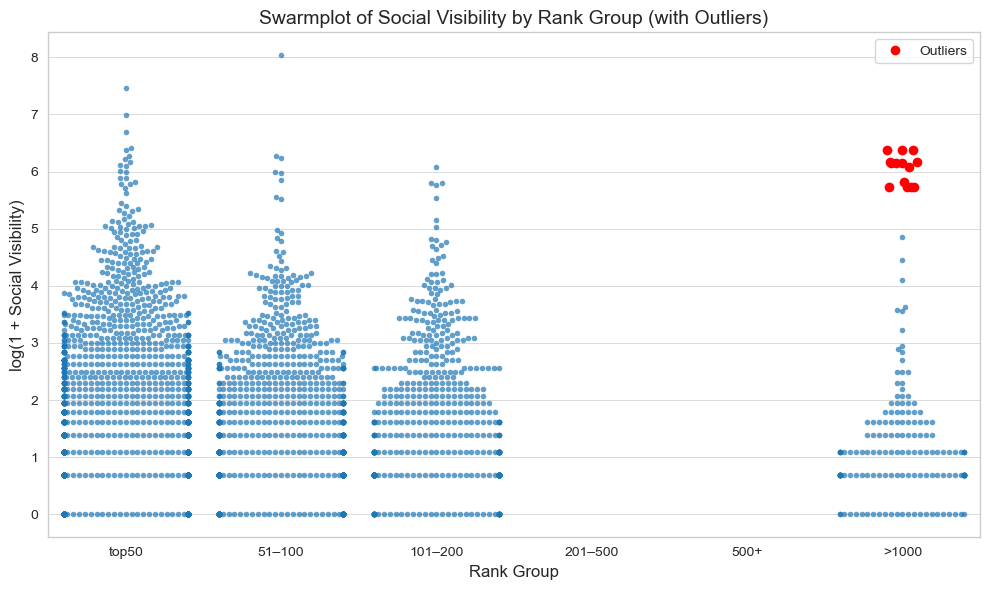

In [756]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


# === Swarmplot of social visibility by rank group, with outliers and clean legend ===

# Sample a subset for the swarmplot
sampled_df = rank_numeric_df.sample(3000, random_state=42)

plt.figure(figsize=(10, 6))

# Base swarmplot
sns.swarmplot(
    data=sampled_df,
    x='rank_group',
    y='stot_log1p',
    order=rank_order,
    size=4,
    alpha=0.7
)

# Outliers in red (without duplicate legend entries)
sns.stripplot(
    data=outlier_df,
    x='rank_group',
    y='stot_log1p',
    order=rank_order,
    color='red',
    size=7,
    jitter=True,
    label=None
)

# Add custom circular dot to legend
outlier_dot = Line2D([0], [0], marker='o', color='w', label='Outliers',
                     markerfacecolor='red', markersize=8)
plt.legend(handles=[outlier_dot])

plt.title("Swarmplot of Social Visibility by Rank Group (with Outliers)")
plt.xlabel("Rank Group")
plt.ylabel("log(1 + Social Visibility)")
plt.tight_layout()

# Save the figure using your automated naming system
save_current_figure()

plt.show()

## 5.2. Gender and Ethnicity Analysis

### Gender

In [609]:
# Recreate the filtered dataset, keeping all columns including 'rank_group'
df_ranked_gender_filtered = df_ranked_only[df_ranked_only['gender_majority'] != 'gender_undetermined_majority'].copy()

# Convert 'rank_group' to a categorical variable with specified order
df_ranked_gender_filtered['rank_group'] = pd.Categorical(
    df_ranked_gender_filtered['rank_group'],
    categories=rank_order,
    ordered=True
)

# Now group by rank_group and gender_label
gender_by_rankgroup_counts = (
    df_ranked_gender_filtered
    .groupby(['rank_group', 'gender_majority'], observed=True)
    .size()
    .unstack(fill_value=0)
)
# Display results
print("=== Gender Majority Counts by Rank Group ===")
gender_by_rankgroup_counts

=== Gender Majority Counts by Rank Group ===


gender_majority,gender_female_majority,gender_male_majority
rank_group,,
top50,56183,119401
51–100,49172,99259
101–200,42276,97596
201–500,66951,130934
500+,38546,76971
>1000,4448,12358


In [611]:
# Calculate proportions (row-wise, by rank group)
gender_by_rankgroup_props = gender_by_rankgroup_counts.div(gender_by_rankgroup_counts.sum(axis=1), axis=0)

print("\n=== Gender Proportions by Rank Group ===")
gender_by_rankgroup_props


=== Gender Proportions by Rank Group ===


gender_majority,gender_female_majority,gender_male_majority
rank_group,,
top50,0.319978,0.680022
51–100,0.331279,0.668721
101–200,0.302248,0.697752
201–500,0.338333,0.661667
500+,0.333682,0.666318
>1000,0.264667,0.735333


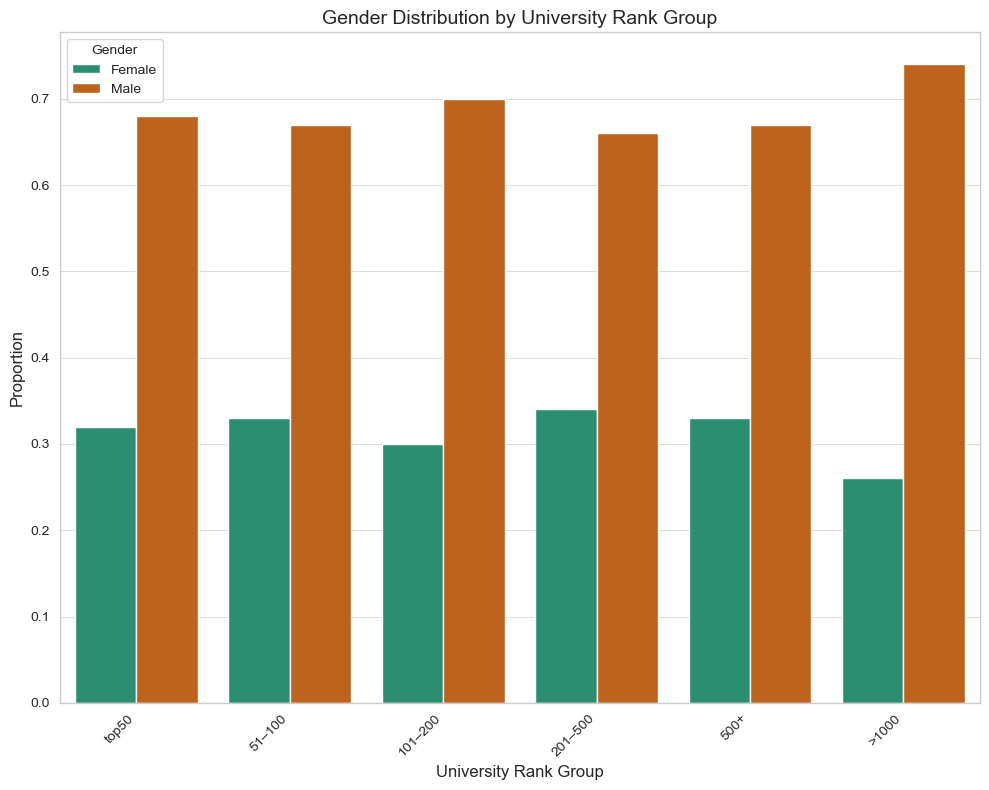

In [766]:
# Melt the proportion DataFrame into long format for plotting
gender_by_rankgroup_props_melted = (
    gender_by_rankgroup_props
    .reset_index()
    .melt(id_vars='rank_group', var_name='Gender', value_name='Proportion')
)

# Clean up labels
gender_by_rankgroup_props_melted['Gender'] = gender_by_rankgroup_props_melted['Gender'].map({
    'gender_male_majority': 'Male',
    'gender_female_majority': 'Female'
})

# Round proportions for nicer y-axis
gender_by_rankgroup_props_melted['Proportion'] = gender_by_rankgroup_props_melted['Proportion'].round(2)

# Plot
plot_barplot(
    data=gender_by_rankgroup_props_melted,
    x_col='rank_group',
    y_col='Proportion',
    hue_col='Gender',
    title='Gender Distribution by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Proportion',
    format_yaxis=False  # prevent integer-only formatting on 0-1 values
)

In [768]:
# === Descriptive statistics for log-transformed social visibility by gender and university rank group ===
gender_rankgroup_stats = (
    df_ranked_gender_filtered
    .groupby(['rank_group', 'gender_majority'], observed=True)['stot_log1p']
    .describe()
    .round(3)
)

print("=== Descriptive Statistics: log(1 + Social Visibility) by Gender and Rank Group ===")
gender_rankgroup_stats

=== Descriptive Statistics: log(1 + Social Visibility) by Gender and Rank Group ===


count   mean    std  min    25%    50%  \
rank_group gender_majority                                                     
top50      gender_female_majority   56183.0  2.007  1.292  0.0  1.099  1.792   
           gender_male_majority    119401.0  1.935  1.365  0.0  0.693  1.792   
51–100     gender_female_majority   49172.0  1.747  1.184  0.0  0.693  1.609   
           gender_male_majority     99259.0  1.677  1.257  0.0  0.693  1.386   
101–200    gender_female_majority   42276.0  1.778  1.222  0.0  0.693  1.609   
           gender_male_majority     97596.0  1.689  1.268  0.0  0.693  1.386   
201–500    gender_female_majority   66951.0  1.664  1.135  0.0  0.693  1.386   
           gender_male_majority    130934.0  1.563  1.180  0.0  0.693  1.386   
500+       gender_female_majority   38546.0  1.379  0.991  0.0  0.693  1.099   
           gender_male_majority     76971.0  1.371  1.062  0.0  0.693  1.099   
>1000      gender_female_majority    4448.0  1.179  0.842  0.0  0.693  1.099   
           gender_male_majority     12358.0  1.159  0.877  0.0  0.693  1.099   

                                     75%    max  
rank_group gender_majority                       
top50      gender_female_majority  2.833  7.909  
           gender_male_majority    2.833  9.992  
51–100     gender_female_majority  2.485  8.454  
           gender_male_majority    2.485  9.390  
101–200    gender_female_majority  2.565  7.779  
           gender_male_majority    2.485  9.992  
201–500    gender_female_majority  2.398  8.011  
           gender_male_majority    2.303  8.606  
500+       gender_female_majority  1.792  7.412  
           gender_male_majority    1.946  8.461  
>1000      gender_female_majority  1.386  5.204  
           gender_male_majority    1.609  6.384

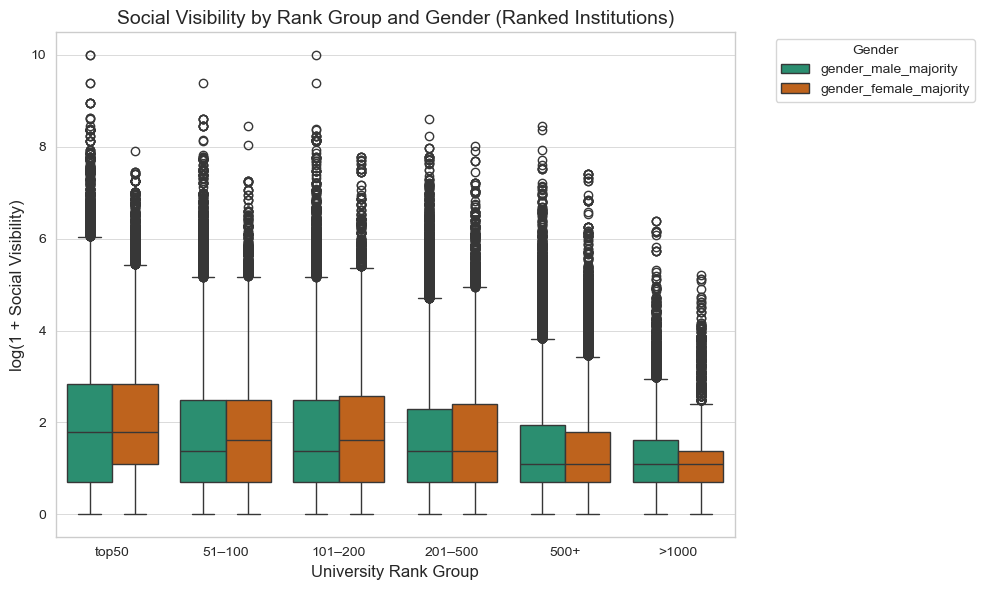

In [770]:
# === Combined boxplot of social visibility by rank group and gender ===
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_ranked_gender_filtered,
    x='rank_group',
    y='stot_log1p',
    hue='gender_majority',
    palette='Dark2'
)

# Titles and labels
plt.title("Social Visibility by Rank Group and Gender (Ranked Institutions)")
plt.xlabel("University Rank Group")
plt.ylabel("log(1 + Social Visibility)")

# Display the legend outside the plot
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [771]:
# === One-way ANOVA: Testing for gender-based differences in social visibility within each university rank group ===
for group in rank_order:
    subdf = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    
    # Create list of stot_log1p values grouped by gender
    groups = [subdf[subdf['gender_majority'] == g]['stot_log1p'].dropna() for g in subdf['gender_majority'].unique()]
    
    # Run ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"=== ANOVA: Social Visibility by Gender Majority (Rank Group: {group}) ===")
    print(f"F-statistic: {f_stat:.4f} | P-value: {p_val:.4g}\n")

=== ANOVA: Social Visibility by Gender Majority (Rank Group: top50) ===
F-statistic: 110.5584 | P-value: 7.526e-26

=== ANOVA: Social Visibility by Gender Majority (Rank Group: 51–100) ===
F-statistic: 105.7196 | P-value: 8.659e-25

=== ANOVA: Social Visibility by Gender Majority (Rank Group: 101–200) ===
F-statistic: 149.4195 | P-value: 2.418e-34

=== ANOVA: Social Visibility by Gender Majority (Rank Group: 201–500) ===
F-statistic: 332.1764 | P-value: 3.712e-74

=== ANOVA: Social Visibility by Gender Majority (Rank Group: 500+) ===
F-statistic: 1.7419 | P-value: 0.1869

=== ANOVA: Social Visibility by Gender Majority (Rank Group: >1000) ===
F-statistic: 1.7593 | P-value: 0.1847



In [772]:
# Kruskal–Wallis test by gender within each rank group
for group in rank_order:
    subdf = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    
    # Create list of stot_log1p values by gender
    groups = [subdf[subdf['gender_majority'] == g]['stot_log1p'].dropna() for g in subdf['gender_majority'].unique()]
    
    # Run Kruskal–Wallis test
    h_stat, p_val = stats.kruskal(*groups)
    print(f"=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: {group}) ===")
    print(f"H-statistic: {h_stat:.4f} | P-value: {p_val:.4g}\n")

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: top50) ===
H-statistic: 201.0826 | P-value: 1.212e-45

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: 51–100) ===
H-statistic: 202.1118 | P-value: 7.228e-46

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: 101–200) ===
H-statistic: 213.6863 | P-value: 2.156e-48

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: 201–500) ===
H-statistic: 506.3439 | P-value: 3.96e-112

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: 500+) ===
H-statistic: 17.6220 | P-value: 2.695e-05

=== Kruskal–Wallis Test: Social Visibility by Gender Majority (Rank Group: >1000) ===
H-statistic: 2.7009 | P-value: 0.1003



In [773]:
# Initialize list to collect the results
anova_kruskal_results = []

# Loop through each rank group
for group in rank_order:
    subset = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    
    # Extract the groups
    groups = [subset[subset['gender_majority'] == gender]['stot_log1p'].dropna() for gender in ['gender_female_majority', 'gender_male_majority']]
    
    # Perform ANOVA
    f_stat, f_pval = stats.f_oneway(*groups)
    
    # Perform Kruskal–Wallis test
    h_stat, h_pval = stats.kruskal(*groups)
    
    # Store the results
    anova_kruskal_results.append({
        'Rank Group': group,
        'ANOVA F-statistic': round(f_stat, 4),
        'ANOVA p-value': round(f_pval, 4),
        'Kruskal H-statistic': round(h_stat, 4),
        'Kruskal p-value': round(h_pval, 4)
    })

# Create DataFrame from the results
anova_kruskal_df = pd.DataFrame(anova_kruskal_results)

# Display the summary table
print("=== ANOVA and Kruskal–Wallis Test Results by Rank Group ===")
display(anova_kruskal_df)

=== ANOVA and Kruskal–Wallis Test Results by Rank Group ===


,Rank Group,ANOVA F-statistic,ANOVA p-value,Kruskal H-statistic,Kruskal p-value
0,top50,110.5584,0.0000,201.0826,0.0000
1,51–100,105.7196,0.0000,202.1118,0.0000
2,101–200,149.4195,0.0000,213.6863,0.0000
3,201–500,332.1764,0.0000,506.3439,0.0000
4,500+,1.7419,0.1869,17.6220,0.0000
5,>1000,1.7593,0.1847,2.7009,0.1003


In [775]:
# Dunn's post-hoc test (overall gender comparison)
print("=== Dunn Test Results by Rank Group ===")
for group in rank_order:
    subdf = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    if subdf.empty:
        continue

    dunn_result = sp.posthoc_dunn(
        subdf,
        val_col='stot_log1p',
        group_col='gender_majority',
        p_adjust='bonferroni'
    )

    print(f"=== Dunn's Test by Gender (Rank Group: {group}) ===")
    print(dunn_result.round(5))
    print("\n")

=== Dunn Test Results by Rank Group ===
=== Dunn's Test by Gender (Rank Group: top50) ===
                        gender_female_majority  gender_male_majority
gender_female_majority                     1.0                   0.0
gender_male_majority                       0.0                   1.0


=== Dunn's Test by Gender (Rank Group: 51–100) ===
                        gender_female_majority  gender_male_majority
gender_female_majority                     1.0                   0.0
gender_male_majority                       0.0                   1.0


=== Dunn's Test by Gender (Rank Group: 101–200) ===
                        gender_female_majority  gender_male_majority
gender_female_majority                     1.0                   0.0
gender_male_majority                       0.0                   1.0


=== Dunn's Test by Gender (Rank Group: 201–500) ===
                        gender_female_majority  gender_male_majority
gender_female_majority                     1.0             

In [776]:
for group in rank_order:
    # Filter the data for the current rank group
    subdf = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    
    if subdf.empty:
        continue  # Skip if no data for this group

    # Fit the OLS model: stot_log1p ~ gender_label
    model = smf.ols('stot_log1p ~ C(gender_majority)', data=subdf).fit()
    
    # Print a summary header
    print(f"=== Linear Regression (Gender Effect) for Rank Group: {group} ===")
    print(model.summary())
    print("\n")

=== Linear Regression (Gender Effect) for Rank Group: top50 ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 14 May 2025   Prob (F-statistic):           7.53e-26
Time:                        20:24:56   Log-Likelihood:            -3.0077e+05
No. Observations:              175584   AIC:                         6.016e+05
Df Residuals:                  175582   BIC:                         6.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [777]:
# Create a list to collect results
regression_results = []

# Loop over each rank group
for group in rank_order:
    subdf = df_ranked_gender_filtered[df_ranked_gender_filtered['rank_group'] == group]
    if subdf.empty:
        continue

    # Fit the OLS model
    model = smf.ols('stot_log1p ~ C(gender_majority)', data=subdf).fit()

    # Extract the needed values
    coef_male = model.params.get('C(gender_majority)[T.gender_male_majority]', float('nan'))
    pval_male = model.pvalues.get('C(gender_majority)[T.gender_male_majority]', float('nan'))
    r_squared = model.rsquared

    # Save the results
    regression_results.append({
        'Rank Group': group,
        'Coef (Male)': coef_male,
        'P-Value (Male)': pval_male,
        'R-squared': r_squared
    })

# Create a DataFrame from the results
regression_summary = pd.DataFrame(regression_results)

# Round values nicely
regression_summary = regression_summary.round({
    'Coef (Male)': 4,
    'P-Value (Male)': 4,
    'R-squared': 4
})

# Display
regression_summary

,Rank Group,Coef (Male),P-Value (Male),R-squared
0,top50,-0.0722,0.0000,0.0006
1,51–100,-0.0699,0.0000,0.0007
2,101–200,-0.0893,0.0000,0.0011
3,201–500,-0.1009,0.0000,0.0017
4,500+,-0.0086,0.1869,0.0000
5,>1000,-0.0201,0.1847,0.0001


### Ethnicity

In [779]:
# === Count ethnicity_majority frequencies within each rank group ===

# Group by rank_group and ethnicity_majority, then count
ethnicity_by_rankgroup_counts = (
    df_ranked_only
    .groupby(['rank_group', 'ethnicity_majority'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Display the table
print("=== Ethnicity categories and their frequencies by Rank Group ===")
ethnicity_by_rankgroup_counts

=== Ethnicity categories and their frequencies by Rank Group ===


ethnicity_majority,ratio_british_origin,ratio_chinese,ratio_eastern_European,ratio_hispanic,ratio_indian,ratio_middle_east,ratio_non_chinese_east_Asian,ratio_other,ratio_western_northern
rank_group,,,,,,,,,
top50,125702,13564,1771,13543,5297,4647,3220,327,34491
51–100,75779,8560,2421,19291,3273,3978,2668,298,54886
101–200,71476,10575,2590,12658,2928,3630,762,364,55732
201–500,99597,12510,2655,40666,4884,11111,7119,512,48745
500+,30759,21519,8152,31527,4846,18837,6999,835,10234
>1000,1298,817,2793,3784,654,4610,4107,151,913


In [780]:
# === Compute ethnicity proportions (%) within each rank group ===

# Group by rank_group and ethnicity_majority, then count
ethnicity_by_rankgroup_counts = (
    df_ranked_only
    .groupby(['rank_group', 'ethnicity_majority'], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Calculate proportions within each rank group
ethnicity_by_rankgroup_props = ethnicity_by_rankgroup_counts.div(ethnicity_by_rankgroup_counts.sum(axis=1), axis=0) * 100

# Round the results for easier reading
ethnicity_by_rankgroup_props = ethnicity_by_rankgroup_props.round(2)

# Display the proportion table
print("=== Ethnicity Majority Group Proportions (%) by Rank Group ===")
ethnicity_by_rankgroup_props

=== Ethnicity Majority Group Proportions (%) by Rank Group ===


ethnicity_majority,ratio_british_origin,ratio_chinese,ratio_eastern_European,ratio_hispanic,ratio_indian,ratio_middle_east,ratio_non_chinese_east_Asian,ratio_other,ratio_western_northern
rank_group,,,,,,,,,
top50,62.06,6.70,0.87,6.69,2.62,2.29,1.59,0.16,17.03
51–100,44.28,5.00,1.41,11.27,1.91,2.32,1.56,0.17,32.07
101–200,44.47,6.58,1.61,7.88,1.82,2.26,0.47,0.23,34.68
201–500,43.72,5.49,1.17,17.85,2.14,4.88,3.13,0.22,21.40
500+,23.00,16.09,6.10,23.58,3.62,14.09,5.23,0.62,7.65
>1000,6.79,4.27,14.60,19.78,3.42,24.10,21.47,0.79,4.77


In [869]:
# === Descriptive statistics for social visibility (stot_log1p) grouped by ethnicity and rank group ===

# Group by rank_group and ethnicity_majority, and compute count, mean, std
ethnicity_visibility_ranked = (
    df_ranked_only
    .groupby(['rank_group', 'ethnicity_majority'], observed=True)['stot_log1p']
    .agg(['count', 'mean', 'std'])
    .round(3)
)

# Display the result sorted by mean visibility within each rank group
print("=== Social Visibility (log) by Ethnicity and Rank Group ===")
print (ethnicity_visibility_ranked)

=== Social Visibility (log) by Ethnicity and Rank Group ===
                                          count   mean    std
rank_group ethnicity_majority                                
top50      ratio_british_origin          125702  2.089  1.366
           ratio_chinese                  13564  1.467  1.164
           ratio_eastern_European          1771  1.612  1.268
           ratio_hispanic                 13543  1.779  1.277
           ratio_indian                    5297  1.823  1.329
           ratio_middle_east               4647  1.609  1.270
           ratio_non_chinese_east_Asian    3220  1.674  1.113
           ratio_other                      327  1.606  1.152
           ratio_western_northern         34491  1.860  1.289
51–100     ratio_british_origin           75779  1.901  1.304
           ratio_chinese                   8560  1.150  1.032
           ratio_eastern_European          2421  1.382  1.006
           ratio_hispanic                 19291  1.480  1.079
          

In [783]:
# === ANOVA: Social Visibility by Ethnicity within each Rank Group ===
# Loop through each rank group
for group in rank_order:
    # Subset the ranked data for this group
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    
    # Skip if no data
    if subdf.empty:
        continue

    # Build a list of stot_log1p arrays, one per ethnicity category in this group
    eth_groups = [
        subdf[subdf['ethnicity_majority'] == cat]['stot_log1p'].dropna()
        for cat in subdf['ethnicity_majority'].unique()
    ]
    
    # Run one‐way ANOVA
    f_stat, p_val = stats.f_oneway(*eth_groups)
    
    # Print the results for this rank group
    print(f"=== ANOVA: Social Visibility by Ethnicity (Rank Group: {group}) ===")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value:     {p_val:.4g}\n")

=== ANOVA: Social Visibility by Ethnicity (Rank Group: top50) ===
F-statistic: 522.8229
P-value:     0

=== ANOVA: Social Visibility by Ethnicity (Rank Group: 51–100) ===
F-statistic: 757.2957
P-value:     0

=== ANOVA: Social Visibility by Ethnicity (Rank Group: 101–200) ===
F-statistic: 988.2035
P-value:     0

=== ANOVA: Social Visibility by Ethnicity (Rank Group: 201–500) ===
F-statistic: 1344.1804
P-value:     0

=== ANOVA: Social Visibility by Ethnicity (Rank Group: 500+) ===
F-statistic: 1679.9972
P-value:     0

=== ANOVA: Social Visibility by Ethnicity (Rank Group: >1000) ===
F-statistic: 167.3944
P-value:     3.565e-274



In [785]:
# === Kruskal–Wallis Test: Social Visibility by Ethnicity within each Rank Group ===
# Loop over each rank group
for group in rank_order:
    # Subset the data to the current rank group
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    if subdf.empty:
        continue  # skip groups with no data

    # Build a list of arrays of stot_log1p, one for each ethnicity_majority in this group
    eth_groups = [
        subdf[subdf['ethnicity_majority'] == eth]['stot_log1p'].dropna()
        for eth in subdf['ethnicity_majority'].unique()
    ]

    # Run the Kruskal–Wallis test
    h_stat, p_val = stats.kruskal(*eth_groups)

    # Print the results
    print(f"=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: {group}) ===")
    print(f"H-statistic: {h_stat:.4f}")
    print(f"P-value:     {p_val:.4g}\n")

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: top50) ===
H-statistic: 4401.8262
P-value:     0

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: 51–100) ===
H-statistic: 6126.6416
P-value:     0

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: 101–200) ===
H-statistic: 8048.5126
P-value:     0

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: 201–500) ===
H-statistic: 10561.5010
P-value:     0

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: 500+) ===
H-statistic: 10809.2063
P-value:     0

=== Kruskal–Wallis: Social Visibility by Ethnicity (Rank Group: >1000) ===
H-statistic: 987.4621
P-value:     7.591e-208



In [786]:
# === 3.7 Combined ANOVA & Kruskal–Wallis Test Results for Ethnicity by Rank Group ===
# Initialize list to collect the results
anova_kruskal_eth_results = []

# Loop through each rank group
for group in rank_order:
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    if subdf.empty:
        continue  # skip if no data in this group

    # Build a list of stot_log1p arrays, one per ethnicity category
    eth_categories = subdf['ethnicity_majority'].unique()
    eth_groups = [
        subdf[subdf['ethnicity_majority'] == cat]['stot_log1p'].dropna()
        for cat in eth_categories
    ]
    
    # Perform one‐way ANOVA
    f_stat, f_pval = stats.f_oneway(*eth_groups)
    
    # Perform Kruskal–Wallis test
    h_stat, h_pval = stats.kruskal(*eth_groups)
    
    # Store the results
    anova_kruskal_eth_results.append({
        'Rank Group': group,
        'ANOVA F-statistic': round(f_stat, 4),
        'ANOVA p-value':     round(f_pval, 4),
        'Kruskal H-statistic': round(h_stat, 4),
        'Kruskal p-value':     round(h_pval, 4)
    })

# Create a DataFrame from the results
anova_kruskal_eth_df = pd.DataFrame(anova_kruskal_eth_results)

# Display the summary table
print("=== ANOVA and Kruskal–Wallis Test Results Social Visibility by Ethnicity by Rank Group (Ethnicity) ===")
display(anova_kruskal_eth_df)

=== ANOVA and Kruskal–Wallis Test Results Social Visibility by Ethnicity by Rank Group (Ethnicity) ===


,Rank Group,ANOVA F-statistic,ANOVA p-value,Kruskal H-statistic,Kruskal p-value
0,top50,522.8229,0.0,4401.8262,0.0
1,51–100,757.2957,0.0,6126.6416,0.0
2,101–200,988.2035,0.0,8048.5126,0.0
3,201–500,1344.1804,0.0,10561.5010,0.0
4,500+,1679.9972,0.0,10809.2063,0.0
5,>1000,167.3944,0.0,987.4621,0.0


In [873]:
# === Dunn's post-hoc test by Ethnicity within each Rank Group ===
# Loop through each rank group
for group in rank_order:
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    if subdf.empty:
        continue

    # Perform Dunn's test on stot_log1p across ethnicity_majority categories
    dunn_result = sp.posthoc_dunn(
        subdf,
        val_col='stot_log1p',
        group_col='ethnicity_majority',
        p_adjust='bonferroni'
    )

    # Print the results for this rank group
    print(f"=== Dunn's Test by Ethnicity (Rank Group: {group}) ===")
    print(dunn_result.round(5))
    print("\n")

=== Dunn's Test by Ethnicity (Rank Group: top50) ===
                              ratio_british_origin  ratio_chinese  \
ratio_british_origin                           1.0        0.00000   
ratio_chinese                                  0.0        1.00000   
ratio_eastern_European                         0.0        0.00016   
ratio_hispanic                                 0.0        0.00000   
ratio_indian                                   0.0        0.00000   
ratio_middle_east                              0.0        0.00000   
ratio_non_chinese_east_Asian                   0.0        0.00000   
ratio_other                                    0.0        0.40807   
ratio_western_northern                         0.0        0.00000   

                              ratio_eastern_European  ratio_hispanic  \
ratio_british_origin                         0.00000         0.00000   
ratio_chinese                                0.00016         0.00000   
ratio_eastern_European                  

In [788]:
# === Linear Regression: stot_log1p ~ ethnicity_majority by Rank Group ===

# Loop through each rank group in the desired order
for group in rank_order:
    # Filter the data for the current rank group
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    
    # Skip if there is no data in this group
    if subdf.empty:
        continue

    # Fit the OLS model: stot_log1p ~ ethnicity_majority
    model_eth = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=subdf).fit()
    
    # Print a header and the summary
    print(f"=== Linear Regression (Ethnicity Effect) for Rank Group: {group} ===")
    print(model_eth.summary())
    print("\n")

=== Linear Regression (Ethnicity Effect) for Rank Group: top50 ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     522.8
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        20:25:38   Log-Likelihood:            -3.4462e+05
No. Observations:              202562   AIC:                         6.893e+05
Df Residuals:                  202553   BIC:                         6.893e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [789]:
# === 3.9 Linear Regression Summary by Ethnicity and Rank Group ===
# List to collect results
ethnicity_regression_results = []

# Loop over each rank group
for group in rank_order:
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    if subdf.empty:
        continue

    # Fit the OLS model for ethnicity effect
    model = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=subdf).fit()

    # Prepare result dict with R-squared
    result = {'Rank Group': group, 'R-squared': model.rsquared}

    # Extract coefficients and p-values for each ethnicity category (excluding intercept)
    for var, coef in model.params.items():
        if var == 'Intercept':
            continue
        pval = model.pvalues[var]
        # Clean variable name for column header
        var_name = var.replace('C(ethnicity_majority)[T.', '').rstrip(']')
        result[f'Coef ({var_name})']    = round(coef, 4)
        result[f'P-Value ({var_name})'] = round(pval, 4)

    ethnicity_regression_results.append(result)

# Convert to DataFrame and order columns
ethnicity_regression_summary = pd.DataFrame(ethnicity_regression_results)

# Display summary
print("=== Ethnicity Regression Summary by Rank Group ===")
display(ethnicity_regression_summary)

=== Ethnicity Regression Summary by Rank Group ===


,Rank Group,R-squared,Coef (ratio_chinese),P-Value (ratio_chinese),Coef (ratio_eastern_European),P-Value (ratio_eastern_European),Coef (ratio_hispanic),P-Value (ratio_hispanic),Coef (ratio_indian),P-Value (ratio_indian),Coef (ratio_middle_east),P-Value (ratio_middle_east),Coef (ratio_non_chinese_east_Asian),P-Value (ratio_non_chinese_east_Asian),Coef (ratio_other),P-Value (ratio_other),Coef (ratio_western_northern),P-Value (ratio_western_northern)
0,top50,0.020232,-0.6219,0.0,-0.4763,0.0,-0.3099,0.0,-0.2659,0.0,-0.4791,0.0,-0.4145,0.0,-0.4829,0.0,-0.2284,0.0
1,51–100,0.034189,-0.7512,0.0,-0.5188,0.0,-0.4209,0.0,-0.5631,0.0,-0.7907,0.0,-0.5011,0.0,-0.4508,0.0,-0.2141,0.0
2,101–200,0.046887,-0.9236,0.0,-0.6786,0.0,-0.3480,0.0,-0.5469,0.0,-0.8120,0.0,-0.6384,0.0,-0.4163,0.0,-0.3343,0.0
3,201–500,0.045080,-0.8246,0.0,-0.4819,0.0,-0.4350,0.0,-0.6249,0.0,-0.5377,0.0,-0.5119,0.0,-0.4644,0.0,-0.2328,0.0
4,500+,0.091342,-0.8633,0.0,-0.7044,0.0,-0.4864,0.0,-0.8093,0.0,-0.7805,0.0,-0.5623,0.0,-0.6845,0.0,-0.3657,0.0
5,>1000,0.065461,-0.9445,0.0,-0.8356,0.0,-0.4901,0.0,-0.9012,0.0,-0.7305,0.0,-0.5371,0.0,-0.6483,0.0,-0.4556,0.0


## 5.3. Platform usage across publications (Ranked Institutions - Ranking group)

In [791]:
# === Descriptive statistics for Altmetric platforms by Rank Group ===

# List to collect all stats
platform_stats_by_rank = []

# Loop through each rank group
for group in rank_order:
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    total_n = len(subdf)
    if total_n == 0:
        continue

    # Compute stats for each platform column
    for platform in altmetric_cols:
        series = subdf[platform]
        agg_stats = series.agg(['count', 'mean', 'std', 'median', 'max'])
        pct_mentioned = (series > 0).sum() / total_n * 100

        platform_stats_by_rank.append({
            'Rank Group':      group,
            'Platform':        platform,
            'count':           agg_stats['count'],
            'mean':            agg_stats['mean'],
            'std':             agg_stats['std'],
            '50%':             agg_stats['median'],
            'max':             agg_stats['max'],
            'pct_mentioned':   pct_mentioned
        })

# Create DataFrame
platform_stats_rg_df = pd.DataFrame(platform_stats_by_rank)

# Round numeric columns for clarity
platform_stats_rg_df = platform_stats_rg_df.round({
    'mean': 2,
    'std': 2,
    '50%': 0,
    'max': 0,
    'pct_mentioned': 2
})

# Set multi‐index for easier pivoting or display
platform_stats_rg_df = platform_stats_rg_df.set_index(['Rank Group', 'Platform'])

# Display the table
print("=== Platform Descriptive Statistics by Rank Group ===")
display(platform_stats_rg_df)

=== Platform Descriptive Statistics by Rank Group ===


count  mean    std  50%    max  pct_mentioned
Rank Group Platform                                                      
top50      blogs         202562.0  0.17   0.82  0.0   57.0           9.57
           book_reviews  202562.0  0.00   0.00  0.0    1.0           0.00
           f1000         202562.0  0.01   0.14  0.0    9.0           1.20
           facebook      202562.0  0.33   1.17  0.0  127.0          18.98
           googleplus    202562.0  0.02   0.42  0.0   84.0           1.15
...                           ...   ...    ...  ...    ...            ...
>1000      syllabi        19127.0  0.00   0.00  0.0    0.0           0.00
           twitter        19127.0  4.43  15.73  1.0  587.0          83.31
           video          19127.0  0.00   0.08  0.0    5.0           0.32
           weibo          19127.0  0.00   0.00  0.0    0.0           0.00
           wikipedia      19127.0  0.01   0.15  0.0   10.0           0.80

[114 rows x 6 columns]

In [286]:
# Reset the index so we can filter by “Platform”
stats = platform_stats_rg_df.reset_index().rename(
    columns={'level_0': 'Rank Group', 'level_1': 'Platform'}
)

# Ensure your rank groups are in the desired order
rank_order = ['top50', '51–100', '101–200', '201–500', '500+', '>1000']

for rg in rank_order:
    # select only this rank group & only key platforms
    sub = (
        stats
        .loc[
            (stats['Rank Group'] == rg) &
            (stats['Platform'].isin(key_platforms_ranked))
        ]
        .set_index('Platform')
        [['count', 'mean', 'std', '50%', 'max', 'pct_mentioned']]
    )
    if sub.empty:
        continue
    
    print(f"\n=== Rank Group: {rg} (Key Platforms) ===")
    display(sub)


=== Rank Group: top50 (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,202562.0,0.17,0.82,0.0,57.0,9.57
facebook,202562.0,0.33,1.17,0.0,127.0,18.98
news,202562.0,1.15,7.82,0.0,515.0,12.04
reddit,202562.0,0.03,0.31,0.0,22.0,2.07
twitter,202562.0,20.33,121.33,4.0,21620.0,87.27



=== Rank Group: 51–100 (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,171154.0,0.11,0.64,0.0,79.0,7.41
facebook,171154.0,0.25,0.91,0.0,47.0,15.31
news,171154.0,0.65,5.62,0.0,407.0,8.68
reddit,171154.0,0.02,0.33,0.0,35.0,1.42
twitter,171154.0,13.42,71.23,3.0,11887.0,84.27



=== Rank Group: 101–200 (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,160715.0,0.12,0.65,0.0,40.0,7.58
facebook,160715.0,0.25,0.99,0.0,127.0,14.95
news,160715.0,0.70,5.96,0.0,335.0,8.44
reddit,160715.0,0.02,0.25,0.0,22.0,1.46
twitter,160715.0,13.98,90.16,3.0,21620.0,83.73



=== Rank Group: 201–500 (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,227799.0,0.10,0.54,0.0,28.0,6.68
facebook,227799.0,0.23,0.84,0.0,50.0,14.33
news,227799.0,0.54,5.04,0.0,356.0,7.98
reddit,227799.0,0.02,0.24,0.0,21.0,1.20
twitter,227799.0,10.74,46.97,3.0,5105.0,84.24



=== Rank Group: 500+ (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,133708.0,0.07,0.39,0.0,26.0,4.84
facebook,133708.0,0.17,0.67,0.0,42.0,11.63
news,133708.0,0.25,2.79,0.0,335.0,5.38
reddit,133708.0,0.01,0.17,0.0,18.0,0.90
twitter,133708.0,7.64,38.16,2.0,4448.0,84.14



=== Rank Group: >1000 (Key Platforms) ===


,count,mean,std,50%,max,pct_mentioned
Platform,,,,,,
blogs,19127.0,0.04,0.22,0.0,5.0,3.04
facebook,19127.0,0.14,0.52,0.0,11.0,9.71
news,19127.0,0.13,1.43,0.0,76.0,4.08
reddit,19127.0,0.01,0.14,0.0,10.0,0.71
twitter,19127.0,4.43,15.73,1.0,587.0,83.31


In [792]:
# === Platform mention counts (0 vs. 1) by University Rank Group ===
# Note: 0 = Not mentioned, 1 = Mentioned

# List of binary platform columns
binary_cols = [f"{p}_binary" for p in key_platforms_ranked]

# Melt to long format
melted = df_ranked_only.melt(
    id_vars='rank_group',
    value_vars=binary_cols,
    var_name='Platform',
    value_name='Mentioned'
)

# Clean up platform names
melted['Platform'] = (
    melted['Platform']
      .str.replace('_binary', '', regex=False)
      .str.capitalize()
)

# Compute counts of 0 vs. 1 per rank_group and platform
mention_counts = (
    melted
      .groupby(['rank_group', 'Platform', 'Mentioned'])
      .size()
      .unstack(fill_value=0)
      .rename(columns={0: 'Not mentioned', 
                       1: 'Mentioned'})
)

print("=== Platform Mention Counts by University Rank Group ===")
display(mention_counts)

C:\Users\Diak\AppData\Local\Temp\ipykernel_7904\1651576853.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['rank_group', 'Platform', 'Mentioned'])


=== Platform Mention Counts by University Rank Group ===


Mentioned            Not mentioned  Mentioned
rank_group Platform                          
top50      Blogs            183170      19392
           Facebook         164125      38437
           News             178166      24396
           Reddit           198373       4189
           Twitter           25780     176782
51–100     Blogs            158478      12676
           Facebook         144958      26196
           News             156296      14858
           Reddit           168723       2431
           Twitter           26915     144239
101–200    Blogs            148532      12183
           Facebook         136682      24033
           News             147145      13570
           Reddit           158367       2348
           Twitter           26145     134570
201–500    Blogs            212587      15212
           Facebook         195150      32649
           News             209622      18177
           Reddit           225058       2741
           Twitter           35903     191896
500+       Blogs            127242       6466
           Facebook         118153      15555
           News             126516       7192
           Reddit           132504       1204
           Twitter           21212     112496
>1000      Blogs             18545        582
           Facebook          17270       1857
           News              18347        780
           Reddit            18992        135
           Twitter            3193      15934

In [806]:
# === Platform mention rates (%) by University Rank Group (no plot) ===

# List of binary columns for key platforms
binary_cols = [f"{p}_binary" for p in key_platforms_ranked]

# Compute percentage mentioned per rank_group
mention_rates = (
    df_ranked_only
      .groupby('rank_group', observed=True)[binary_cols]
      .mean()            # fraction of 1’s
      .mul(100)          # → percentage
      .round(2)          # two decimal places
)

# Rename columns for readability
mention_rates = mention_rates.rename(
    columns={f'{p}_binary': p.capitalize() for p in key_platforms_ranked}
)

print("=== Platform Mention Rates (%) by University Rank Group ===")
display(mention_rates)

=== Platform Mention Rates (%) by University Rank Group ===


,Blogs,Facebook,News,Reddit,Twitter
rank_group,,,,,
top50,9.57,18.98,12.04,2.07,87.27
51–100,7.41,15.31,8.68,1.42,84.27
101–200,7.58,14.95,8.44,1.46,83.73
201–500,6.68,14.33,7.98,1.20,84.24
500+,4.84,11.63,5.38,0.90,84.14
>1000,3.04,9.71,4.08,0.71,83.31


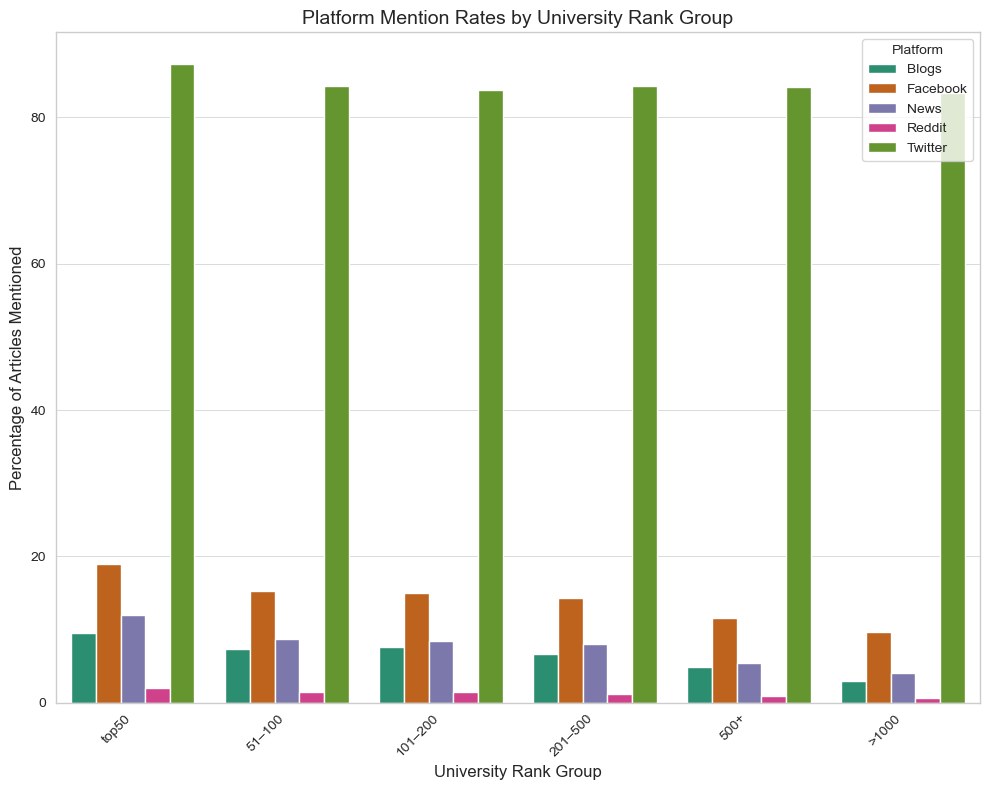

In [808]:
# === 7.1 Platform mention rates (%) by Rank Group and Platform (key platforms) ===

# Prepare a list to collect results
usage_by_group = []

# Loop over each rank group in the desired order
for group in rank_order:
    subdf = df_ranked_only[df_ranked_only['rank_group'] == group]
    if subdf.empty:
        continue
    n = len(subdf)
    # For each key platform, compute pct mentioned in this group
    for platform in key_platforms_ranked:
        pct = subdf[f'{platform}_binary'].mean() * 100
        usage_by_group.append((group, platform.capitalize(), round(pct, 2)))

# Convert to DataFrame
usage_df_by_group = pd.DataFrame(
    usage_by_group,
    columns=['Rank Group', 'Platform', 'Mentioned (%)']
)

# Optionally pivot for wide format
usage_pivot = usage_df_by_group.pivot(
    index='Rank Group', columns='Platform', values='Mentioned (%)'
)

plot_barplot(
    data=usage_df_by_group,
    x_col='Rank Group',
    y_col='Mentioned (%)',
    hue_col='Platform',
    title='Platform Mention Rates by University Rank Group',
    xlabel='University Rank Group',
    ylabel='Percentage of Articles Mentioned'
)

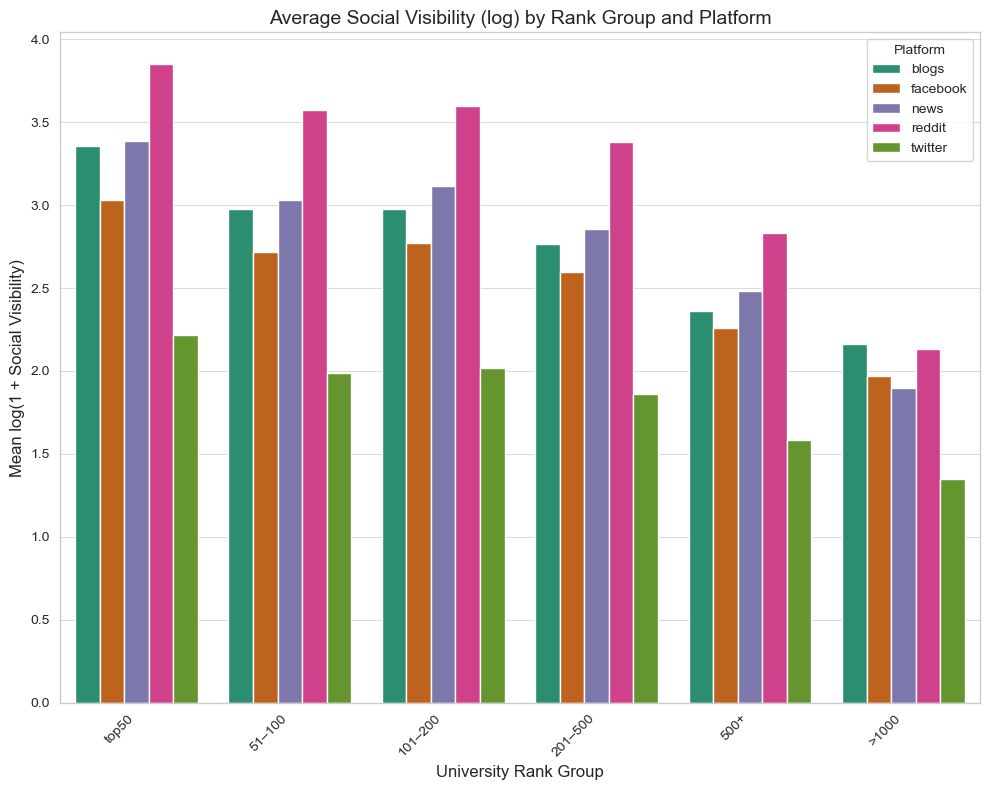

In [810]:
# === Average Social Visibility by Rank Group and Platform ===
# Computing average log-transformed social visibility for mentioned articles across university rank groups and platforms

# List of key platforms to include
key_platforms = ['twitter', 'facebook', 'news', 'blogs', 'reddit']

# Compute mean log-visibility for each (rank_group, platform)
vis_by_rank_platform = (
    df_ranked_only
    .loc[:, ['rank_group', 'stot_log1p'] + key_platforms]
    .melt(id_vars=['rank_group', 'stot_log1p'], 
          value_vars=key_platforms,
          var_name='Platform',
          value_name='Mentioned')
    # keep only rows where the platform is actually mentioned (binary > 0)
    .query('Mentioned > 0')
    .groupby(['rank_group', 'Platform'], observed=True)['stot_log1p']
    .mean()
    .reset_index()
    .rename(columns={'stot_log1p': 'Mean_log_Visibility'})
    # ensure the rank groups appear in the desired order
    .assign(rank_group=lambda d: pd.Categorical(
        d['rank_group'],
        categories=['top50','51–100','101–200','201–500','500+','>1000'],
        ordered=True
    ))
    .sort_values(['rank_group','Platform'])
)

# Plot with our custom barplot (distinct colors per platform)
plot_barplot(
    data=vis_by_rank_platform,
    x_col='rank_group',
    y_col='Mean_log_Visibility',
    hue_col='Platform',
    title='Average Social Visibility (log) by Rank Group and Platform',
    xlabel='University Rank Group',
    ylabel='Mean log(1 + Social Visibility)',
    palette='Dark2',
    rot=45,
    format_yaxis=False
)

# 6. Inequalities in science dissemination

## 6.1. Comparison of descriptive statistics:

In [879]:
# === Grouped Descriptive Statistics ===
group_columns = ['gender_majority', 'ethnicity_majority', 'rank_group']

descriptive_tables = {}

for group_col in group_columns:
    if group_col == 'gender_majority':
        subdf = df_ranked_only[df_ranked_only['gender_majority'] != 'gender_undetermined_majority']
    else:
        subdf = df_ranked_only

    desc_stats = (
        subdf
        .groupby(group_col, observed=True) 
        .agg(
            Mean_Social_Visibility=('stot_log1p', 'mean'),
            Std_Social_Visibility=('stot_log1p', 'std'),
            Mean_Citation=('cit_log', 'mean'),
            Std_Citation=('cit_log', 'std')
        )
        .round(3)  # Round for neatness
        .sort_values('Mean_Social_Visibility', ascending=False) 
    )
    
    descriptive_tables[group_col] = desc_stats

# Each result individually:
print("=== Descriptive Statistics by Gender (Social Visibility and Citation) ===")
display(descriptive_tables['gender_majority'])

print("\n=== Descriptive Statistics by Ethnicity (Social Visibility and Citation) ===")
display(descriptive_tables['ethnicity_majority'])

print("\n=== Descriptive Statistics by Rank Group (Social Visibility and Citation) ===")
display(descriptive_tables['rank_group'])

=== Descriptive Statistics by Gender (Social Visibility and Citation) ===


,Mean_Social_Visibility,Std_Social_Visibility,Mean_Citation,Std_Citation
gender_majority,,,,
gender_female_majority,1.722,1.188,1.374,0.838
gender_male_majority,1.653,1.247,1.517,0.899



=== Descriptive Statistics by Ethnicity (Social Visibility and Citation) ===


,Mean_Social_Visibility,Std_Social_Visibility,Mean_Citation,Std_Citation
ethnicity_majority,,,,
ratio_british_origin,1.950,1.310,1.426,0.868
ratio_western_northern,1.668,1.190,1.497,0.871
ratio_hispanic,1.467,1.069,1.464,0.863
ratio_indian,1.360,1.136,1.499,0.895
ratio_other,1.357,0.946,1.159,0.812
ratio_non_chinese_east_Asian,1.355,0.926,1.323,0.859
ratio_eastern_European,1.235,0.974,1.402,0.867
ratio_middle_east,1.189,0.994,1.454,0.908
ratio_chinese,1.118,0.946,1.701,0.965



=== Descriptive Statistics by Rank Group (Social Visibility and Citation) ===


,Mean_Social_Visibility,Std_Social_Visibility,Mean_Citation,Std_Citation
rank_group,,,,
top50,1.958,1.340,1.564,0.921
101–200,1.712,1.251,1.476,0.873
51–100,1.702,1.234,1.467,0.869
201–500,1.598,1.166,1.425,0.860
500+,1.367,1.034,1.406,0.872
>1000,1.160,0.865,1.246,0.838


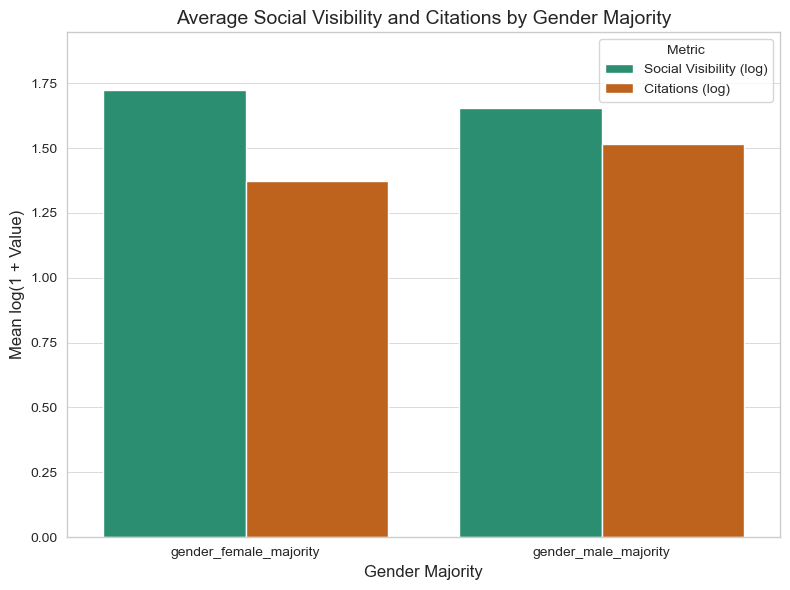

In [816]:
# === Combined Barplot for Social Visibility and Citations by Gender (excluding unknown) ===

# Filter out 'unknown' gender
gender_filtered_df = descriptive_tables['gender_majority'].drop(index='gender_undetermined_majority', errors='ignore')

# Prepare data
combined_df = gender_filtered_df[['Mean_Social_Visibility', 'Mean_Citation']].reset_index()

# Melt into long format
combined_long = combined_df.melt(id_vars='gender_majority',
                                 value_vars=['Mean_Social_Visibility', 'Mean_Citation'],
                                 var_name='Metric',
                                 value_name='Mean_Value')

# Rename metrics
combined_long['Metric'] = combined_long['Metric'].map({
    'Mean_Social_Visibility': 'Social Visibility (log)',
    'Mean_Citation': 'Citations (log)'
})

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=combined_long,
    x='gender_majority',
    y='Mean_Value',
    hue='Metric',
    palette='Dark2'
)

plt.title('Average Social Visibility and Citations by Gender Majority')
plt.xlabel('Gender Majority')
plt.ylabel('Mean log(1 + Value)')
plt.xticks(rotation=0)
ymax = combined_long['Mean_Value'].max() * 1.13
ax.set_ylim(0, ymax)
ax.legend(title="Metric",
          loc='upper right',     
          frameon=True)           

plt.tight_layout()
save_current_figure()
plt.show()

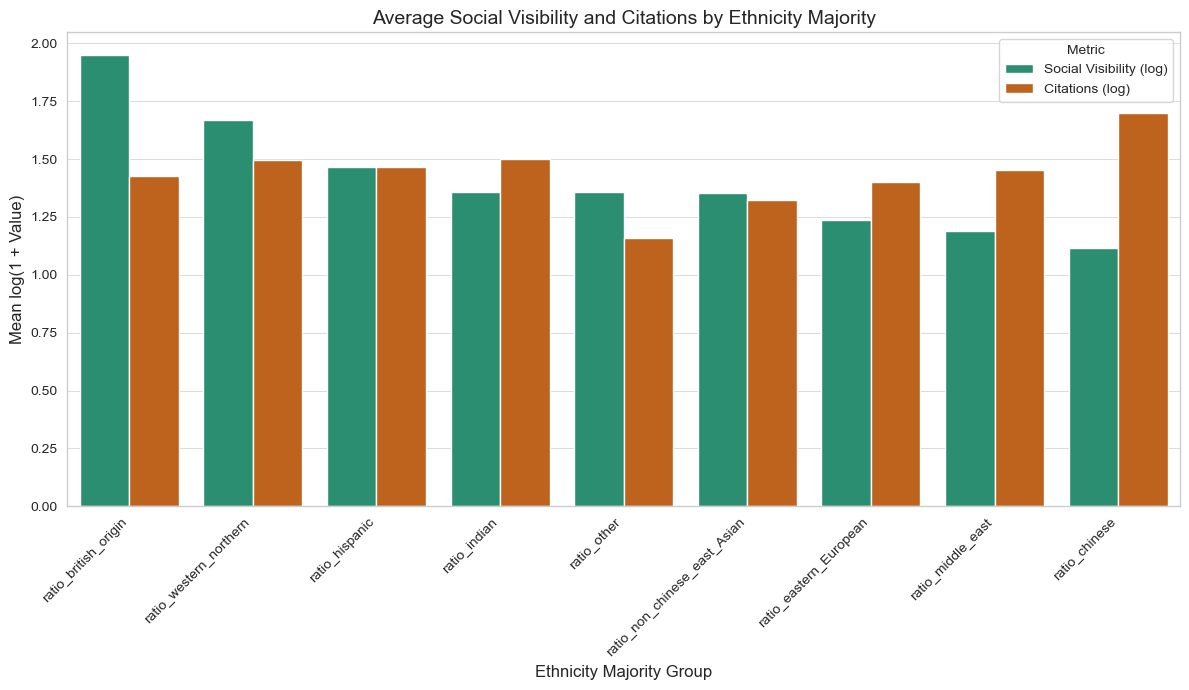

In [818]:
# === Combined Barplot for Social Visibility and Citations by Ethnicity ===

# Prepare data
combined_df = descriptive_tables['ethnicity_majority'][['Mean_Social_Visibility', 'Mean_Citation']].reset_index()

# Melt into long format
combined_long = combined_df.melt(id_vars='ethnicity_majority',
                                 value_vars=['Mean_Social_Visibility', 'Mean_Citation'],
                                 var_name='Metric',
                                 value_name='Mean_Value')

# Rename metrics
combined_long['Metric'] = combined_long['Metric'].map({
    'Mean_Social_Visibility': 'Social Visibility (log)',
    'Mean_Citation': 'Citations (log)'
})

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=combined_long,
    x='ethnicity_majority',
    y='Mean_Value',
    hue='Metric',
    palette='Dark2'
)

plt.title('Average Social Visibility and Citations by Ethnicity Majority')
plt.xlabel('Ethnicity Majority Group')
plt.ylabel('Mean log(1 + Value)')
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metric")
plt.tight_layout()
save_current_figure()
plt.show()

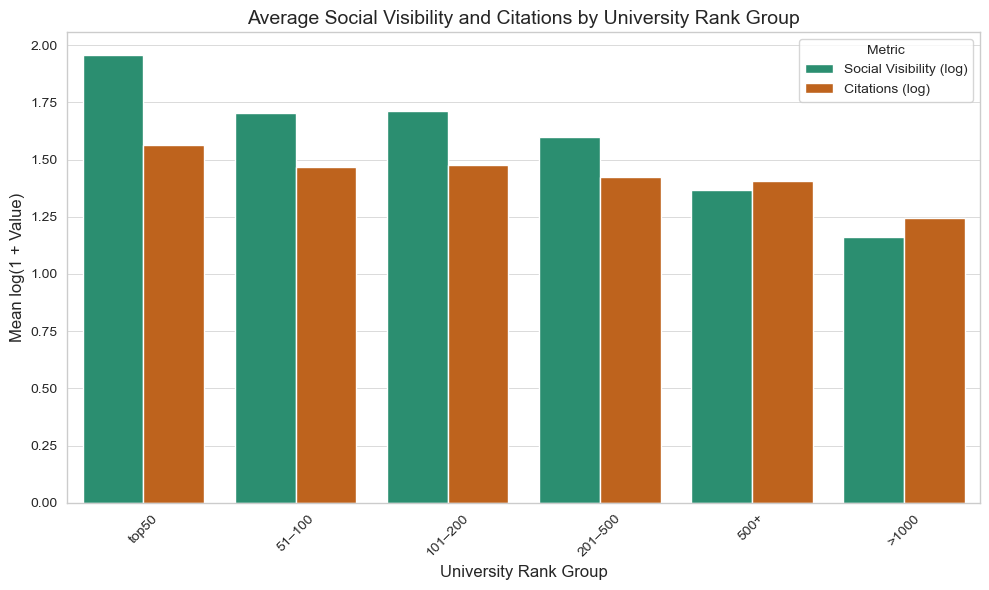

In [820]:
# === Combined Barplot for Social Visibility and Citations by Rank Group ===

# Prepare data
combined_df = descriptive_tables['rank_group'][['Mean_Social_Visibility', 'Mean_Citation']].reset_index()

# Melt into long format
combined_long = combined_df.melt(id_vars='rank_group',
                                 value_vars=['Mean_Social_Visibility', 'Mean_Citation'],
                                 var_name='Metric',
                                 value_name='Mean_Value')

# Rename metrics for nicer labels
combined_long['Metric'] = combined_long['Metric'].map({
    'Mean_Social_Visibility': 'Social Visibility (log)',
    'Mean_Citation': 'Citations (log)'
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=combined_long,
    x='rank_group',
    y='Mean_Value',
    hue='Metric',
    palette='Dark2'
)

plt.title('Average Social Visibility and Citations by University Rank Group')
plt.xlabel('University Rank Group')
plt.ylabel('Mean log(1 + Value)')
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
save_current_figure()
plt.show()

## 6.2. Regressions: social visibility and citation separately

In [823]:
# === Regression Summary for Group Effects on Visibility and Citations ===

# Initialize list to collect all results
regression_results = []

# Define grouping variables to test
grouping_vars = ['gender_majority', 'ethnicity_majority', 'rank_group']

# Loop over grouping variables
for group_var in grouping_vars:
    # Filter out 'unknown' gender if needed
    if group_var == 'gender_majority':
        data = df_ranked_only[df_ranked_only['gender_majority'] != 'gender_undetermined_majority']
    else:
        data = df_ranked_only

    # --- Regression 1: Social Visibility ---
    model_visibility = smf.ols(f'stot_log1p ~ C({group_var})', data=data).fit()

    # --- Regression 2: Citation Counts ---
    model_citation = smf.ols(f'cit_log ~ C({group_var})', data=data).fit()

    # Store results
    result = {
        'Grouping Variable': group_var,
        'Visibility R-squared': round(model_visibility.rsquared, 4),
        'Citation R-squared': round(model_citation.rsquared, 4)
    }
    regression_results.append(result)

# Create DataFrame for side-by-side comparison
regression_comparison = pd.DataFrame(regression_results)

# Display the summary table
print("=== Comparison of Group Effects on Social Visibility and Citations ===")
display(regression_comparison)

=== Comparison of Group Effects on Social Visibility and Citations ===


,Grouping Variable,Visibility R-squared,Citation R-squared
0,gender_majority,0.0007,0.0058
1,ethnicity_majority,0.0557,0.0076
2,rank_group,0.0259,0.0053


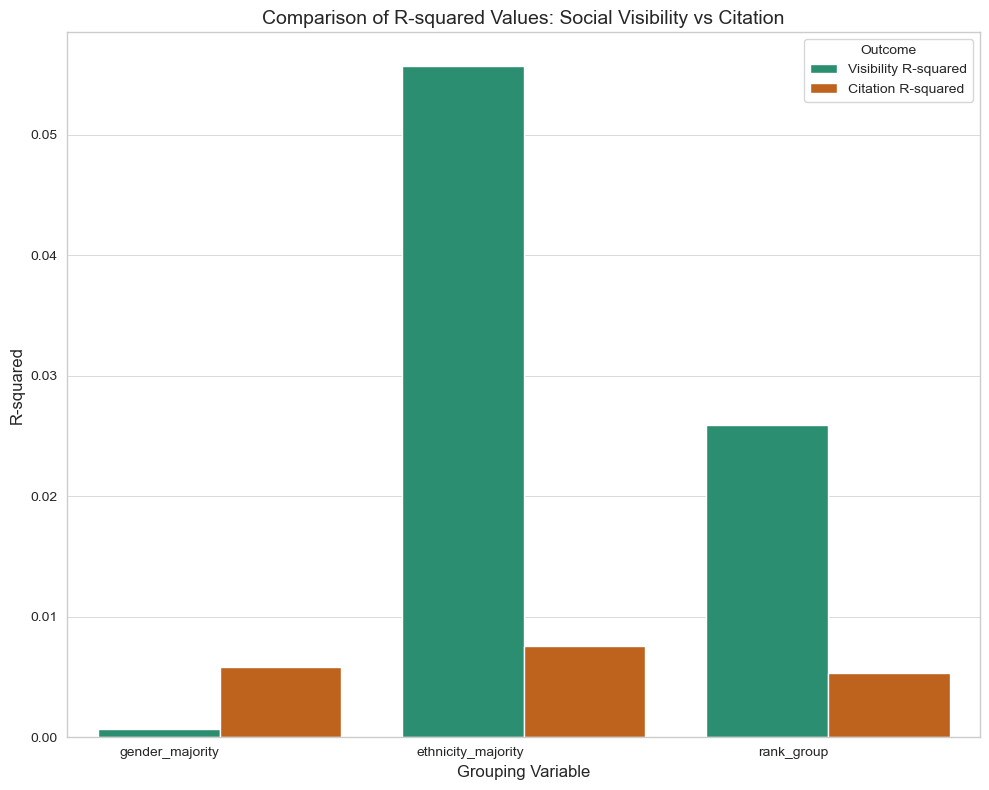

In [826]:
# === Plot: Comparison of R-squared for Social Visibility and Citation ===

# Create a long format DataFrame
r_squared_long = regression_comparison.melt(
    id_vars='Grouping Variable',
    value_vars=['Visibility R-squared', 'Citation R-squared'],
    var_name='Outcome',
    value_name='R_squared'
)

# Plot
plot_barplot(
    data=r_squared_long,
    x_col='Grouping Variable',
    y_col='R_squared',
    hue_col='Outcome',
    title='Comparison of R-squared Values: Social Visibility vs Citation',
    xlabel='Grouping Variable',
    ylabel='R-squared',
    palette='Dark2',
    format_yaxis=False,
    rot=0  # keep x-labels horizontal
)

## 6.3. Calculating differences: visibility vs citation

In [828]:
import statsmodels.formula.api as smf

# Gender: Visibility (stot_log1p)
model_gender_visibility = smf.ols('stot_log1p ~ C(gender_majority)', data=df_gender_filtered).fit()
gender_regression_summary_visibility = pd.DataFrame({
    'Variable': model_gender_visibility.params.index,
    'Coef_Visibility': model_gender_visibility.params.values,
    'Pval_Visibility': model_gender_visibility.pvalues.values
}).round(4)

# Gender: Citation (cit_log)
model_gender_citation = smf.ols('cit_log ~ C(gender_majority)', data=df_gender_filtered).fit()
gender_regression_summary_citation = pd.DataFrame({
    'Variable': model_gender_citation.params.index,
    'Coef_Citation': model_gender_citation.params.values,
    'Pval_Citation': model_gender_citation.pvalues.values
}).round(4)

# Ethnicity: Visibility
model_ethnicity_visibility = smf.ols('stot_log1p ~ C(ethnicity_majority)', data=df_ranked_only).fit()
ethnicity_regression_summary_visibility = pd.DataFrame({
    'Variable': model_ethnicity_visibility.params.index,
    'Coef_Visibility': model_ethnicity_visibility.params.values,
    'Pval_Visibility': model_ethnicity_visibility.pvalues.values
}).round(4)

# Ethnicity: Citation
model_ethnicity_citation = smf.ols('cit_log ~ C(ethnicity_majority)', data=df_ranked_only).fit()
ethnicity_regression_summary_citation = pd.DataFrame({
    'Variable': model_ethnicity_citation.params.index,
    'Coef_Citation': model_ethnicity_citation.params.values,
    'Pval_Citation': model_ethnicity_citation.pvalues.values
}).round(4)

# Rank: Visibility
model_rank_visibility = smf.ols('stot_log1p ~ C(rank_group)', data=df_ranked_only).fit()
rank_regression_summary_visibility = pd.DataFrame({
    'Variable': model_rank_visibility.params.index,
    'Coef_Visibility': model_rank_visibility.params.values,
    'Pval_Visibility': model_rank_visibility.pvalues.values
}).round(4)

# Rank: Citation
model_rank_citation = smf.ols('cit_log ~ C(rank_group)', data=df_ranked_only).fit()
rank_regression_summary_citation = pd.DataFrame({
    'Variable': model_rank_citation.params.index,
    'Coef_Citation': model_rank_citation.params.values,
    'Pval_Citation': model_rank_citation.pvalues.values
}).round(4)

In [829]:
# Merging visibility and citation regression summaries
merged_gender = pd.merge(
    gender_regression_summary_visibility,
    gender_regression_summary_citation,
    on='Variable',
    suffixes=('_Visibility', '_Citation')
)

merged_ethnicity = pd.merge(
    ethnicity_regression_summary_visibility,
    ethnicity_regression_summary_citation,
    on='Variable',
    suffixes=('_Visibility', '_Citation')
)

merged_rank = pd.merge(
    rank_regression_summary_visibility,
    rank_regression_summary_citation,
    on='Variable',
    suffixes=('_Visibility', '_Citation')
)

# Compute Delta: how much citation differs *after* visibility
merged_gender['Delta (Citation - Visibility)'] = (
    merged_gender['Coef_Citation'] - merged_gender['Coef_Visibility']
)
merged_ethnicity['Delta (Citation - Visibility)'] = (
    merged_ethnicity['Coef_Citation'] - merged_ethnicity['Coef_Visibility']
)
merged_rank['Delta (Citation - Visibility)'] = (
    merged_rank['Coef_Citation'] - merged_rank['Coef_Visibility']
)

# Display the results
print("=== Gender Differences (Citation minus Visibility) ===")
display(merged_gender[['Variable', 'Coef_Visibility', 'Coef_Citation', 'Delta (Citation - Visibility)']])

print("\n=== Ethnicity Differences (Citation minus Visibility) ===")
display(merged_ethnicity[['Variable', 'Coef_Visibility', 'Coef_Citation', 'Delta (Citation - Visibility)']])

print("\n=== Rank Group Differences (Citation minus Visibility) ===")
display(merged_rank[['Variable', 'Coef_Visibility', 'Coef_Citation', 'Delta (Citation - Visibility)']])


=== Gender Differences (Citation minus Visibility) ===


,Variable,Coef_Visibility,Coef_Citation,Delta (Citation - Visibility)
0,Intercept,1.6835,1.3579,-0.3256
1,C(gender_majority)[T.gender_male_majority],-0.0201,0.1287,0.1488



=== Ethnicity Differences (Citation minus Visibility) ===


,Variable,Coef_Visibility,Coef_Citation,Delta (Citation - Visibility)
0,Intercept,1.9497,1.4259,-0.5238
1,C(ethnicity_majority)[T.ratio_chinese],-0.8315,0.2746,1.1061
2,C(ethnicity_majority)[T.ratio_eastern_European],-0.7148,-0.0239,0.6909
3,C(ethnicity_majority)[T.ratio_hispanic],-0.4828,0.0376,0.5204
4,C(ethnicity_majority)[T.ratio_indian],-0.5900,0.0736,0.6636
5,C(ethnicity_majority)[T.ratio_middle_east],-0.7607,0.0282,0.7889
6,C(ethnicity_majority)[T.ratio_non_chinese_east...,-0.5946,-0.1031,0.4915
7,C(ethnicity_majority)[T.ratio_other],-0.5929,-0.2667,0.3262
8,C(ethnicity_majority)[T.ratio_western_northern],-0.2820,0.0711,0.3531



=== Rank Group Differences (Citation minus Visibility) ===


,Variable,Coef_Visibility,Coef_Citation,Delta (Citation - Visibility)
0,Intercept,1.9578,1.5640,-0.3938
1,C(rank_group)[T.51–100],-0.2555,-0.0966,0.1589
2,C(rank_group)[T.101–200],-0.2455,-0.0877,0.1578
3,C(rank_group)[T.201–500],-0.3598,-0.1387,0.2211
4,C(rank_group)[T.500+],-0.5906,-0.1582,0.4324
5,C(rank_group)[T.>1000],-0.7982,-0.3181,0.4801


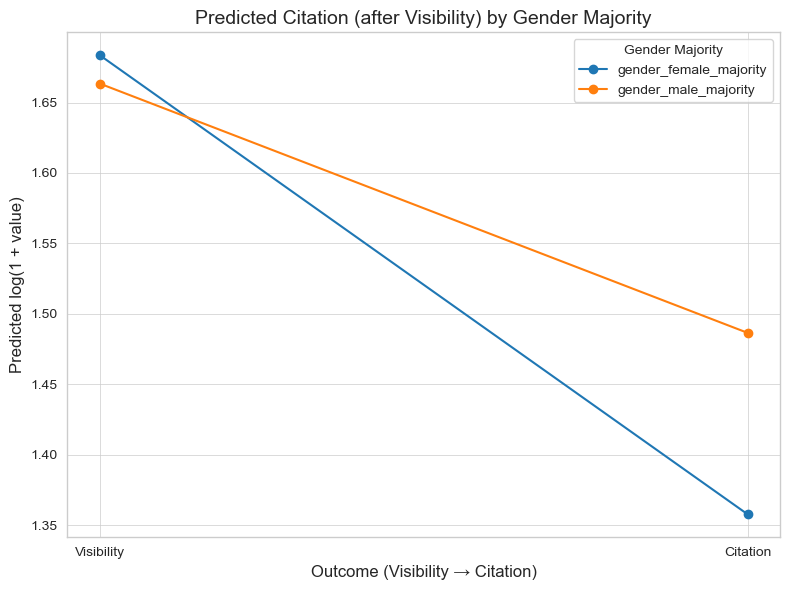

In [832]:
# Extract intercepts for both visibility and citation
intercept_vis = merged_gender.loc[merged_gender['Variable'] == 'Intercept', 'Coef_Visibility'].values[0]
intercept_cit = merged_gender.loc[merged_gender['Variable'] == 'Intercept', 'Coef_Citation'].values[0]

# Manually compute predicted values for each gender group
gender_predicted = pd.DataFrame({
    'Gender': ['gender_female_majority', 'gender_male_majority'],
    'Visibility': [
        intercept_vis,
        intercept_vis + merged_gender.loc[
            merged_gender['Variable'] == 'C(gender_majority)[T.gender_male_majority]',
            'Coef_Visibility'
        ].values[0]
    ],
    'Citation': [
        intercept_cit,
        intercept_cit + merged_gender.loc[
            merged_gender['Variable'] == 'C(gender_majority)[T.gender_male_majority]',
            'Coef_Citation'
        ].values[0]
    ]
})

# Reorder columns for correct causal order: Visibility first, then Citation
gender_predicted = gender_predicted[['Gender', 'Visibility', 'Citation']]

# Melt dataframe for plotting
gender_predicted_melted = gender_predicted.melt(
    id_vars='Gender',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for gender in gender_predicted['Gender']:
    subset = gender_predicted_melted[gender_predicted_melted['Gender'] == gender]
    plt.plot(
        subset['Outcome'],
        subset['Predicted_Value'],
        marker='o',
        label=gender
    )

plt.title('Predicted Citation (after Visibility) by Gender Majority')
plt.ylabel('Predicted log(1 + value)')
plt.xlabel('Outcome (Visibility → Citation)')
plt.grid(True)
plt.legend(title='Gender Majority')
plt.tight_layout()

save_current_figure()

plt.show()

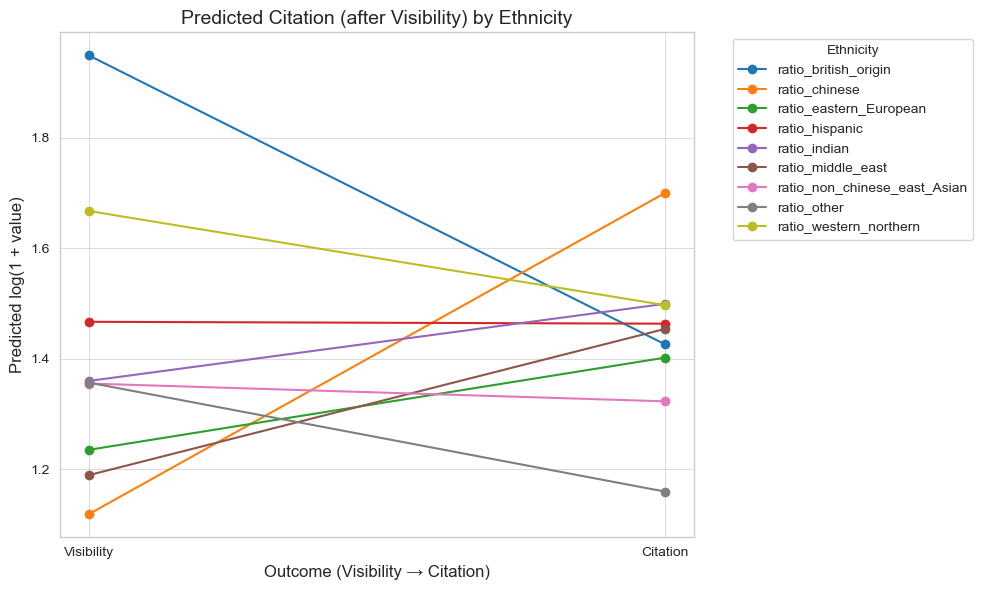

In [834]:
# Get regression intercepts for ethnicity
intercept_vis_eth = merged_ethnicity.loc[
    merged_ethnicity['Variable'] == 'Intercept', 'Coef_Visibility'
].values[0]

intercept_cit_eth = merged_ethnicity.loc[
    merged_ethnicity['Variable'] == 'Intercept', 'Coef_Citation'
].values[0]

# Extract dummy-coded ethnicity levels
dummy_rows = merged_ethnicity[merged_ethnicity['Variable'] != 'Intercept']
eth_levels = dummy_rows['Variable'].str.extract(r'\[T\.(.*)\]')[0].tolist()

# Find the baseline ethnicity level (not present in dummy terms)
all_levels = df_ranked_only['ethnicity_majority'].unique().tolist()
baseline_eth = [lvl for lvl in all_levels if lvl not in eth_levels][0]

# Compute predicted values for visibility and citation
eth_pred = pd.DataFrame({
    'Ethnicity': [baseline_eth] + eth_levels,
    'Visibility': [intercept_vis_eth] + [
        intercept_vis_eth + merged_ethnicity.loc[
            merged_ethnicity['Variable'] == f"C(ethnicity_majority)[T.{lvl}]",
            'Coef_Visibility'
        ].values[0] for lvl in eth_levels
    ],
    'Citation': [intercept_cit_eth] + [
        intercept_cit_eth + merged_ethnicity.loc[
            merged_ethnicity['Variable'] == f"C(ethnicity_majority)[T.{lvl}]",
            'Coef_Citation'
        ].values[0] for lvl in eth_levels
    ]
})

# Reorder columns for causal order: Visibility → Citation
eth_pred = eth_pred[['Ethnicity', 'Visibility', 'Citation']]

# Melt for plotting
eth_pred_melt = eth_pred.melt(
    id_vars='Ethnicity',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot predicted values
plt.figure(figsize=(10, 6))
for eth in eth_pred['Ethnicity']:
    sub = eth_pred_melt[eth_pred_melt['Ethnicity'] == eth]
    plt.plot(sub['Outcome'], sub['Predicted_Value'], marker='o', label=eth)

plt.title('Predicted Citation (after Visibility) by Ethnicity')
plt.xlabel('Outcome (Visibility → Citation)')
plt.ylabel('Predicted log(1 + value)')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

save_current_figure()

plt.show()

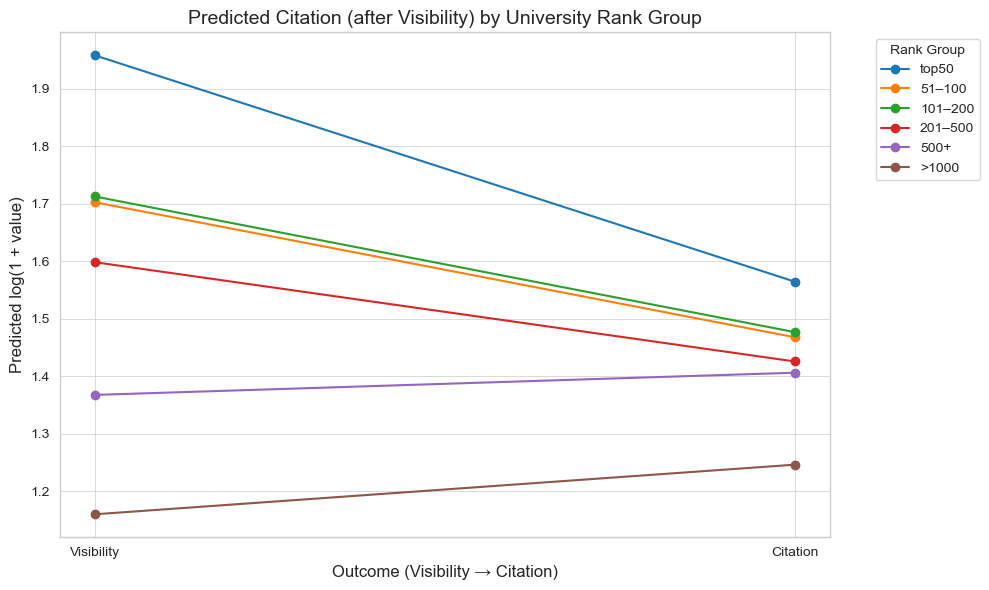

In [836]:
# Extract regression intercepts for university rank group
intercept_vis_rank = merged_rank.loc[
    merged_rank['Variable'] == 'Intercept', 'Coef_Visibility'
].values[0]

intercept_cit_rank = merged_rank.loc[
    merged_rank['Variable'] == 'Intercept', 'Coef_Citation'
].values[0]

# Extract dummy-coded rank levels (excluding baseline)
dummy_rows_r = merged_rank[merged_rank['Variable'] != 'Intercept']
rank_levels = dummy_rows_r['Variable'].str.extract(r'\[T\.(.*)\]')[0].tolist()

# Find the baseline rank group (not present among dummies)
all_ranks = df_ranked_only['rank_group'].cat.categories.tolist()
baseline_rank = [r for r in all_ranks if r not in rank_levels][0]

# Compute predicted values for each rank group
rank_pred = pd.DataFrame({
    'Rank Group': [baseline_rank] + rank_levels,
    'Visibility': [intercept_vis_rank] + [
        intercept_vis_rank + merged_rank.loc[
            merged_rank['Variable'] == f"C(rank_group)[T.{r}]",
            'Coef_Visibility'
        ].values[0] for r in rank_levels
    ],
    'Citation': [intercept_cit_rank] + [
        intercept_cit_rank + merged_rank.loc[
            merged_rank['Variable'] == f"C(rank_group)[T.{r}]",
            'Coef_Citation'
        ].values[0] for r in rank_levels
    ]
})

# Ensure correct column order for causal direction
rank_pred = rank_pred[['Rank Group', 'Visibility', 'Citation']]

# Melt for plotting
rank_pred_melt = rank_pred.melt(
    id_vars='Rank Group',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot predicted values
plt.figure(figsize=(10, 6))
for rg in rank_pred['Rank Group']:
    sub = rank_pred_melt[rank_pred_melt['Rank Group'] == rg]
    plt.plot(sub['Outcome'], sub['Predicted_Value'], marker='o', label=rg)

plt.title('Predicted Citation (after Visibility) by University Rank Group')
plt.xlabel('Outcome (Visibility → Citation)')
plt.ylabel('Predicted log(1 + value)')
plt.legend(title='Rank Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

save_current_figure()

plt.show()

## 6.4. Interaction models

In [839]:
# 4.1 Social visibility interaction: gender × rank_group
model_vis_inter = smf.ols(
    'stot_log1p ~ C(gender_majority) * C(rank_group)',
    data=df_ranked_gender_filtered  # filtered to drop "unknown"
).fit()

print("=== Interaction Model: Social Visibility ~ Gender Majority × Rank Group ===")
print(model_vis_inter.summary())


# 4.2 Citation interaction: gender × rank_group
model_cit_inter = smf.ols(
    'cit_log ~ C(gender_majority) * C(rank_group)',
    data=df_ranked_gender_filtered
).fit()

print("\n=== Interaction Model: Citations ~ Gender Majority × Rank Group ===")
print(model_cit_inter.summary())

=== Interaction Model: Social Visibility ~ Gender Majority × Rank Group ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1949.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        20:29:19   Log-Likelihood:            -1.2799e+06
No. Observations:              794095   AIC:                         2.560e+06
Df Residuals:                  794083   BIC:                         2.560e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975

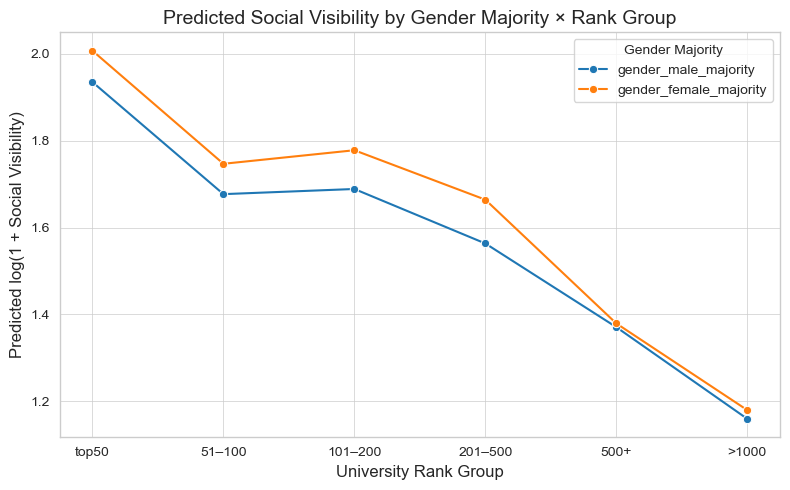

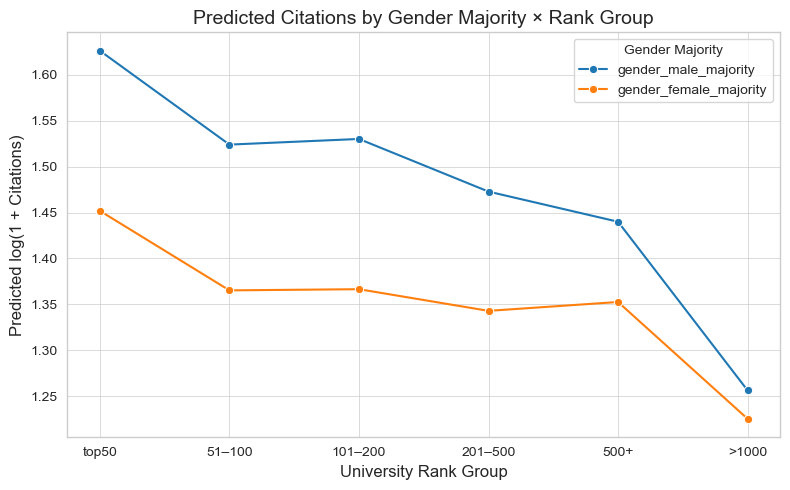

In [840]:
# Ensure rank_group is treated in the right order
rank_order = ['top50', '51–100', '101–200', '201–500', '500+', '>1000']
df_ranked_gender_filtered['rank_group'] = pd.Categorical(
    df_ranked_gender_filtered['rank_group'],
    categories=rank_order,
    ordered=True
)

# 1) Build a grid of all combinations
genders = df_ranked_gender_filtered['gender_majority'].unique().tolist()
grid = pd.DataFrame(
    [(g, r) for g in genders for r in rank_order],
    columns=['gender_majority', 'rank_group']
)

# 2) Predict from your fitted interaction models
grid['pred_vis'] = model_vis_inter.predict(grid)
grid['pred_cit'] = model_cit_inter.predict(grid)

# 3) Plot predicted social visibility by rank for each gender
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=grid,
    x='rank_group',
    y='pred_vis',
    hue='gender_majority',
    marker='o'
)
plt.title("Predicted Social Visibility by Gender Majority × Rank Group")
plt.xlabel("University Rank Group")
plt.ylabel("Predicted log(1 + Social Visibility)")
plt.legend(title="Gender Majority")
plt.tight_layout()
save_current_figure()
plt.show()

# 4) Plot predicted citation counts by rank for each gender
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=grid,
    x='rank_group',
    y='pred_cit',
    hue='gender_majority',
    marker='o'
)
plt.title("Predicted Citations by Gender Majority × Rank Group")
plt.xlabel("University Rank Group")
plt.ylabel("Predicted log(1 + Citations)")
plt.legend(title="Gender Majority")
plt.tight_layout()
save_current_figure()
plt.show()

In [841]:
# Run interaction model for Social Visibility
model_vis_inter_ethnicity = smf.ols(
    'stot_log1p ~ C(ethnicity_majority) * C(rank_group)',
    data=df_ranked_only
).fit()

# Run interaction model for Citation
model_cit_inter_ethnicity = smf.ols(
    'cit_log ~ C(ethnicity_majority) * C(rank_group)',
    data=df_ranked_only
).fit()

# Print summaries if you want to see
print("=== Interaction model: Visibility ===")
print(model_vis_inter_ethnicity.summary())

print("\n=== Interaction model: Citation ===")
print(model_cit_inter_ethnicity.summary())

=== Interaction model: Visibility ===
                            OLS Regression Results                            
Dep. Variable:             stot_log1p   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1230.
Date:                Wed, 14 May 2025   Prob (F-statistic):               0.00
Time:                        20:30:01   Log-Likelihood:            -1.4544e+06
No. Observations:              915065   AIC:                         2.909e+06
Df Residuals:                  915011   BIC:                         2.910e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

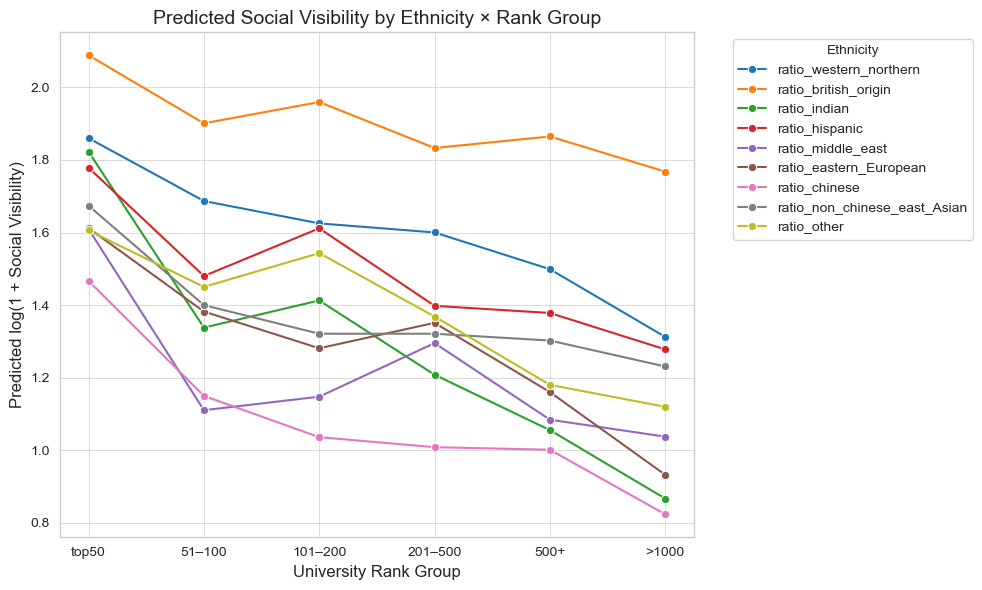

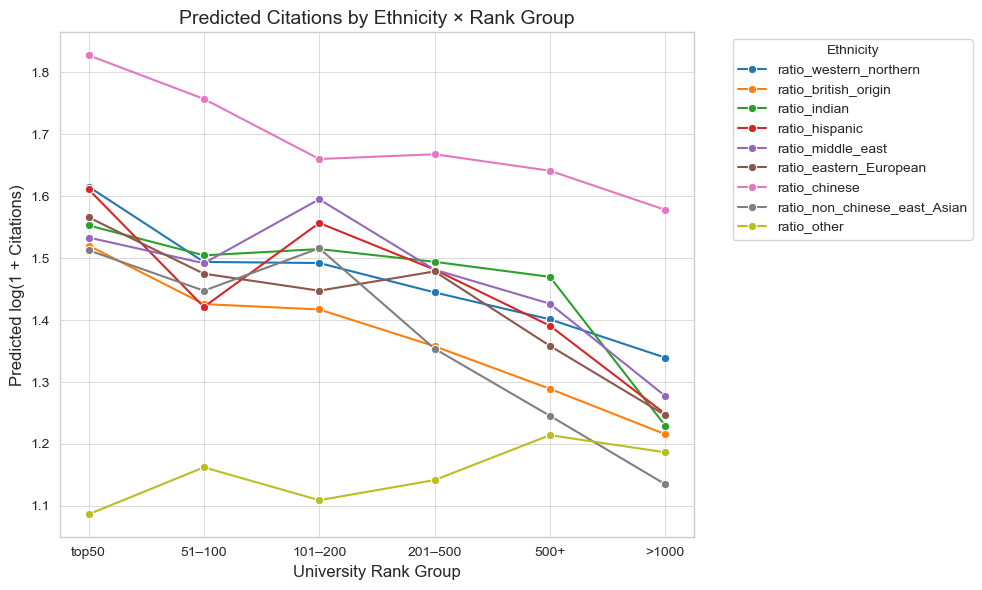

In [847]:
# Ensure rank_group has the proper order
rank_order = ['top50', '51–100', '101–200', '201–500', '500+', '>1000']
df_ranked_only['rank_group'] = pd.Categorical(
    df_ranked_only['rank_group'],
    categories=rank_order,
    ordered=True
)

# List of unique ethnicities
ethnicities = df_ranked_only['ethnicity_majority'].unique().tolist()

# Build a full combination grid
grid_ethnicity = pd.DataFrame(
    [(e, r) for e in ethnicities for r in rank_order],
    columns=['ethnicity_majority', 'rank_group']
)

# Predict using the interaction models
grid_ethnicity['pred_vis'] = model_vis_inter_ethnicity.predict(grid_ethnicity)
grid_ethnicity['pred_cit'] = model_cit_inter_ethnicity.predict(grid_ethnicity)

# Plot Predicted Social Visibility
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grid_ethnicity,
    x='rank_group',
    y='pred_vis',
    hue='ethnicity_majority',
    marker='o'
)
plt.title("Predicted Social Visibility by Ethnicity × Rank Group")
plt.xlabel("University Rank Group")
plt.ylabel("Predicted log(1 + Social Visibility)")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
save_current_figure()
plt.show()

# Plot Predicted Citations
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grid_ethnicity,
    x='rank_group',
    y='pred_cit',
    hue='ethnicity_majority',
    marker='o'
)
plt.title("Predicted Citations by Ethnicity × Rank Group")
plt.xlabel("University Rank Group")
plt.ylabel("Predicted log(1 + Citations)")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
save_current_figure()
plt.show()

## 6.5. Summary Visualization of Coefficients and Differences

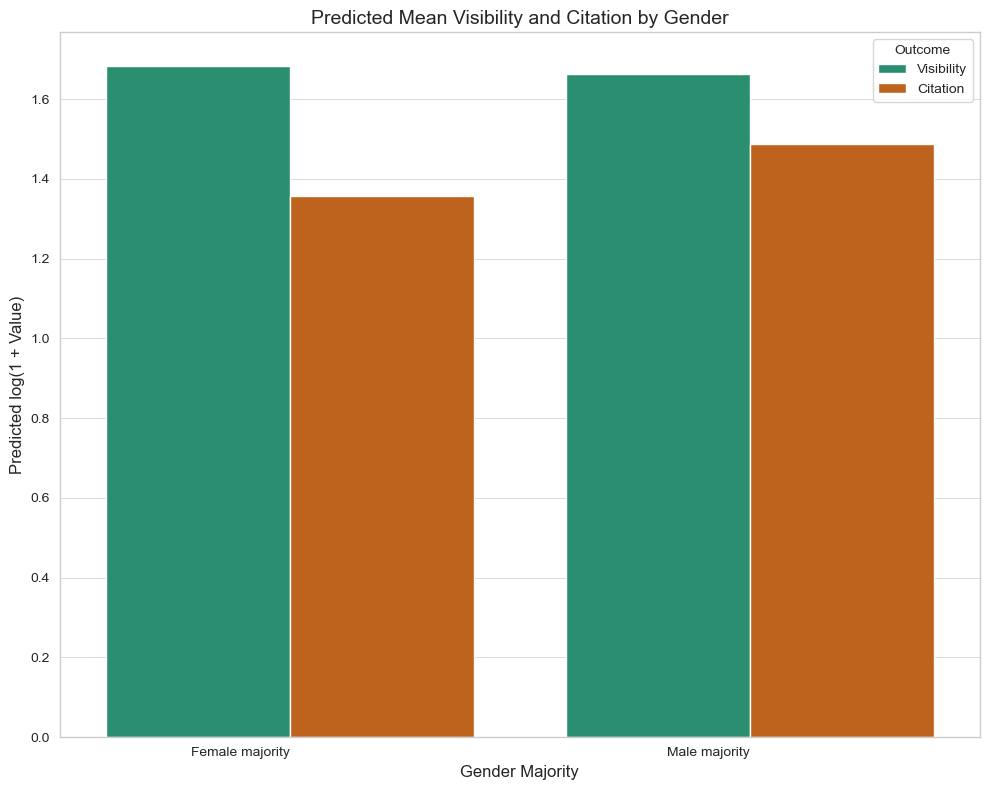

In [851]:
# Get intercepts
intercept_vis_gender = merged_gender.loc[merged_gender['Variable'] == 'Intercept', 'Coef_Visibility'].values[0]
intercept_cit_gender = merged_gender.loc[merged_gender['Variable'] == 'Intercept', 'Coef_Citation'].values[0]

# Predicted values per gender
predicted_gender = pd.DataFrame({
    'Gender': ['Female majority', 'Male majority'],
    'Visibility': [
        intercept_vis_gender,
        intercept_vis_gender + merged_gender.loc[merged_gender['Variable'] == 'C(gender_majority)[T.gender_male_majority]', 'Coef_Visibility'].values[0]
    ],
    'Citation': [
        intercept_cit_gender,
        intercept_cit_gender + merged_gender.loc[merged_gender['Variable'] == 'C(gender_majority)[T.gender_male_majority]', 'Coef_Citation'].values[0]
    ]
})

# Melt to long format for plotting
predicted_gender_melted = predicted_gender.melt(
    id_vars='Gender',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot
plot_barplot(
    data=predicted_gender_melted,
    x_col='Gender',
    y_col='Predicted_Value',
    hue_col='Outcome',
    title='Predicted Mean Visibility and Citation by Gender',
    xlabel='Gender Majority',
    ylabel='Predicted log(1 + Value)',
    format_yaxis=False,
    rot=0
)

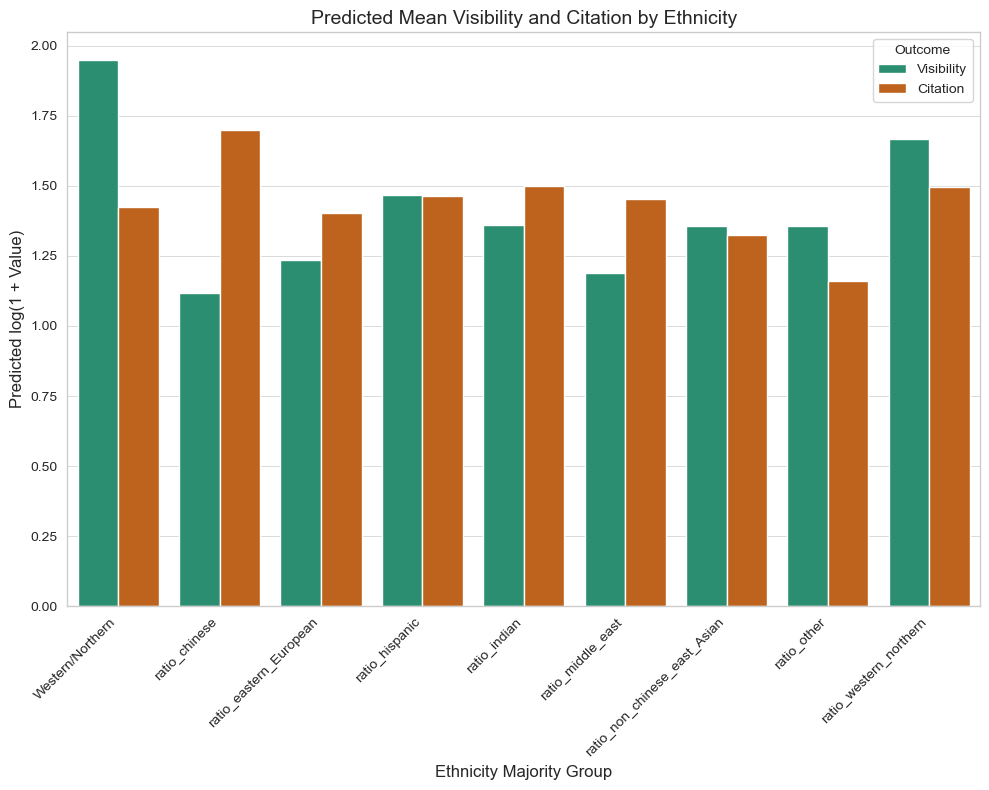

In [853]:
# Get intercepts
intercept_vis_eth = merged_ethnicity.loc[merged_ethnicity['Variable'] == 'Intercept', 'Coef_Visibility'].values[0]
intercept_cit_eth = merged_ethnicity.loc[merged_ethnicity['Variable'] == 'Intercept', 'Coef_Citation'].values[0]

# Extract all ethnicity rows (excluding Intercept)
eth_rows = merged_ethnicity[merged_ethnicity['Variable'] != 'Intercept'].copy()

# Clean variable names (e.g. C(...) → actual label)
eth_rows['Ethnicity'] = eth_rows['Variable'].str.extract(r'\[T\.(.*)\]')

# Build predicted value table
predicted_ethnicity = pd.DataFrame({
    'Ethnicity': ['Western/Northern'] + eth_rows['Ethnicity'].tolist(),
    'Visibility': [intercept_vis_eth] + (intercept_vis_eth + eth_rows['Coef_Visibility']).tolist(),
    'Citation': [intercept_cit_eth] + (intercept_cit_eth + eth_rows['Coef_Citation']).tolist()
})

# Melt to long format
predicted_ethnicity_melted = predicted_ethnicity.melt(
    id_vars='Ethnicity',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot
plot_barplot(
    data=predicted_ethnicity_melted,
    x_col='Ethnicity',
    y_col='Predicted_Value',
    hue_col='Outcome',
    title='Predicted Mean Visibility and Citation by Ethnicity',
    xlabel='Ethnicity Majority Group',
    ylabel='Predicted log(1 + Value)',
    format_yaxis=False,
    rot=45
)


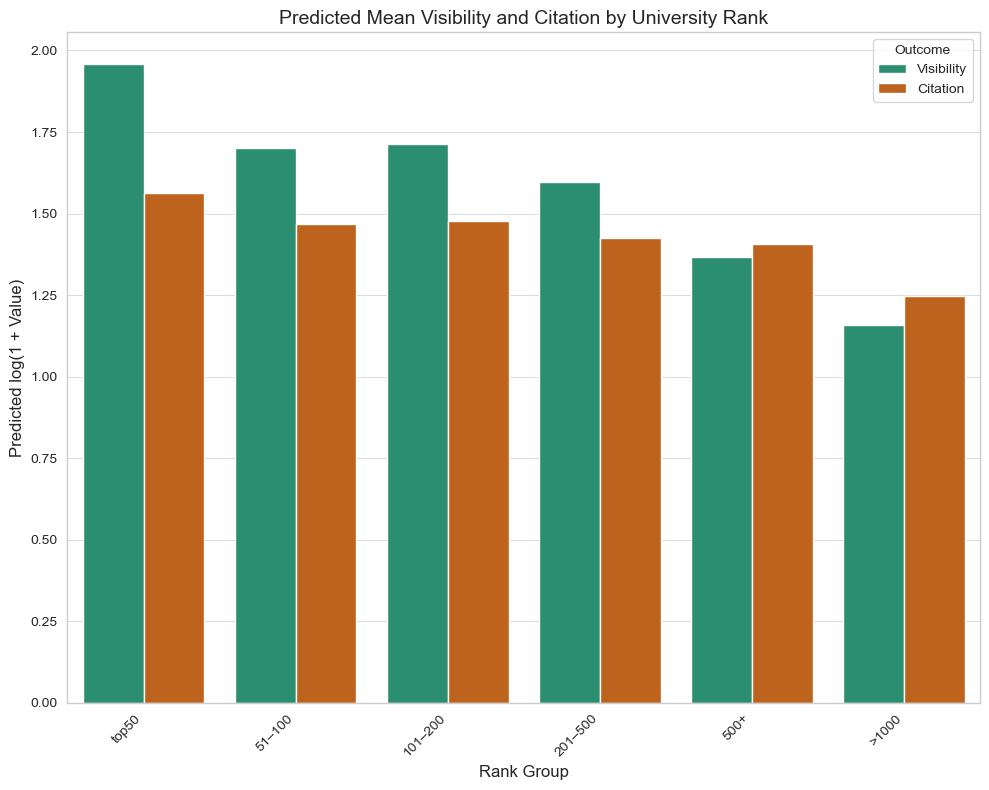

In [855]:
# Get intercepts
intercept_vis_rank = merged_rank.loc[merged_rank['Variable'] == 'Intercept', 'Coef_Visibility'].values[0]
intercept_cit_rank = merged_rank.loc[merged_rank['Variable'] == 'Intercept', 'Coef_Citation'].values[0]

# Extract rows for rank_group (excluding Intercept)
rank_rows = merged_rank[merged_rank['Variable'] != 'Intercept'].copy()

# Clean variable names (e.g. C(...) → actual label)
rank_rows['Rank_Group'] = rank_rows['Variable'].str.extract(r'\[T\.(.*)\]')

# Build predicted value table
predicted_rank = pd.DataFrame({
    'Rank_Group': ['top50'] + rank_rows['Rank_Group'].tolist(),
    'Visibility': [intercept_vis_rank] + (intercept_vis_rank + rank_rows['Coef_Visibility']).tolist(),
    'Citation': [intercept_cit_rank] + (intercept_cit_rank + rank_rows['Coef_Citation']).tolist()
})

# Melt to long format
predicted_rank_melted = predicted_rank.melt(
    id_vars='Rank_Group',
    var_name='Outcome',
    value_name='Predicted_Value'
)

# Plot
plot_barplot(
    data=predicted_rank_melted,
    x_col='Rank_Group',
    y_col='Predicted_Value',
    hue_col='Outcome',
    title='Predicted Mean Visibility and Citation by University Rank',
    xlabel='Rank Group',
    ylabel='Predicted log(1 + Value)',
    format_yaxis=False,
    rot=45
)

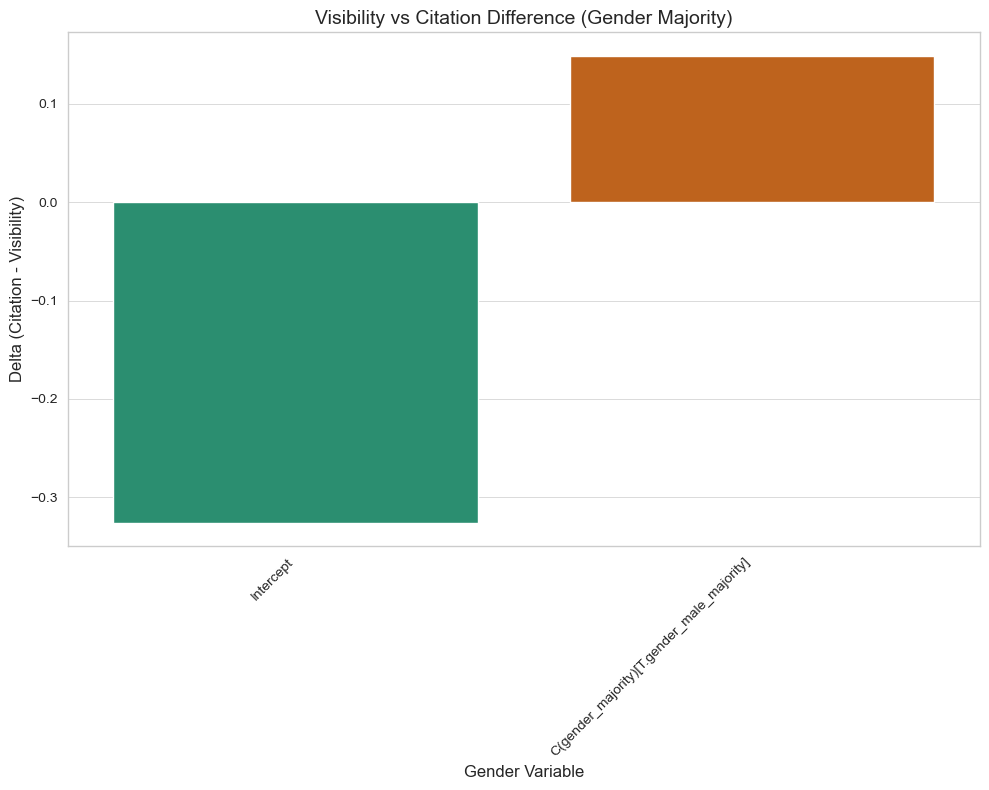

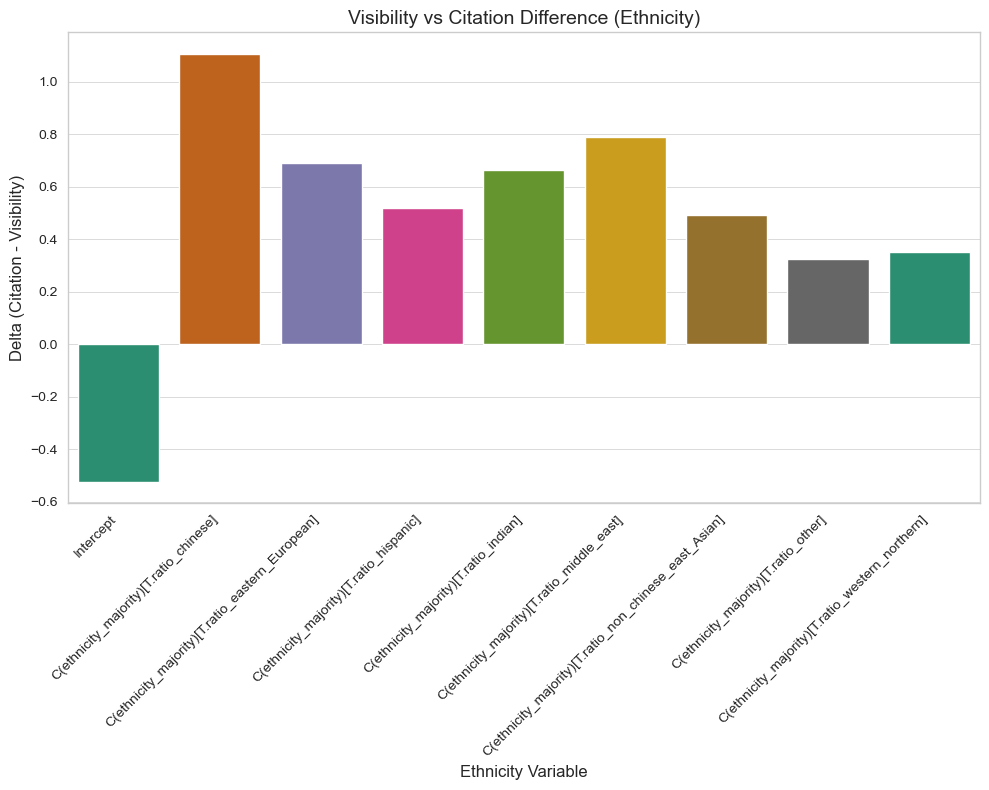

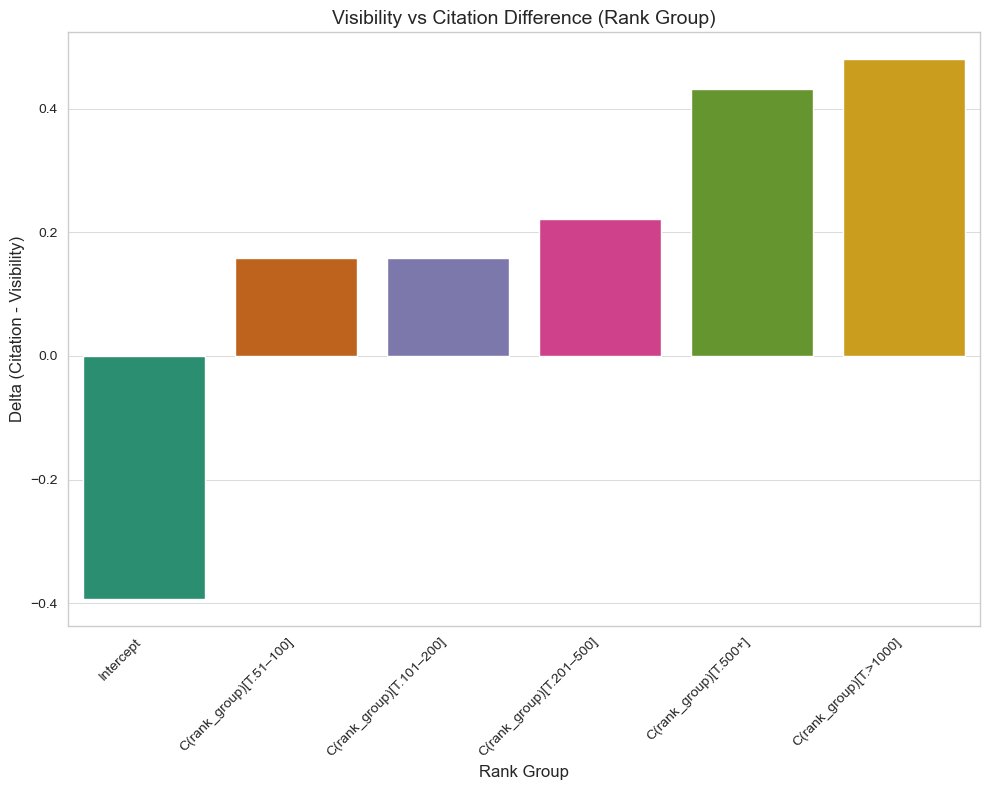

In [859]:
# Delta (difference) plots ---

# Gender Delta
plot_barplot(
    data=merged_gender,
    x_col='Variable',
    y_col='Delta (Citation - Visibility)',
    title='Visibility vs Citation Difference (Gender Majority)',
    xlabel='Gender Variable',
    ylabel='Delta (Citation - Visibility)',
    format_yaxis=False,
    rot=45
)

# Ethnicity Delta
plot_barplot(
    data=merged_ethnicity,
    x_col='Variable',
    y_col='Delta (Citation - Visibility)',
    title='Visibility vs Citation Difference (Ethnicity)',
    xlabel='Ethnicity Variable',
    ylabel='Delta (Citation - Visibility)',
    format_yaxis=False,
    rot=45
)

# Rank Group Delta
plot_barplot(
    data=merged_rank,
    x_col='Variable',
    y_col='Delta (Citation - Visibility)',
    title='Visibility vs Citation Difference (Rank Group)',
    xlabel='Rank Group',
    ylabel='Delta (Citation - Visibility)',
    format_yaxis=False,
    rot=45
)